<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Contents: Capstone Project
1. [Milestone-1](#Milestone-1)
2. [Milestone-2](#Milestone-2)

# Problem Statement: Project Specs

- **DOMAIN:** Health Care
- **CONTEXT:** Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation
of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical
images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.
- **Data Description:**
 - In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was
determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the
appearance of true pneumonia. 
 - Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They
contain a combination of header metadata as well as underlying raw image arrays for pixel data.
 - Dataset has been attached along with this project. Please use the same for this capstone project.
 - Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference
only ]. You can refer to the details of the dataset in the above link
 - Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.
- **PROJECT OBJECTIVE:** Design a DL based algorithm for detecting pneumonia.

- **Project Tasks: Milestone-1**
 - Input: Context and Dataset
 - Step 1: Import the data.
 - Step 2: Map training and testing images to its classes.
 - Step 3: Map training and testing images to its annotations.
 - Step 4: Preprocessing and Visualisation of different classes
 - Step 5: Display images with bounding box.
 - Step 6: Design, train and test basic CNN models for classification.
 - Step 7: Interim report
- Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1
- **Project Tasks: Milestone-2**
 - Input: Preprocessed output from Milestone-1
 - Step 1: Fine tune the trained basic CNN models for classification.
 - Step 2: Apply Transfer Learning model for classification.
 - Step 3: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.
 - Step 4: Pickle the model for future prediction.
 - Step 5: Final Report
- Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2

# Milestone-1

In [1]:
# Notebook timestamp
from datetime import datetime
dt_string = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
print(f"Updated {dt_string} (GMT)")

Updated 25/03/2023 01:25:12 (GMT)


In [2]:
# NB start time
import time
a = time.time()

In [3]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.9 MB/s eta 0:00:00
time: 363 µs (started: 2023-03-25 01:25:20 +00:00)


In [4]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score
# from sklearn.metrics import plot_precision_recall_curve, average_precision_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

# from sklearn.decomposition import PCA
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.cluster.hierarchy import fcluster
# from sklearn.cluster import KMeans 
# from sklearn.metrics import silhouette_samples, silhouette_score

# import xgboost as xgb
# from xgboost import plot_importance
# from lightgbm import LGBMClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# import re
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.stem.snowball import SnowballStemmer
# import pandas_profiling as pp

# import gensim
# import logging

# import cv2
# from google.colab.patches import cv2_imshow
# from glob import glob
# import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Conv2DTranspose
from tensorflow.keras.layers import Activation, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate, Reshape
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

from tensorflow import keras
from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings("ignore")

import random
from zipfile import ZipFile

# Import pickle Package
import pickle

# Set random_state
random_state = 42

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

time: 3.82 s (started: 2023-03-25 01:25:20 +00:00)


In [5]:
# Install pydicom package
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.0 MB/s eta 0:00:00
time: 7.15 s (started: 2023-03-25 01:25:24 +00:00)


In [6]:
# Import other relevant packages
from numpy import asarray

import cv2
import glob
import time
import pydicom as dcm
import skimage
import math

from matplotlib.patches import Rectangle
from skimage import feature, filters
from PIL import Image

from functools import partial
from collections import defaultdict
from joblib import Parallel, delayed
from tqdm import tqdm, tqdm_notebook

# Tensorflow / Keras
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from keras import models
from keras import layers

from tensorflow.keras.applications import MobileNet, MobileNetV2, VGG19, EfficientNetV2B3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input 
import tensorflow.keras.utils as pltUtil
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input as resnetProcess_input

sns.set_style('whitegrid')
np.warnings.filterwarnings('ignore')

time: 672 ms (started: 2023-03-25 01:25:31 +00:00)


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 33.7 s (started: 2023-03-25 01:25:31 +00:00)


In [8]:
# Current working directory
%cd "/content/drive/MyDrive/MGL/Project-Capstone/"

# # List all the files in a directory
# for dirname, _, filenames in os.walk('path'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/content/drive/MyDrive/MGL/Project-Capstone
time: 116 ms (started: 2023-03-25 01:26:05 +00:00)


In [9]:
# # Path of the data file
# path = 'rsna-pneumonia-detection-challenge.zip'

# # Unzip files in the current directory

# with ZipFile (path,'r') as z:
#   z.extractall() 
# print("Training zip extraction done!")

time: 385 µs (started: 2023-03-25 01:26:05 +00:00)


In [10]:
# List files in the directory
!ls

 Capstone-Project-Grp5-Amit-Kumar       Test
 cr_model.h5			        Test-1
'GCP Credits Request Link - RSNA.txt'   Test-2-Modeling-Interim
 Mask_RCNN			        Test-3-Modeling-Final
 stage_2_detailed_class_info.csv       'Test-4-Hyperparameter Tuning'
 stage_2_sample_submission.csv	        Test-5-UNet
 stage_2_test_images		        train_labels_merged_metadata.csv
 stage_2_train_images		        unet_model.h5
 stage_2_train_labels.csv
time: 1.53 s (started: 2023-03-25 01:26:05 +00:00)


## EXPLORATORY DATA ANALYSIS

## Load the data

In [ ]:
class_info_df = pd.read_csv('stage_2_detailed_class_info.csv')
train_labels_df = pd.read_csv('stage_2_train_labels.csv') 

time: 850 ms (started: 2023-03-14 06:17:08 +00:00)


In [ ]:
print(f"Detailed class info -  Rows: {class_info_df.shape[0]}, Columns: {class_info_df.shape[1]}")
print(f"Train labels -  Rows: {train_labels_df.shape[0]}, Columns: {train_labels_df.shape[1]}")

Detailed class info -  Rows: 30227, Columns: 2
Train labels -  Rows: 30227, Columns: 6
time: 6.13 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
class_info_df.sample(10)

patientId                         class
13157  84d7f055-3374-4d68-9390-cf3b1418355c  No Lung Opacity / Not Normal
20611  bc4ec257-ecf8-469b-9750-c5bd190f6987                  Lung Opacity
8627   60f16c3a-9a51-4c68-b5c4-2ce898c08370  No Lung Opacity / Not Normal
4731   40ef3f33-d990-4a08-b652-ed4e02e84159                  Lung Opacity
15854  9a05ffb1-0988-4f71-89a3-2eac51deb62e                  Lung Opacity
3083   3601ea72-9ad8-4638-aca9-6f22d945bd01  No Lung Opacity / Not Normal
29053  025d196b-cfa4-44a5-9e31-0f73dc3b318f                  Lung Opacity
20196  b9b46200-1045-4c7a-b790-a9f6cdd031e3                  Lung Opacity
8099   5c9364c7-51da-490b-82bd-e7078e9c21f2                        Normal
14222  8d11ed1c-a608-47d4-ad04-5d8733c24bdd  No Lung Opacity / Not Normal

time: 104 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
train_labels_df.sample(10)

patientId      x      y  width  height  \
25939  e7c89fed-c3fc-4207-9009-d9105713f094    NaN    NaN    NaN     NaN   
15293  95ae7ef0-fb02-4663-a7dd-a74b81514dab    NaN    NaN    NaN     NaN   
550    088265f7-0350-4c51-a7fc-99f1ddc89ae1    NaN    NaN    NaN     NaN   
6804   51daa411-4fb0-42f0-aa15-46c332656c04    NaN    NaN    NaN     NaN   
17294  a595fe39-ce96-43dd-ac73-89d49124b966  537.0  224.0  303.0   692.0   
3820   3ae783bc-9fd3-4e66-b9cd-101a43f122bd  605.0  495.0  183.0   196.0   
16807  a1f6801d-e44b-4d7c-bef0-066328f9bd94    NaN    NaN    NaN     NaN   
29570  1d3e4775-9d2c-4e5f-81de-ce29b540a9f7    NaN    NaN    NaN     NaN   
13627  88a033e5-b48c-4f0c-aa0a-3c0ae353cc0d    NaN    NaN    NaN     NaN   
23448  d316817a-0747-4dfb-be81-fbf857439d42  595.0  402.0  284.0   297.0   

       Target  
25939       0  
15293       0  
550         0  
6804        0  
17294       1  
3820        1  
16807       0  
29570       0  
13627       0  
23448       1

time: 36.1 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
# Understand the missing data points
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return np.transpose(pd.concat([total, percent], axis=1, keys=['Total', 'Percent']))

missing_data(train_labels_df)

x             y         width        height  patientId  \
Total    20672.000000  20672.000000  20672.000000  20672.000000        0.0   
Percent     68.389188     68.389188     68.389188     68.389188        0.0   

         Target  
Total       0.0  
Percent     0.0

time: 110 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
missing_data(class_info_df)

patientId  class
Total          0.0    0.0
Percent        0.0    0.0

time: 66.6 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
# Duplicate patients in the class_info_df dataset
duplicateClassRowsDF = class_info_df[class_info_df.duplicated(['patientId'])]
duplicateClassRowsDF.shape

## There are 3543 duplicates similar to the train_labels_df dataset

(3543, 2)

time: 15.1 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
duplicateClassRowsDF.head(2)

patientId         class
5  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity
9  00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity

time: 12.2 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
## The same patient id has the same class even though they are duplicate
class_info_df[class_info_df.patientId=='00704310-78a8-4b38-8475-49f4573b2dbb']

patientId         class
8  00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity
9  00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity

time: 23.1 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
# Duplicate patients in the train_labels_df dataset
duplicateRowsDF = train_labels_df[train_labels_df.duplicated(['patientId'])]
duplicateRowsDF.shape

## There are 3543 duplicates similar to the class_info_df dataset

(3543, 6)

time: 25.2 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
duplicateRowsDF.head(2)

patientId      x      y  width  height  Target
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
9  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1

time: 18.4 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
## Examining one of the patient id which is duplicate , we can see that the x,y, widht and height is not the same
## This indicates that the same patient has two bounding boxes in the same dicom image
train_labels_df[train_labels_df.patientId=='00436515-870c-4b36-a041-de91049b9ab4']

patientId      x      y  width  height  Target
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1

time: 21.3 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
# Clear the matplotlib plotting backend
%matplotlib inline
plt.close('all')

time: 6.93 ms (started: 2023-03-14 06:17:09 +00:00)


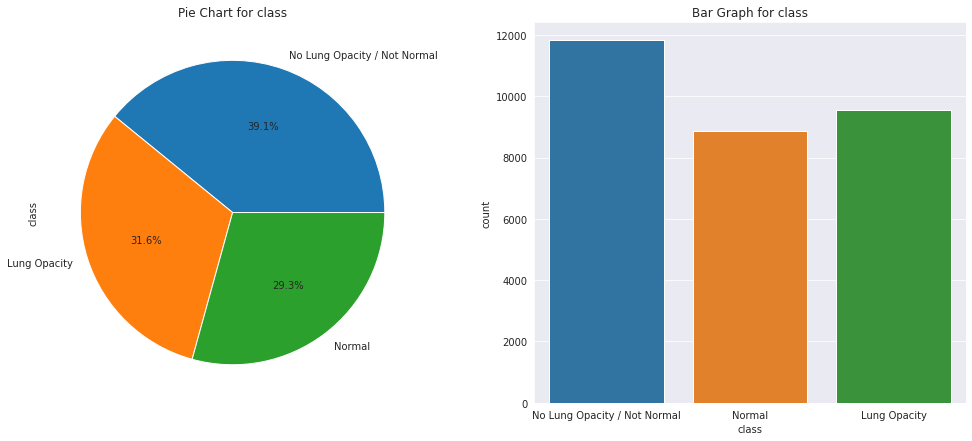

time: 355 ms (started: 2023-03-14 06:17:09 +00:00)


In [ ]:
# Understand the 'class' variable
f,axes=plt.subplots(1,2,figsize=(17,7))
class_info_df['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('class',data=class_info_df,ax=axes[1])
axes[0].set_title('Pie Chart for class')
axes[1].set_title('Bar Graph for class')
plt.show()

## Merge the data

In [ ]:
# Let's merge the two datasets using Patient ID as the merge criteria.
train_class_df = train_labels_df.merge(class_info_df, left_on='patientId', right_on='patientId', how='inner')

time: 30.8 ms (started: 2023-03-14 06:17:10 +00:00)


In [ ]:
train_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37629 entries, 0 to 37628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  37629 non-null  object 
 1   x          16957 non-null  float64
 2   y          16957 non-null  float64
 3   width      16957 non-null  float64
 4   height     16957 non-null  float64
 5   Target     37629 non-null  int64  
 6   class      37629 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ MB
time: 28.9 ms (started: 2023-03-14 06:17:10 +00:00)


In [ ]:
train_class_df.sample(5)

patientId   x   y  width  height  Target  \
20102  9d244e11-444b-4add-84b5-52e277742ca6 NaN NaN    NaN     NaN       0   
8171   4b831076-3931-46db-ac95-0e11df232af8 NaN NaN    NaN     NaN       0   
15346  7db0ba60-d789-4bdf-afb6-298dc68fbdd8 NaN NaN    NaN     NaN       0   
6876   4212e538-53db-4327-8028-b429230b5030 NaN NaN    NaN     NaN       0   
17465  8b5c52fa-61d9-4d89-acaf-20a1b63a309d NaN NaN    NaN     NaN       0   

                              class  
20102                        Normal  
8171   No Lung Opacity / Not Normal  
15346  No Lung Opacity / Not Normal  
6876   No Lung Opacity / Not Normal  
17465                        Normal

time: 12 ms (started: 2023-03-14 06:17:10 +00:00)


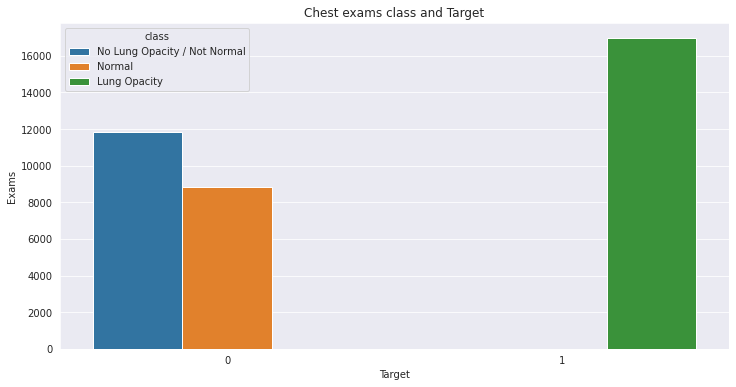

time: 223 ms (started: 2023-03-14 06:17:10 +00:00)


In [ ]:
# Let's plot the number of examinations for each class detected, grouped by Target value.
fig, ax = plt.subplots(nrows=1,figsize=(12,6))
tmp = train_class_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df)
plt.title("Chest exams class and Target")
plt.show()

All chest examinations with Target = 1 (pathology detected) are associated with class: Lung Opacity.

The chest examinations with Target = 0 (no pathology detected) are either of class: Normal or class: No Lung Opacity/Not Normal.

Make a note for modeling: we are using the 2 classes instead of 3.

<Figure size 432x288 with 0 Axes>

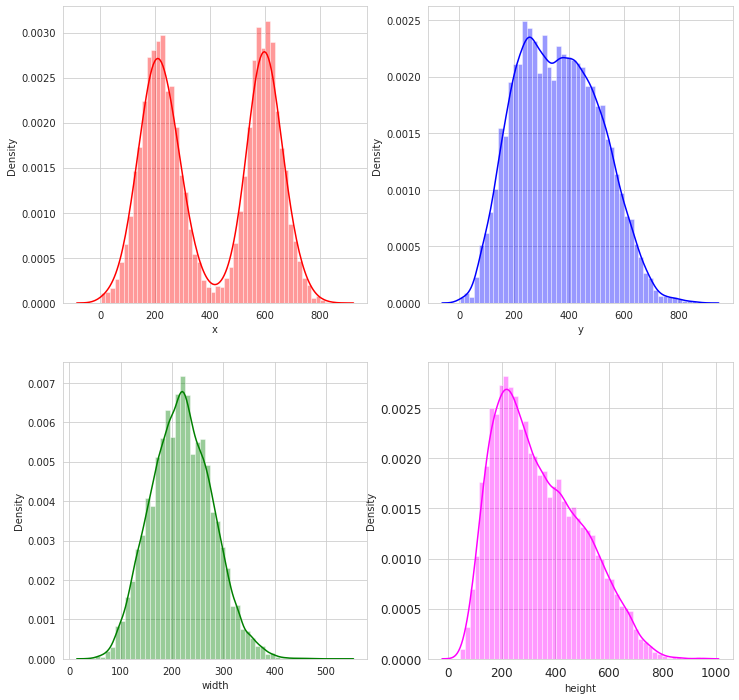

time: 1.44 s (started: 2023-03-14 06:17:10 +00:00)


In [ ]:
# Density plots for class - Lung Opacity (Target class = 1)
target1 = train_class_df[train_class_df['Target']==1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="red", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="magenta", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

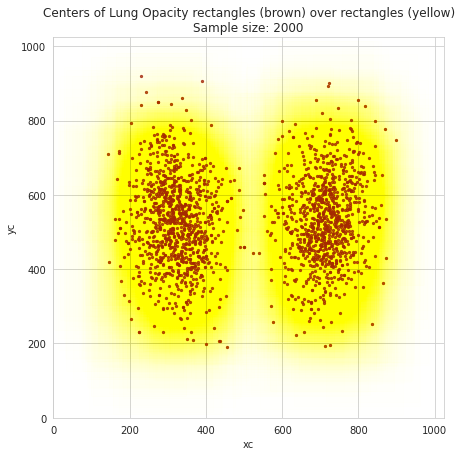

time: 4.1 s (started: 2023-03-14 06:17:12 +00:00)


In [ ]:
# We will show a sample of center points (xc, yc) superimposed with the corresponding sample of the rectangles.
fig, ax = plt.subplots(1,1,figsize=(7,7))
target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title("Centers of Lung Opacity rectangles (brown) over rectangles (yellow)\nSample size: 2000")
target_sample.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color="brown")
for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="yellow"))
plt.show()

<AxesSubplot:>

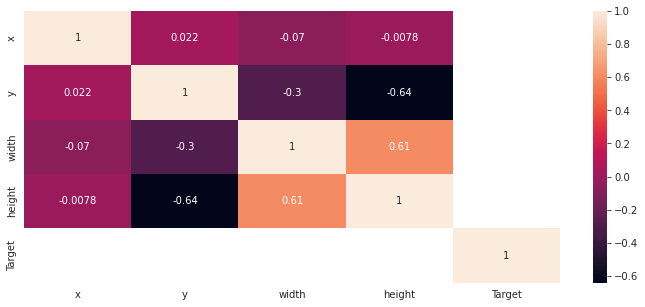

time: 445 ms (started: 2023-03-14 06:17:16 +00:00)


In [ ]:
corr = train_class_df.corr()
plt.figure(figsize=(12,5))

sns.heatmap(corr,annot=True)

## There is high corelation between widht and height

## Explore the DICOM data

In [ ]:
# The files names are the patients IDs.
image_sample_path = os.listdir('stage_2_train_images')[:5]
print(image_sample_path)

# GDrive I/O Problem; Run after

['f79e5a75-5e15-431a-9ba3-de64c1724b65.dcm', 'f79fa94e-8886-425c-95d4-81abfea92aee.dcm', 'f79fc759-fde0-4e2e-8951-26ac8af5ef89.dcm', 'f7a169e2-a1a7-439a-ab83-0d34cf5ae4b9.dcm', 'f7a172fc-a34f-4155-806d-7b0afe2a6156.dcm']
time: 661 ms (started: 2023-03-13 15:08:47 +00:00)


In [ ]:
image_train_path = os.listdir('stage_2_train_images')
image_test_path = os.listdir('stage_2_test_images')
print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

Number of images in train set: 26684 
Number of images in test set: 3000
time: 372 ms (started: 2023-03-13 15:08:48 +00:00)


We have a reduced number of images in the training set (26684), compared with the number of images in the train_df data (30227).

We may have duplicated entries in the train and class datasets.

In [ ]:
print("Unique patientId in  train_class_df: ", train_class_df['patientId'].nunique())

Unique patientId in  train_class_df:  26684
time: 15.3 ms (started: 2023-03-13 15:08:48 +00:00)


It confirms that the number of unique patientId's are equal with the number of DICOM images in the train set.

In [ ]:
# Duplicate patients in the dataset
duplicateRowsDF = train_class_df[train_class_df.duplicated(['patientId'])]
duplicateRowsDF.shape

(10945, 7)

time: 17.9 ms (started: 2023-03-13 15:08:48 +00:00)


In [ ]:
duplicateRowsDF.head(2)

patientId      x      y  width  height  Target  \
5  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
6  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   

          class  
5  Lung Opacity  
6  Lung Opacity

time: 11.1 ms (started: 2023-03-13 15:08:48 +00:00)


In [ ]:
## Examining one of the patient id which is duplicate , we can see that the x,y, widht and height is not the same
## This indicates that the same patient has two bounding boxes in the same dicom image
train_class_df[train_class_df.patientId=='00436515-870c-4b36-a041-de91049b9ab4']

patientId      x      y  width  height  Target  \
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
5  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
6  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   
7  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   

          class  
4  Lung Opacity  
5  Lung Opacity  
6  Lung Opacity  
7  Lung Opacity

time: 18 ms (started: 2023-03-13 15:08:48 +00:00)


In [ ]:
train_class_df[train_class_df.patientId=='00704310-78a8-4b38-8475-49f4573b2dbb']

patientId      x      y  width  height  Target  \
10  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1   
11  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1   
12  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1   
13  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1   

           class  
10  Lung Opacity  
11  Lung Opacity  
12  Lung Opacity  
13  Lung Opacity

time: 18.6 ms (started: 2023-03-13 15:08:49 +00:00)


In [ ]:
# Understand the target, class and duplicate entries
tmp = train_class_df.groupby(['patientId','Target', 'class'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target','class']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
df2.columns = ['Exams', 'Target','Class', 'Entries']
df2

Exams  Target                         Class  Entries
0      1       0  No Lung Opacity / Not Normal    11821
1      1       0                        Normal     8851
2      1       1                  Lung Opacity     2614
3      4       1                  Lung Opacity     3266
4      9       1                  Lung Opacity      119
5     16       1                  Lung Opacity       13

time: 69.9 ms (started: 2023-03-13 15:08:49 +00:00)


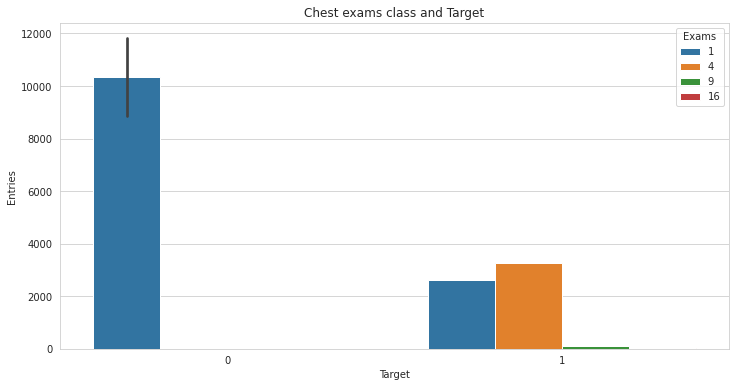

time: 252 ms (started: 2023-03-13 15:08:49 +00:00)


In [ ]:
fig, ax = plt.subplots(nrows=1,figsize=(12,6))
sns.barplot(ax=ax,x = 'Target', y='Entries', hue='Exams',data=df2)
plt.title("Chest exams class and Target")
plt.show()

## Dicom metadata

In [ ]:
samplePatientID = list(train_class_df[:3].T.to_dict().values())[0]['patientId']
samplePatientID = samplePatientID+'.dcm'
dicom_file_path = os.path.join("stage_2_train_images/",samplePatientID)
dicom_file_dataset = dcm.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

time: 777 ms (started: 2023-03-10 11:57:22 +00:00)


We can see that some attributes may have a higher predictive value:

- Patient sex;
- Patient age;
- Modality;
- Body part examined;
- View position;
- Rows & Columns;
- Pixel Spacing.

## Plot DICOM images

In [ ]:
# Plot DICOM images with Target = 1
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join("stage_2_train_images/",patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

time: 3.65 ms (started: 2023-03-10 11:57:23 +00:00)


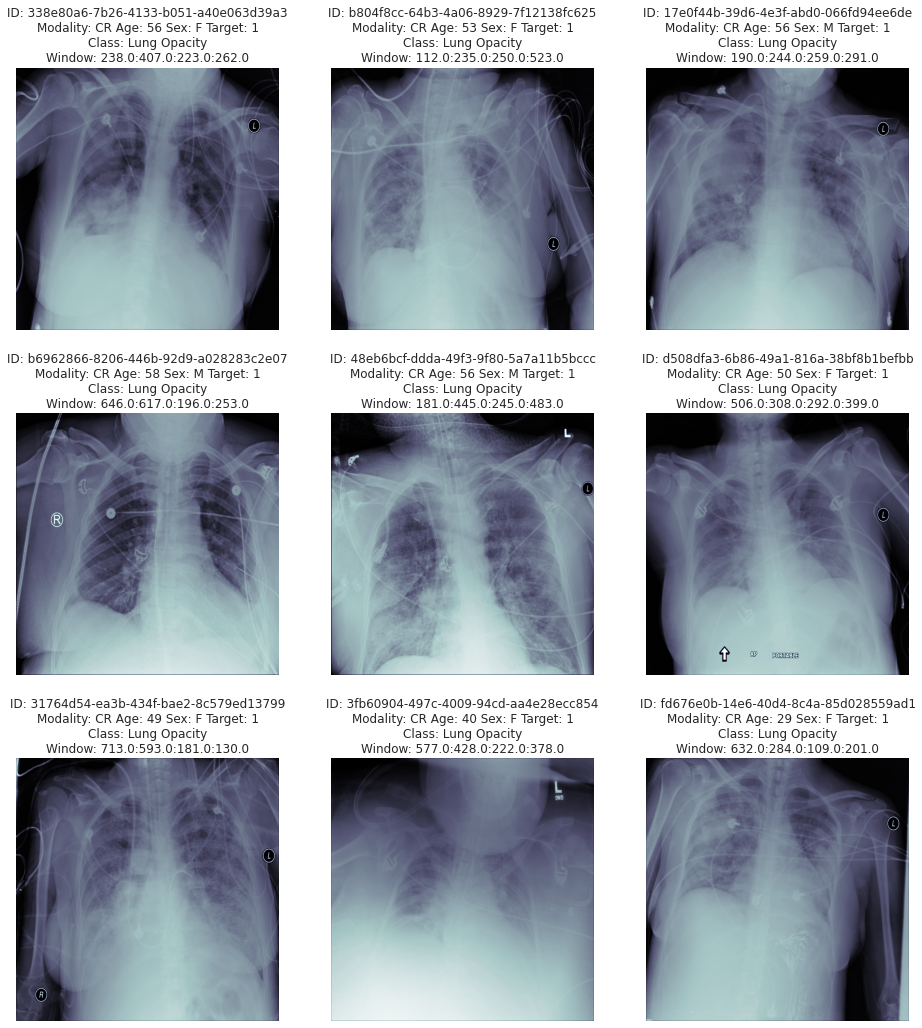

time: 8.74 s (started: 2023-03-10 11:57:23 +00:00)


In [ ]:
show_dicom_images(train_class_df[train_class_df['Target']==1].sample(9))

In [ ]:
# Images with bounding boxes
def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join("stage_2_train_images/",patientImage)
        data_row_img_data = dcm.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = dcm.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = train_class_df[train_class_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="yellow",alpha = 0.1))   
    plt.show()

time: 8.74 ms (started: 2023-03-10 11:57:32 +00:00)


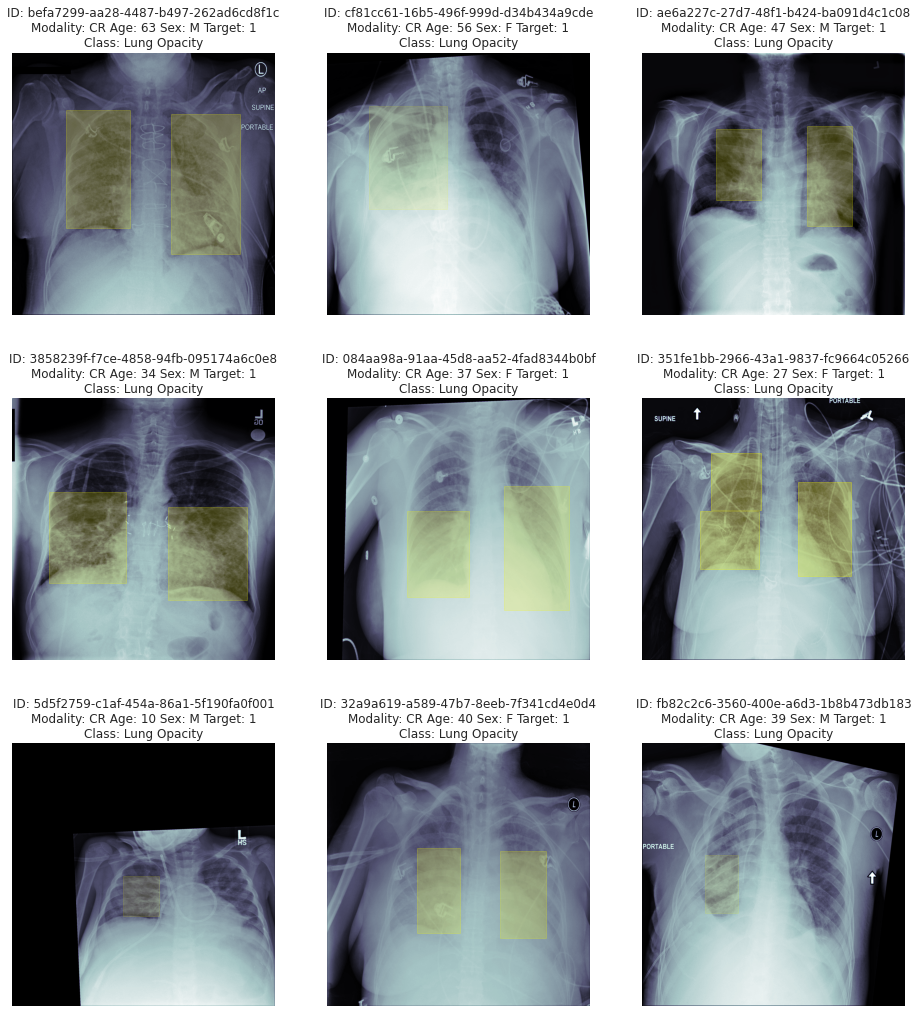

time: 7.93 s (started: 2023-03-10 11:57:32 +00:00)


In [ ]:
show_dicom_images_with_boxes(train_class_df[train_class_df['Target']==1].sample(9))

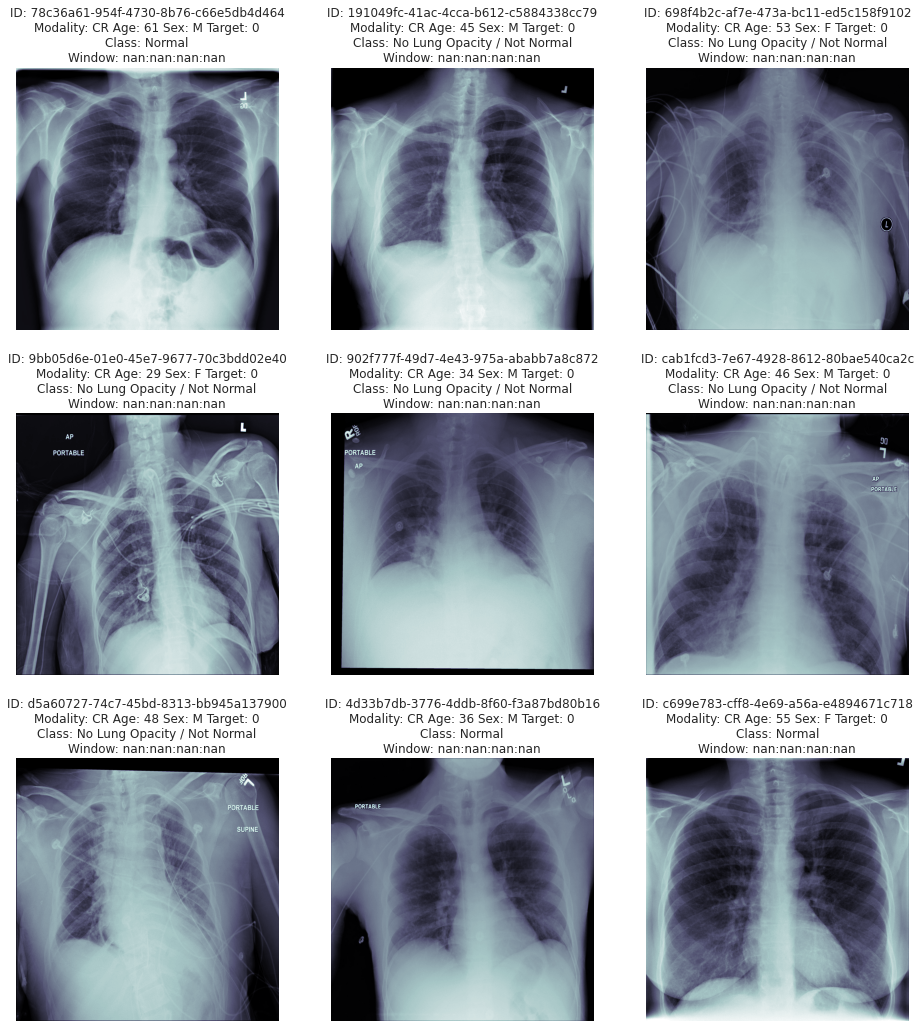

time: 7.98 s (started: 2023-03-10 11:57:40 +00:00)


In [ ]:
# Plot DICOM images with Target = 0
show_dicom_images(train_class_df[train_class_df['Target']==0].sample(9))

## Add meta information from the dicom data

### Train dataset

In [ ]:
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

def process_dicom_data(data_df, data_path):
    for var in vars:
        data_df[var] = None
    image_names = os.listdir(data_path)
    for i, img_name in tqdm_notebook(enumerate(image_names)):
        imagePath = os.path.join(data_path,img_name)
        data_row_img_data = dcm.read_file(imagePath)
        idx = (data_df['patientId']==data_row_img_data.PatientID)
        data_df.loc[idx,'Modality'] = data_row_img_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(data_row_img_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = data_row_img_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = data_row_img_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = data_row_img_data.ViewPosition
        data_df.loc[idx,'ConversionType'] = data_row_img_data.ConversionType
        data_df.loc[idx,'Rows'] = data_row_img_data.Rows
        data_df.loc[idx,'Columns'] = data_row_img_data.Columns  
        data_df.loc[idx,'PixelSpacing'] = str.format("{:4.3f}",data_row_img_data.PixelSpacing[0]) 

time: 8.67 ms (started: 2023-03-10 11:57:48 +00:00)


In [ ]:
process_dicom_data(train_class_df,'stage_2_train_images/')

# max time = 24 min; Run the notebook again if it takes more time

0it [00:00, ?it/s]

time: 24min 3s (started: 2023-03-10 12:30:37 +00:00)


In [ ]:
train_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37629 entries, 0 to 37628
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientId         37629 non-null  object 
 1   x                 16957 non-null  float64
 2   y                 16957 non-null  float64
 3   width             16957 non-null  float64
 4   height            16957 non-null  float64
 5   Target            37629 non-null  int64  
 6   class             37629 non-null  object 
 7   Modality          37629 non-null  object 
 8   PatientAge        37629 non-null  object 
 9   PatientSex        37629 non-null  object 
 10  BodyPartExamined  37629 non-null  object 
 11  ViewPosition      37629 non-null  object 
 12  ConversionType    37629 non-null  object 
 13  Rows              37629 non-null  object 
 14  Columns           37629 non-null  object 
 15  PixelSpacing      37629 non-null  object 
dtypes: float64(4), int64(1), object(11)
memo

In [ ]:
train_class_df.sample(10)

patientId      x      y  width  height  \
12037  67cbdff5-178b-4da2-9a0e-7c7ab1bdcaf1    NaN    NaN    NaN     NaN   
18705  93351a14-30a7-494c-a02b-7f2d72c724c8  612.0  161.0  228.0   552.0   
4985   38fe4a2d-b910-4eb6-9465-64a353d66c02    NaN    NaN    NaN     NaN   
9902   57e70848-0cce-456d-90b1-e3f0a206d8c1    NaN    NaN    NaN     NaN   
14171  75ecaed3-c912-4459-9095-ec6674f524e3    NaN    NaN    NaN     NaN   
27663  c4e517d8-5970-4a03-bcf4-180d6fc65548    NaN    NaN    NaN     NaN   
1256   0b6acd03-8392-49a6-bf52-4543fb678a25    NaN    NaN    NaN     NaN   
31093  de7f40b2-741b-4345-881c-856526ec76dc    NaN    NaN    NaN     NaN   
32334  e7a73b81-7634-46b1-bd54-6465b85c2009    NaN    NaN    NaN     NaN   
1794   14a7fbc6-6661-4382-882f-b2aa317cadc0  705.0  380.0  159.0   211.0   

       Target                         class Modality PatientAge PatientSex  \
12037       0  No Lung Opacity / Not Normal       CR         37          F   
18705       1                  Lung Opacity       CR         21          F   
4985        0  No Lung Opacity / Not Normal       CR         34          M   
9902        0                        Normal       CR         29          F   
14171       0                        Normal       CR          8          M   
27663       0  No Lung Opacity / Not Normal       CR         70          M   
1256        0  No Lung Opacity / Not Normal       CR         64          F   
31093       0  No Lung Opacity / Not Normal       CR         28          M   
32334       0  No Lung Opacity / Not Normal       CR         29          M   
1794        1                  Lung Opacity       CR         42          M   

      BodyPartExamined ViewPosition ConversionType  Rows Columns PixelSpacing  
12037            CHEST           AP            WSD  1024    1024        0.168  
18705            CHEST           AP            WSD  1024    1024        0.139  
4985             CHEST           AP            WSD  1024    1024        0.139  
9902             CHEST           PA            WSD  1024    1024        0.168  
14171            CHEST           PA            WSD  1024    1024        0.139  
27663            CHEST           PA            WSD  1024    1024        0.143  
1256             CHEST           AP            WSD  1024    1024        0.139  
31093            CHEST           AP            WSD  1024    1024        0.139  
32334            CHEST           PA            WSD  1024    1024        0.143  
1794             CHEST           AP            WSD  1024    1024        0.168

time: 49 ms (started: 2023-03-10 12:54:41 +00:00)


### Test dataset

In [ ]:
test_class_df = pd.read_csv('stage_2_sample_submission.csv')

time: 691 ms (started: 2023-03-10 12:54:41 +00:00)


In [ ]:
test_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patientId         3000 non-null   object
 1   PredictionString  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
time: 12.5 ms (started: 2023-03-10 12:54:41 +00:00)


In [ ]:
test_class_df.sample(10)

patientId PredictionString
888   133d3fcb-f893-430a-9ee0-07a720e4b19e  0.5 0 0 100 100
1160  1afa2510-edc7-4ecc-ae32-743403295afe  0.5 0 0 100 100
1640  21425cab-c511-4129-961c-ce5fc01715b1  0.5 0 0 100 100
2894  c0662eac-8a07-4ba1-9c8a-e4d15c3ac067  0.5 0 0 100 100
1611  20d9afc7-a8aa-414d-9e44-fce8775b0dbb  0.5 0 0 100 100
1573  205f6d99-0870-499f-9644-92b98d985d62  0.5 0 0 100 100
903   13659019-299a-47bc-ac85-25500b625fde  0.5 0 0 100 100
400   05aa63ed-15bb-43eb-ba2a-08ebe2029c12  0.5 0 0 100 100
372   0540925d-6075-4bb6-9007-020b53c08958  0.5 0 0 100 100
260   03a75f93-bdfb-4e5a-89f3-548b04fdbb5e  0.5 0 0 100 100

time: 15.6 ms (started: 2023-03-10 12:54:41 +00:00)


In [ ]:
test_class_df = test_class_df.drop('PredictionString',1)
process_dicom_data(test_class_df,'stage_2_test_images/')

0it [00:00, ?it/s]

time: 2min 29s (started: 2023-03-10 12:54:41 +00:00)


In [ ]:
test_class_df.sample(10)

patientId Modality PatientAge PatientSex  \
1051  19b00444-7cea-4504-a557-bd207e023377       CR         51          M   
945   13bd80c3-a3a0-4a2a-83c2-4b298a1f47a0       CR         22          F   
1253  1c3f2cc0-4c64-43bf-828f-8d52f7c5a442       CR          8          M   
1981  25e0c806-3608-4b47-a1e9-f6f0c7787eff       CR         77          M   
1693  21f523b0-7213-4d04-94d7-4ca690ecb69d       CR         52          F   
1087  19fe1b8d-e93e-4810-b8cb-19c59141c90c       CR         41          M   
2121  27d3a0fe-120f-488e-8cb1-4dd73afa755c       CR         64          F   
698   11149595-46a2-48b8-91d3-b9ebc4da8d88       CR          6          F   
1311  1d0de7b7-c3db-424c-bfd1-fe63c121b668       CR         52          M   
1862  243c5673-c107-4cc0-bcd5-6d5bc8a1a8dd       CR         24          M   

     BodyPartExamined ViewPosition ConversionType  Rows Columns PixelSpacing  
1051            CHEST           PA            WSD  1024    1024        0.143  
945             CHEST           AP            WSD  1024    1024        0.139  
1253            CHEST           PA            WSD  1024    1024        0.139  
1981            CHEST           PA            WSD  1024    1024        0.194  
1693            CHEST           PA            WSD  1024    1024        0.143  
1087            CHEST           PA            WSD  1024    1024        0.194  
2121            CHEST           AP            WSD  1024    1024        0.139  
698             CHEST           AP            WSD  1024    1024        0.168  
1311            CHEST           PA            WSD  1024    1024        0.143  
1862            CHEST           AP            WSD  1024    1024        0.168

time: 17.7 ms (started: 2023-03-10 12:57:10 +00:00)


## Modality Attribute

In [ ]:
print("Modalities: train:",train_class_df['Modality'].unique(), "test:", test_class_df['Modality'].unique())

Modalities: train: ['CR'] test: ['CR']
time: 16 ms (started: 2023-03-10 12:57:10 +00:00)


## BodyPartExamined Attribute

In [ ]:
print("Body Part Examined: train:",train_class_df['BodyPartExamined'].unique(), "test:", test_class_df['BodyPartExamined'].unique())

Body Part Examined: train: ['CHEST'] test: ['CHEST']
time: 14.2 ms (started: 2023-03-10 12:57:11 +00:00)


In [ ]:
print("Body Part Examined (train):", train_class_df['BodyPartExamined'].value_counts())
print()
print("Body Part Examined (test):", test_class_df['BodyPartExamined'].value_counts())

Body Part Examined (train): CHEST    37629
Name: BodyPartExamined, dtype: int64

Body Part Examined (test): CHEST    3000
Name: BodyPartExamined, dtype: int64
time: 99.4 ms (started: 2023-03-10 14:05:37 +00:00)


## ViewPosition Attribute

In [ ]:
print("View Position: train:",train_class_df['ViewPosition'].unique(), "test:", test_class_df['ViewPosition'].unique())

View Position: train: ['PA' 'AP'] test: ['PA' 'AP']
time: 13.7 ms (started: 2023-03-10 12:57:11 +00:00)


### Train dataset

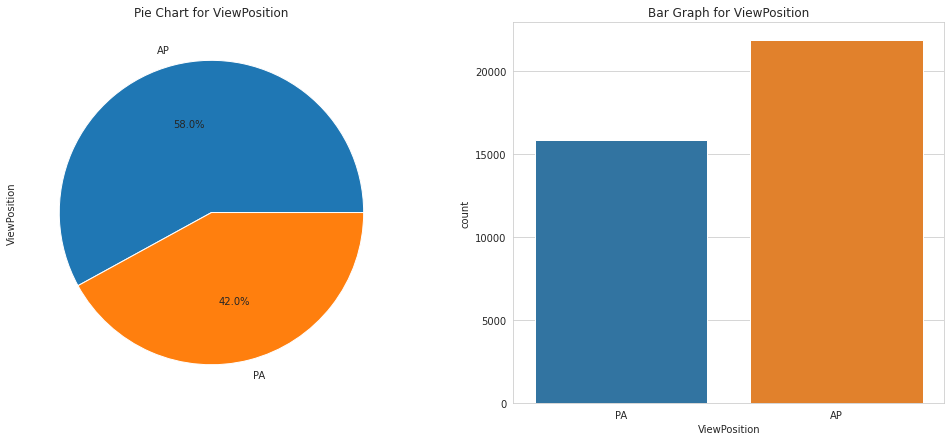

time: 335 ms (started: 2023-03-10 12:57:11 +00:00)


In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
train_class_df['ViewPosition'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('ViewPosition',data=train_class_df,ax=axes[1])
axes[0].set_title('Pie Chart for ViewPosition')
axes[1].set_title('Bar Graph for ViewPosition')
plt.show()

In [ ]:
def plot_window(data, color_point, color_window, text):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.title("Centers of Lung Opacity rectangles over rectangles\n{}".format(text))
    data.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color=color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
            width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color=color_window))
    plt.show()

time: 1.69 ms (started: 2023-03-10 12:57:11 +00:00)


In [ ]:
target1 = train_class_df[train_class_df['Target']==1]

target_sample = target1.sample(2000)
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2

target_ap = target_sample[target_sample['ViewPosition']=='AP']
target_pa = target_sample[target_sample['ViewPosition']=='PA']

time: 21.9 ms (started: 2023-03-10 12:57:11 +00:00)


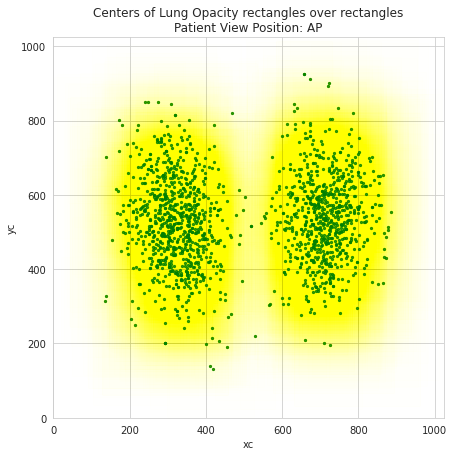

time: 4 s (started: 2023-03-10 12:57:11 +00:00)


In [ ]:
plot_window(target_ap,'green', 'yellow', 'Patient View Position: AP')

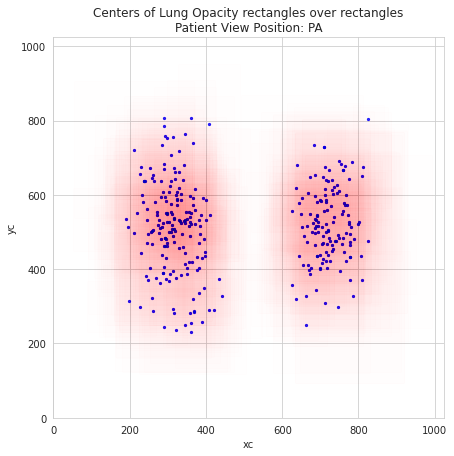

time: 797 ms (started: 2023-03-10 12:57:15 +00:00)


In [ ]:
plot_window(target_pa,'blue', 'red', 'Patient View Position: PA')

### Test dataset

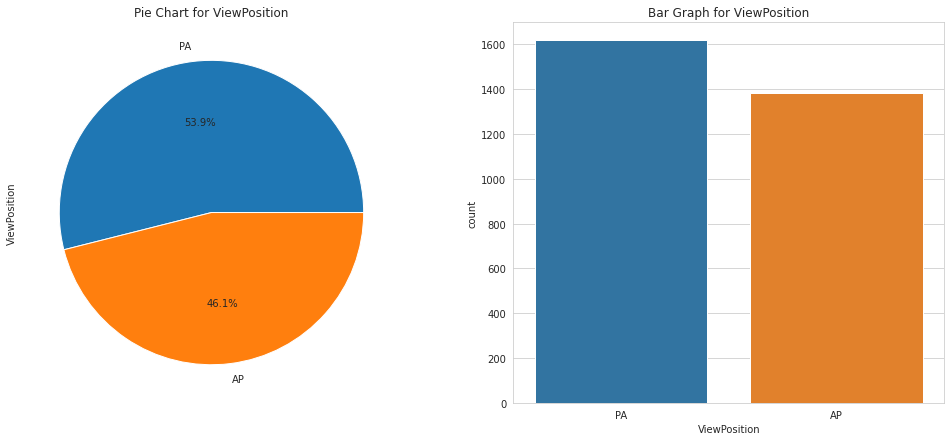

time: 284 ms (started: 2023-03-10 12:57:16 +00:00)


In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
test_class_df['ViewPosition'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('ViewPosition',data=test_class_df,ax=axes[1])
axes[0].set_title('Pie Chart for ViewPosition')
axes[1].set_title('Bar Graph for ViewPosition')
plt.show()

## ConversionType Attribute

In [ ]:
print("Conversion Type: train:",train_class_df['ConversionType'].unique(), "test:", test_class_df['ConversionType'].unique())

Conversion Type: train: ['WSD'] test: ['WSD']
time: 14.2 ms (started: 2023-03-10 12:57:16 +00:00)


In [ ]:
print("Conversion Type (train):", train_class_df['ConversionType'].value_counts())
print()
print("Conversion Type (test):", test_class_df['ConversionType'].value_counts())

Conversion Type (train): WSD    37629
Name: ConversionType, dtype: int64

Conversion Type (test): WSD    3000
Name: ConversionType, dtype: int64
time: 36.9 ms (started: 2023-03-10 14:08:04 +00:00)


## Rows and Columns

In [ ]:
print("Rows: train:",train_class_df['Rows'].unique(), "test:", test_class_df['Rows'].unique())
print("Columns: train:",train_class_df['Columns'].unique(), "test:", test_class_df['Columns'].unique())

Rows: train: [1024] test: [1024]
Columns: train: [1024] test: [1024]
time: 13.4 ms (started: 2023-03-10 12:57:16 +00:00)


In [ ]:
print("Rows: train:", train_class_df['Rows'].value_counts())
print()
print("Columns: train:", test_class_df['Rows'].value_counts())

Rows: train: 1024    37629
Name: Rows, dtype: int64

Columns: train: 1024    3000
Name: Rows, dtype: int64
time: 20.8 ms (started: 2023-03-10 14:14:50 +00:00)


In [ ]:
print("Rows: train:", train_class_df['Columns'].value_counts())
print()
print("Columns: train:", test_class_df['Columns'].value_counts())

Rows: train: 1024    37629
Name: Columns, dtype: int64

Columns: train: 1024    3000
Name: Columns, dtype: int64
time: 20.6 ms (started: 2023-03-10 14:14:55 +00:00)


## PatientAge Attribute

### Train dataset

In [ ]:
tmp = train_class_df.groupby(['Target', 'PatientAge'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target', 'PatientAge']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()

time: 25.2 ms (started: 2023-03-10 12:57:16 +00:00)


In [ ]:
tmp = train_class_df.groupby(['class', 'PatientAge'])['patientId'].count()
df1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df1.groupby(['Exams','class', 'PatientAge']).count()
df3 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()

time: 24 ms (started: 2023-03-10 12:57:16 +00:00)


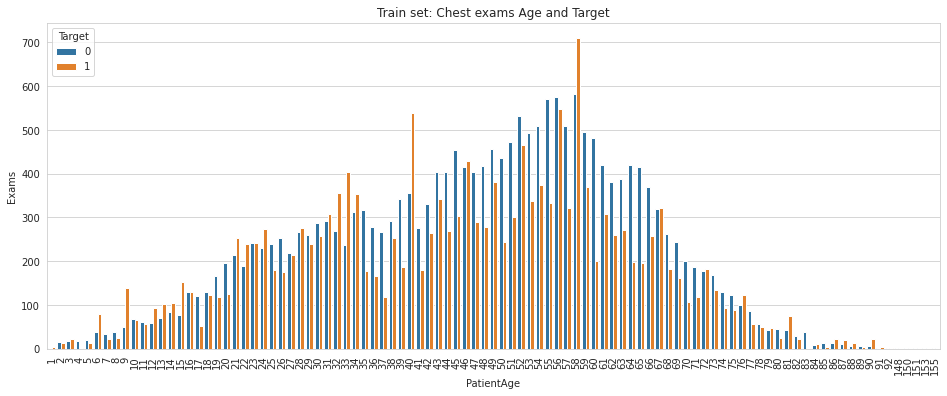

time: 2.53 s (started: 2023-03-10 12:57:16 +00:00)


In [ ]:
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.barplot(ax=ax, x = 'PatientAge', y='Exams', hue='Target',data=df2)
plt.title("Train set: Chest exams Age and Target")
plt.xticks(rotation=90)
plt.show()

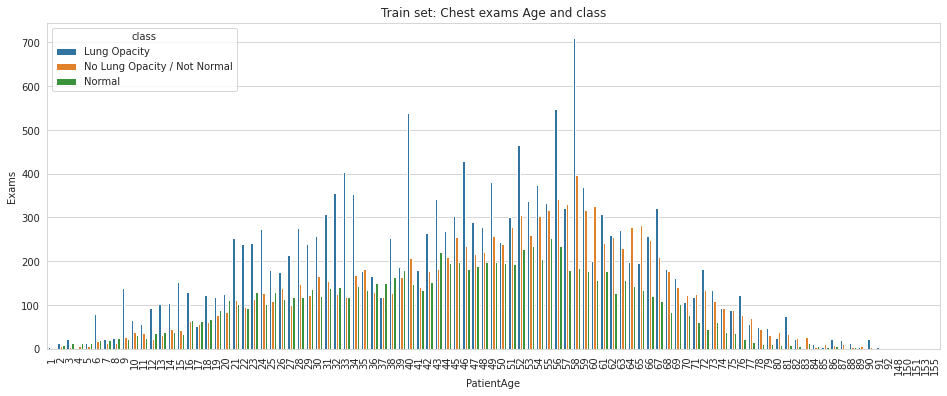

time: 5.8 s (started: 2023-03-10 12:57:19 +00:00)


In [ ]:
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.barplot(ax=ax, x = 'PatientAge', y='Exams', hue='class',data=df3)
plt.title("Train set: Chest exams Age and class")
plt.xticks(rotation=90)
plt.show()

In [ ]:
target_age1 = target_sample[target_sample['PatientAge'] < 20]
target_age2 = target_sample[(target_sample['PatientAge'] >=20) & (target_sample['PatientAge'] < 35)]
target_age3 = target_sample[(target_sample['PatientAge'] >=35) & (target_sample['PatientAge'] < 50)]
target_age4 = target_sample[(target_sample['PatientAge'] >=50) & (target_sample['PatientAge'] < 65)]
target_age5 = target_sample[target_sample['PatientAge'] >= 65]

time: 16.8 ms (started: 2023-03-10 12:57:25 +00:00)


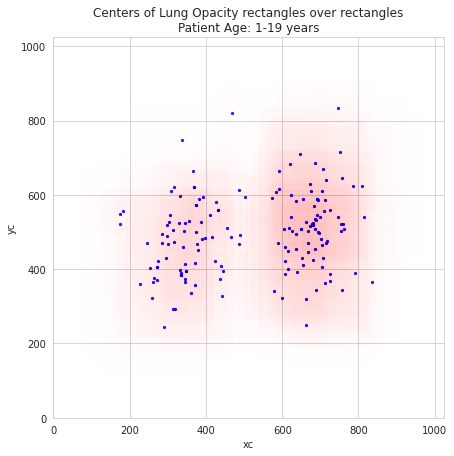

time: 568 ms (started: 2023-03-10 12:57:25 +00:00)


In [ ]:
plot_window(target_age1,'blue', 'red', 'Patient Age: 1-19 years')

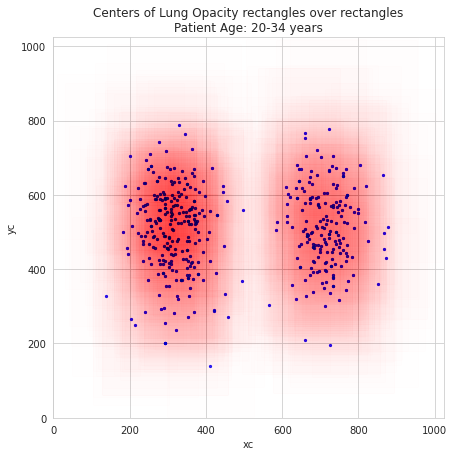

time: 1.05 s (started: 2023-03-10 12:57:25 +00:00)


In [ ]:
plot_window(target_age2,'blue', 'red', 'Patient Age: 20-34 years')

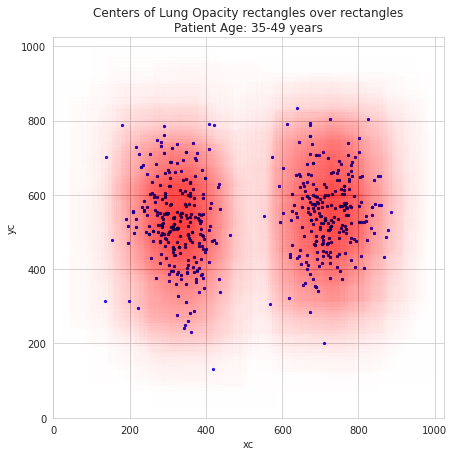

time: 1.58 s (started: 2023-03-10 12:57:26 +00:00)


In [ ]:
plot_window(target_age3,'blue', 'red', 'Patient Age: 35-49 years')

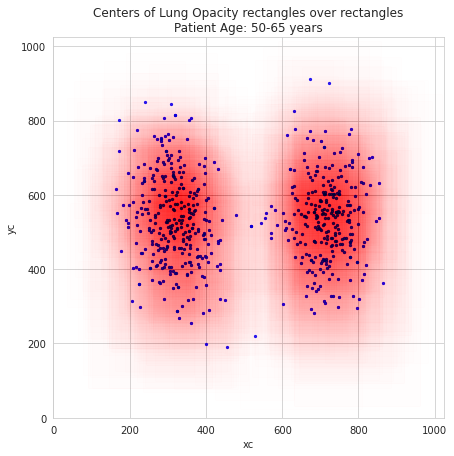

time: 1.33 s (started: 2023-03-10 12:57:28 +00:00)


In [ ]:
plot_window(target_age4,'blue', 'red', 'Patient Age: 50-65 years')

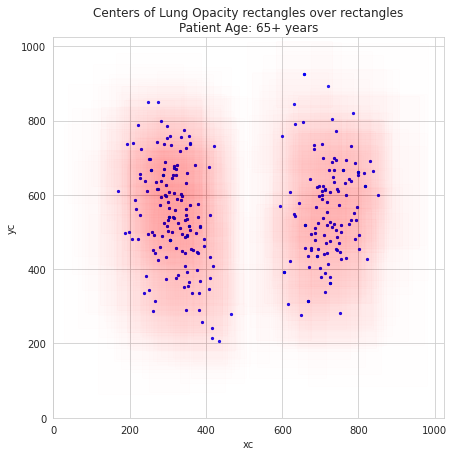

time: 727 ms (started: 2023-03-10 12:57:29 +00:00)


In [ ]:
plot_window(target_age5,'blue', 'red', 'Patient Age: 65+ years')

### Test dataset

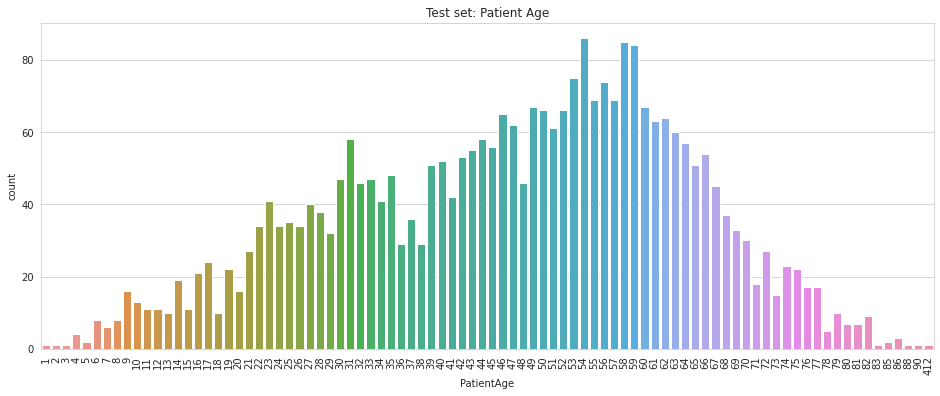

time: 1.69 s (started: 2023-03-10 12:57:30 +00:00)


In [ ]:
fig, (ax) = plt.subplots(nrows=1,figsize=(16,6))
sns.countplot(test_class_df['PatientAge'], ax=ax)
plt.title("Test set: Patient Age")
plt.xticks(rotation=90)
plt.show()

## PatientGender Attribute

### Train dataset

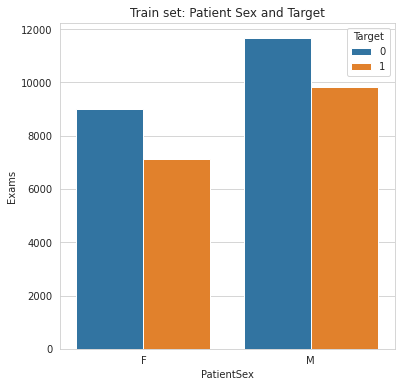

time: 211 ms (started: 2023-03-10 12:57:32 +00:00)


In [ ]:
tmp = train_class_df.groupby(['Target', 'PatientSex'])['patientId'].count()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df.groupby(['Exams','Target', 'PatientSex']).count()
df2 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
fig, ax = plt.subplots(nrows=1,figsize=(6,6))
sns.barplot(ax=ax, x = 'PatientSex', y='Exams', hue='Target',data=df2)
plt.title("Train set: Patient Sex and Target")
plt.show()

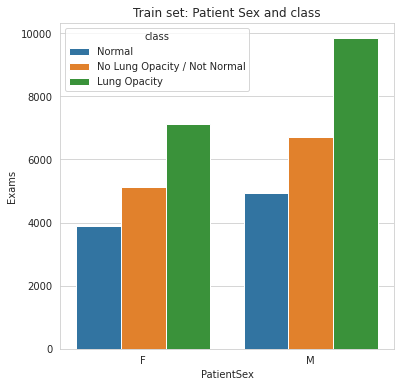

time: 230 ms (started: 2023-03-10 12:57:32 +00:00)


In [ ]:
tmp = train_class_df.groupby(['class', 'PatientSex'])['patientId'].count()
df1 = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
tmp = df1.groupby(['Exams','class', 'PatientSex']).count()
df3 = pd.DataFrame(data=tmp.values, index=tmp.index).reset_index()
fig, (ax) = plt.subplots(nrows=1,figsize=(6,6))
sns.barplot(ax=ax, x = 'PatientSex', y='Exams', hue='class',data=df3)
plt.title("Train set: Patient Sex and class")
plt.show()

In [ ]:
target_female = target_sample[target_sample['PatientSex']=='F']
target_male = target_sample[target_sample['PatientSex']=='M']

time: 6.63 ms (started: 2023-03-10 12:57:32 +00:00)


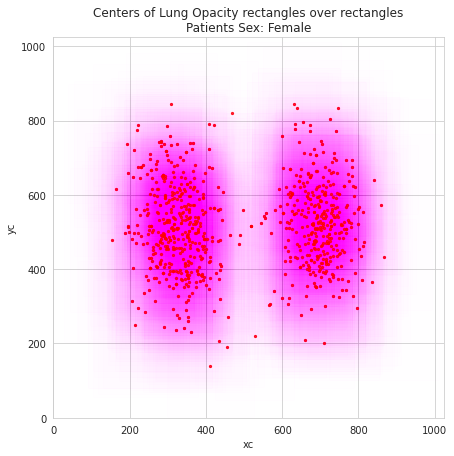

time: 2.18 s (started: 2023-03-10 12:57:32 +00:00)


In [ ]:
plot_window(target_female,"red", "magenta","Patients Sex: Female")

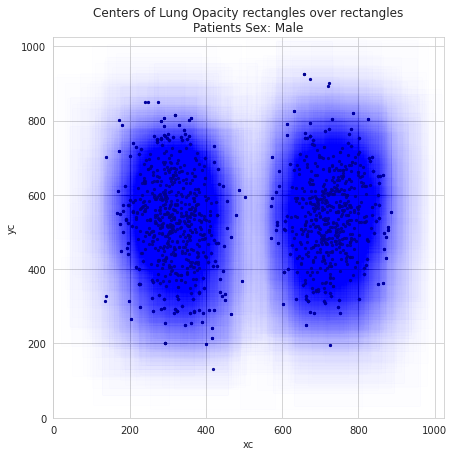

time: 3.58 s (started: 2023-03-10 12:57:34 +00:00)


In [ ]:
plot_window(target_male,"darkblue", "blue", "Patients Sex: Male")

### Test dataset

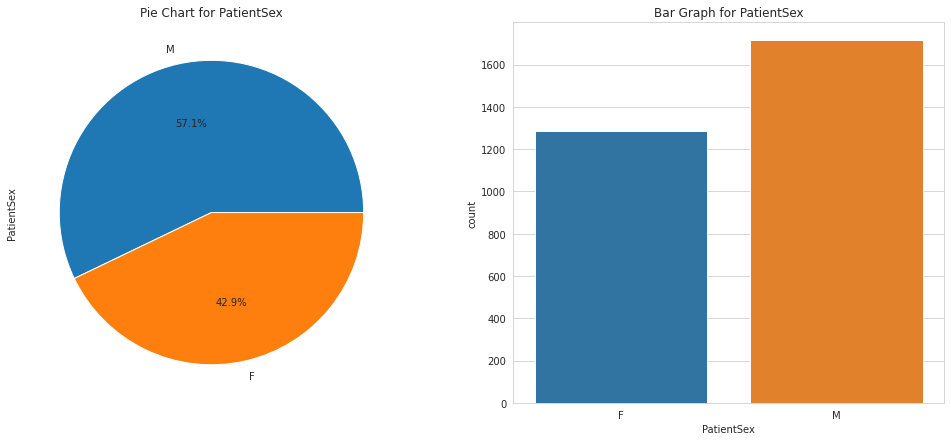

time: 420 ms (started: 2023-03-10 12:57:38 +00:00)


In [ ]:
f,axes=plt.subplots(1,2,figsize=(17,7))
test_class_df['PatientSex'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('PatientSex',data=test_class_df,ax=axes[1])
axes[0].set_title('Pie Chart for PatientSex')
axes[1].set_title('Bar Graph for PatientSex')
plt.show()

## PixelSpacing

### Train dataset

In [ ]:
train_class_df['PixelSpacing'].value_counts()

0.168    14581
0.143     9711
0.139     8813
0.171     3083
0.194     1424
0.199        9
0.115        8
Name: PixelSpacing, dtype: int64

time: 72.7 ms (started: 2023-03-10 16:10:51 +00:00)


<AxesSubplot:xlabel='PixelSpacing', ylabel='count'>

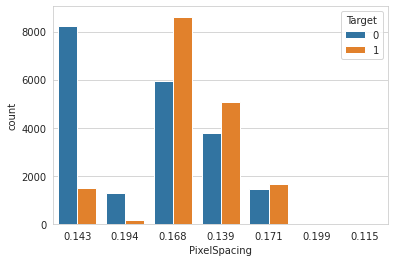

time: 359 ms (started: 2023-03-10 16:12:01 +00:00)


In [ ]:
sns.countplot(x='PixelSpacing',hue='Target',data=train_class_df)

<AxesSubplot:xlabel='PixelSpacing', ylabel='count'>

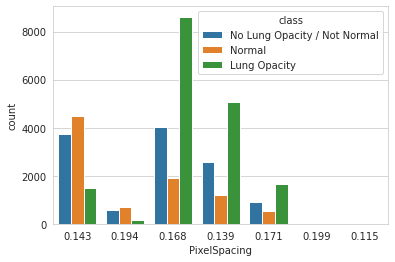

time: 1.95 s (started: 2023-03-10 16:11:48 +00:00)


In [ ]:
sns.countplot(x='PixelSpacing',hue='class',data=train_class_df)

### Test dataset

In [ ]:
test_class_df['PixelSpacing'].value_counts()

0.168    1014
0.143     986
0.139     607
0.171     225
0.194     166
0.115       2
Name: PixelSpacing, dtype: int64

time: 11.8 ms (started: 2023-03-10 16:13:20 +00:00)


<AxesSubplot:xlabel='PixelSpacing', ylabel='count'>

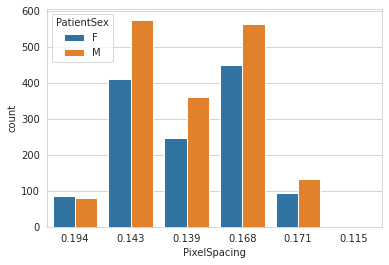

time: 925 ms (started: 2023-03-10 16:14:56 +00:00)


In [ ]:
sns.countplot(x='PixelSpacing',hue='PatientSex',data=test_class_df)

<AxesSubplot:xlabel='PixelSpacing', ylabel='count'>

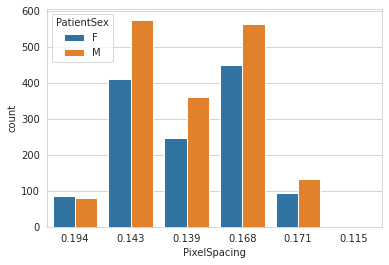

time: 497 ms (started: 2023-03-10 16:15:27 +00:00)


In [ ]:
sns.countplot(x='PixelSpacing',hue='PatientSex',data=test_class_df)

**Modeling for Classification and Object Detection:**

Model Building​: Build a pneumonia detection model starting from basic CNN.
- Prepare the data for model building. Split data into train and validation sets.
- Create the network and compile the model. 
- Print the model summary. 
- Create the train and the validation generator and fit the model.

Model Evaluation: ​Test the model to understand the performance using the right evaluation metrics.
- Evaluate the model using the plots for the loss, accuracy and other metrics identified.
- Predict on a batch of images and provide visualizations of the same
- Identify the areas of improvement for the next iterations.

## MODELING: CLASSIFICATION

## 1. Prepare the data.

In [11]:
# File paths from the G Drive
trainImagesPath = "stage_2_train_images"
testImagesPath = "stage_2_test_images"

labelsPath = "stage_2_train_labels.csv"
classInfoPath = "stage_2_detailed_class_info.csv"

# Read the labels and classinfo
labels = pd.read_csv(labelsPath)
details = pd.read_csv(classInfoPath)

time: 3.07 s (started: 2023-03-25 01:27:04 +00:00)


In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
time: 23.8 ms (started: 2023-03-25 01:27:07 +00:00)


In [13]:
labels.sample(10)

patientId      x      y  width  height  \
7227   554a744a-36f2-4e93-bda2-7ac51b583331    NaN    NaN    NaN     NaN   
11932  7ae347da-a4b0-4e3c-979e-33a509e40649    NaN    NaN    NaN     NaN   
22602  cc269df0-a264-4980-8d99-97a50322cc9c    NaN    NaN    NaN     NaN   
20350  ba8f8cb0-5aed-4242-b117-8516f4c7b51b    NaN    NaN    NaN     NaN   
18207  ac58847c-9f1a-4248-85a1-58ac5d10781a    NaN    NaN    NaN     NaN   
25519  e49d1683-b3d9-4a75-9b30-779201943f1a  132.0  214.0  224.0   382.0   
17370  a62c5825-e9e5-4e8b-8cc5-8a09aeb1f85a    NaN    NaN    NaN     NaN   
10277  6de46d7a-2863-463d-a46a-fd85af10783b    NaN    NaN    NaN     NaN   
12481  7f3c3430-4f1a-4793-b2d3-7ec2b637e2f5    NaN    NaN    NaN     NaN   
24861  df215f73-bde0-4d55-9e55-8d49ff3ee2f4    NaN    NaN    NaN     NaN   

       Target  
7227        0  
11932       0  
22602       0  
20350       0  
18207       0  
25519       1  
17370       0  
10277       0  
12481       0  
24861       0

time: 17.1 ms (started: 2023-03-25 01:27:07 +00:00)


In [14]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB
time: 13.8 ms (started: 2023-03-25 01:27:07 +00:00)


In [15]:
details.sample(10)

patientId                         class
16095  9c27b40f-9d27-4b00-be43-b7953199783a                        Normal
11729  79310bce-abe6-4e7d-a285-2601cfeeca5e                  Lung Opacity
11271  7581fe5e-1611-4563-a327-e140d4327ce8  No Lung Opacity / Not Normal
2474   321d8cc5-0fc3-43de-b12f-851515e800d5                  Lung Opacity
29499  1b52079c-b9ef-42d3-9e9a-17aea3bc6031                        Normal
7434   56ea3620-70fb-403f-8cf6-86ece871c47e                        Normal
20406  bae7b652-311f-4a84-a031-653424887f35                  Lung Opacity
28882  ff33da14-0bd6-4fe4-9675-ef704bc33b84                  Lung Opacity
18635  af42a7f3-092c-4d10-b5a2-5806a1a8aea6                  Lung Opacity
29099  03e4827c-7338-4de3-9ac6-8831ba5637e9                  Lung Opacity

time: 6.9 ms (started: 2023-03-25 01:27:07 +00:00)


In [16]:
# Concatenate the two datasets - 'labels' and 'details':
train_data = pd.concat([labels, details['class']], axis = 1)

train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

time: 10.6 ms (started: 2023-03-25 01:27:07 +00:00)


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB
time: 20.7 ms (started: 2023-03-25 01:27:07 +00:00)


In [18]:
# Using 1000 samples from each class
# Increase the dataset size later
train_data1 = train_data.groupby('class', group_keys=False).apply(lambda x: x.sample(1000))

time: 10.6 ms (started: 2023-03-25 01:27:07 +00:00)


In [19]:
# Check the training dataset with class distribution (data balancing)
train_data1["class"].value_counts()

Lung Opacity                    1000
No Lung Opacity / Not Normal    1000
Normal                          1000
Name: class, dtype: int64

time: 4.31 ms (started: 2023-03-25 01:27:07 +00:00)


In [20]:
# Final train data info
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 29479 to 2923
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  3000 non-null   object 
 1   x          1000 non-null   float64
 2   y          1000 non-null   float64
 3   width      1000 non-null   float64
 4   height     1000 non-null   float64
 5   Target     3000 non-null   int64  
 6   class      3000 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 187.5+ KB
time: 9.5 ms (started: 2023-03-25 01:27:07 +00:00)


In [21]:
# Create the arrays
images = []
ADJUSTED_IMAGE_SIZE = 128 # Other image sizes to try later: [(224, 224), (384, 384), (512, 512), (640, 640)]
imageList = []
classLabels = []       
labels = []
originalImage = []

# Function to read the image from the path and reshape the image to smaller size
def readAndReshapeImage(image):
    img = np.array(image).astype(np.uint8)
    # Resize the image
    res = cv2.resize(img,(ADJUSTED_IMAGE_SIZE,ADJUSTED_IMAGE_SIZE), interpolation = cv2.INTER_LINEAR)
    return res

# Read the image and resize the image
def populateImage(rowData):
    for index, row in rowData.iterrows():
        patientId = row.patientId
        classlabel = row["class"]
        dcm_file = 'stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = dcm.read_file(dcm_file)
        img = dcm_data.pixel_array
        # Convert the images to 3 channels as the dicom image pixels do not have colour class
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = np.stack((img,) * 3, -1)
        imageList.append(readAndReshapeImage(img))
        # originalImage.append(img)
        classLabels.append(classlabel)
    tmpImages = np.array(imageList)
    tmpLabels = np.array(classLabels)
        # originalImages = np.array(originalImage)
    return tmpImages,tmpLabels

time: 3.33 ms (started: 2023-03-25 01:27:07 +00:00)


In [30]:
%%time
## Read the images into numpy arrays
images, labels = populateImage(train_data1)

CPU times: user 34 s, sys: 8.89 s, total: 42.9 s
Wall time: 5min 13s
time: 5min 13s (started: 2023-03-25 01:59:00 +00:00)


In [31]:
# Sample images
images[:1]

array([[[[ 16,  16,  16],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  5,   5,   5]],

        [[ 15,  15,  15],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  6,   6,   6]],

        [[ 14,  14,  14],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  6,   6,   6]],

        ...,

        [[  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  0,   0,   0],
         [ 17,  17,  17],
         [121, 121, 121]],

        [[  5,   5,   5],
         [  5,   5,   5],
         [  4,   4,   4],
         ...,
         [  0,   0,   0],
         [ 18,  18,  18],
         [126, 126, 126]],

        [[ 14,  14,  14],
         [ 11,  11,  11],
         [ 10,  10,  10],
         ...,
         [  2,   2,   2],
        

time: 7.23 ms (started: 2023-03-25 02:04:13 +00:00)


In [32]:
# Sample labels
labels[:10]

array(['Lung Opacity', 'Lung Opacity', 'Lung Opacity', 'Lung Opacity',
       'Lung Opacity', 'Lung Opacity', 'Lung Opacity', 'Lung Opacity',
       'Lung Opacity', 'Lung Opacity'], dtype='<U28')

time: 4.49 ms (started: 2023-03-25 02:04:13 +00:00)


In [33]:
# Shape of the dataset (X, yc)
# The image is of 128*128 with 3 channels
images.shape , labels.shape

((5609, 128, 128, 3), (5609,))

time: 3.17 ms (started: 2023-03-25 02:04:13 +00:00)


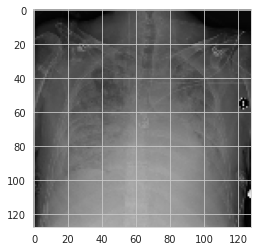

time: 332 ms (started: 2023-03-25 02:04:13 +00:00)


In [34]:
# Check the converted image 
plt.imshow(images[12])

In [35]:
# Check the unique labels
np.unique(labels), len(np.unique(labels))

(array(['Lung Opacity', 'No Lung Opacity / Not Normal', 'Normal'],
       dtype='<U28'), 3)

time: 10.9 ms (started: 2023-03-25 02:04:14 +00:00)


In [36]:
# Encode the labels
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
yc = enc.fit_transform(labels)

time: 18.4 ms (started: 2023-03-25 02:04:14 +00:00)


In [37]:
yc[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

time: 3.74 ms (started: 2023-03-25 02:04:14 +00:00)


In [38]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, yc, test_size=0.3, random_state=0)

time: 97.8 ms (started: 2023-03-25 02:04:14 +00:00)


In [39]:
# Function to plot the various metrics across the epochs
"""
@Description: This function plots our metrics for our models across epochs
@Inputs: The history of the fitted model
@Output: Plots for accuracy, precision, recall, AUC, and loss
"""
def plottingScores(hist):
    fig, ax = plt.subplots(1, 5, figsize=(25, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'precision', 'recall', 'AUC', 'loss']):
        ax[i].plot(hist.history[met])
        ax[i].plot(hist.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

time: 2.54 ms (started: 2023-03-25 02:04:14 +00:00)


In [40]:
# Metrics to evaluate the model
METRICS = ['accuracy', 
           tf.keras.metrics.Precision(name='precision'), 
           tf.keras.metrics.Recall(name='recall'), 
           tf.keras.metrics.AUC(name='AUC')]

time: 2.86 s (started: 2023-03-25 02:04:14 +00:00)


**Callbacks API: A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc):**

**1. ModelCheckpoint callback:** is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

A few options this callback provides include:

- Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.
- Definition of 'best'; which quantity to monitor and whether it should be maximized or minimized.
- The frequency it should save at. Currently, the callback supports saving at the end of every epoch, or after a fixed number of training batches.
- Whether only weights are saved, or the whole model is saved.

**2. EarlyStopping callback:** Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

**3. LearningRateScheduler callback:** Learning rate scheduler.

At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

**4. ReduceLROnPlateau callback:** Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [41]:
# Define the callback, checkpoint and early_stopping
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cr_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

time: 12.5 ms (started: 2023-03-25 02:04:17 +00:00)


## Model-1: Base Model

In [42]:
# Function to create a simple fully connected NN
def fcnn_model():
    # Basic model with a flattening layer followed by 2 dense layers
    model = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape = (128, 128, 3)), 
                tf.keras.layers.Dense(128, activation = "relu"), 
                tf.keras.layers.Dense(3, activation = "softmax")
                ])
    
    return model

time: 4.65 ms (started: 2023-03-25 02:04:17 +00:00)


In [43]:
# Build our FCNN model and compile
model1 = fcnn_model()
model1.summary()
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 6,291,971
Trainable params: 6,291,971
Non-trainable params: 0
_________________________________________________________________
time: 164 ms (started: 2023-03-25 02:04:17 +00:00)


In [44]:
# Fit the model
H = model1.fit(X_train, y_train,  
                          epochs = 30,
                          batch_size = 128,
                          validation_split = 0.2, 
                          # class_weight = classWeight, 
                          verbose = 1,
                          callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler])

Epoch 1/30
25/25 [==============================] - 8s 136ms/step - loss: 49849.2070 - accuracy: 0.3459 - precision: 0.3459 - recall: 0.3459 - AUC: 0.5094 - val_loss: 2102.8447 - val_accuracy: 0.5433 - val_precision: 0.5433 - val_recall: 0.5433 - val_AUC: 0.6574 - lr: 0.0100
Epoch 2/30
25/25 [==============================] - 1s 22ms/step - loss: 1260.3652 - accuracy: 0.4815 - precision: 0.4815 - recall: 0.4815 - AUC: 0.6108 - val_loss: 504.2290 - val_accuracy: 0.5216 - val_precision: 0.5216 - val_recall: 0.5216 - val_AUC: 0.6404 - lr: 0.0089
Epoch 3/30
25/25 [==============================] - 1s 22ms/step - loss: 331.9548 - accuracy: 0.5414 - precision: 0.5414 - recall: 0.5414 - AUC: 0.6567 - val_loss: 263.9551 - val_accuracy: 0.4847 - val_precision: 0.4847 - val_recall: 0.4847 - val_AUC: 0.6135 - lr: 0.0079
Epoch 4/30
25/25 [==============================] - 1s 22ms/step - loss: 166.4397 - accuracy: 0.5535 - precision: 0.5535 - recall: 0.5535 - AUC: 0.6658 - val_loss: 177.8865 - val_

53/53 [==============================] - 0s 4ms/step - loss: 10.9302 - accuracy: 0.6328 - precision: 0.6328 - recall: 0.6328 - AUC: 0.7454
{'loss': 10.930243492126465, 'accuracy': 0.6327985525131226, 'precision': 0.6327985525131226, 'recall': 0.6327985525131226, 'AUC': 0.7454316020011902}


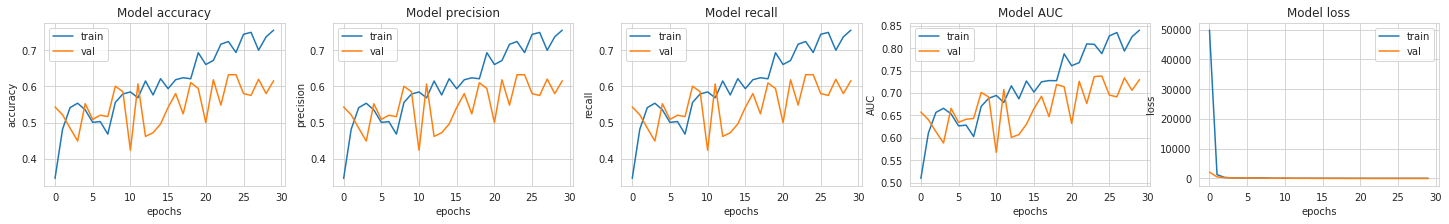

In [45]:
# Evaluate and display results
results = model1.evaluate(X_test, y_test) # Evaluate the model on test data
results = dict(zip(model1.metrics_names,results))

print(results)
plottingScores(H)

In [46]:
y_pred = model1.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

time: 1.95 s (started: 2023-03-25 02:04:40 +00:00)
53/53 [==============================] - 0s 2ms/step
time: 442 ms (started: 2023-03-25 02:04:42 +00:00)


In [47]:
y_pred[:10]

array([[9.1158631e-10, 9.9880219e-01, 1.1978684e-03],
       [1.0000000e+00, 1.9673133e-10, 1.3054741e-17],
       [4.2965649e-25, 1.0000000e+00, 9.6033059e-16],
       [1.6006921e-30, 1.0000000e+00, 7.9788942e-33],
       [1.7161180e-17, 1.0000000e+00, 4.4823514e-17],
       [9.9985075e-01, 1.4928424e-04, 1.9262859e-22],
       [2.3723891e-01, 4.0507304e-09, 7.6276112e-01],
       [9.9999225e-01, 7.7055684e-06, 0.0000000e+00],
       [3.5582500e-19, 9.9513948e-01, 4.8604743e-03],
       [9.9999559e-01, 4.3661971e-06, 0.0000000e+00]], dtype=float32)

time: 4.46 ms (started: 2023-03-25 02:04:42 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       603
           1       0.55      0.62      0.58       600
           2       0.75      0.50      0.60       480

    accuracy                           0.63      1683
   macro avg       0.65      0.62      0.63      1683
weighted avg       0.65      0.63      0.63      1683

Confusion Matrix Chart:


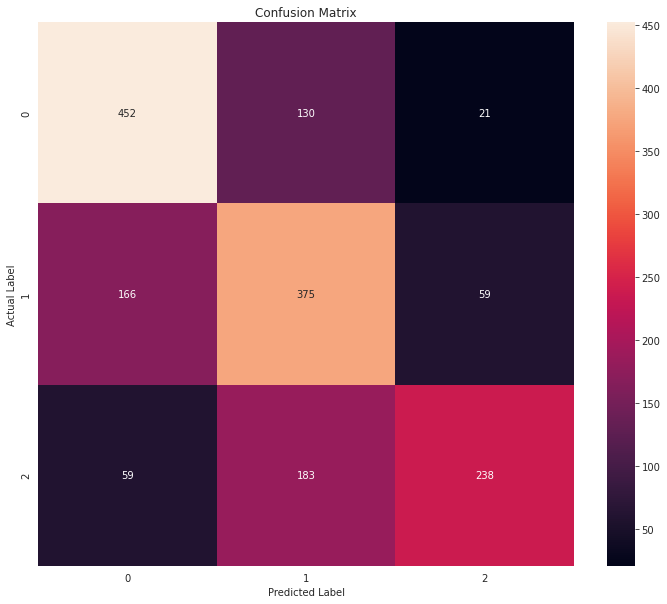

time: 326 ms (started: 2023-03-25 02:04:42 +00:00)


In [48]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [49]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model1.evaluate(X_train, y_train)
Test_Accuracy = model1.evaluate(X_test, y_test)

base_1 = []
base_1.append(['Model-1: Base Model', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 0s 5ms/step - loss: 10.9302 - accuracy: 0.6328 - precision: 0.6328 - recall: 0.6328 - AUC: 0.7454
time: 1.33 s (started: 2023-03-25 02:04:43 +00:00)


In [50]:
# Training history dataframe
hist = pd.DataFrame(H.history)

# Understand the various Metrics with epochs
hist

loss  accuracy  precision    recall       AUC     val_loss  \
0   49849.207031  0.345860   0.345860  0.345860  0.509395  2102.844727   
1    1260.365234  0.481529   0.481529  0.481529  0.610810   504.229034   
2     331.954803  0.541401   0.541401  0.541401  0.656732   263.955078   
3     166.439743  0.553503   0.553503  0.553503  0.665832   177.886536   
4     128.254028  0.535350   0.535350  0.535350  0.653528   125.866425   
5     142.282593  0.500637   0.500637  0.500637  0.626685   186.914368   
6     166.783493  0.502866   0.502866  0.502866  0.628209   136.788132   
7     177.295303  0.468153   0.468153  0.468153  0.602736   125.740799   
8     102.626175  0.555732   0.555732  0.555732  0.670205    62.574825   
9      59.015663  0.578981   0.578981  0.578981  0.688172    44.141380   
10     44.161621  0.584713   0.584713  0.584713  0.694559   133.152267   
11     48.231647  0.568471   0.568471  0.568471  0.678942    32.183952   
12     31.273994  0.614968   0.614968  0.614968  0.716060    52.562325   
13     39.337997  0.576433   0.576433  0.576433  0.687051    46.630562   
14     24.599930  0.621338   0.621338  0.621338  0.726842    33.347065   
15     27.794769  0.593631   0.593631  0.593631  0.702036    38.333553   
16     24.218998  0.618471   0.618471  0.618471  0.724987    28.169601   
17     21.310295  0.623885   0.623885  0.623885  0.727739    38.209267   
18     20.337744  0.621019   0.621217  0.621019  0.727458    19.307865   
19     11.301879  0.692994   0.693214  0.692994  0.787367    19.267494   
20     12.813560  0.660510   0.660510  0.660510  0.760905    30.374329   
21     12.917532  0.671656   0.671656  0.671656  0.767853    14.907911   
22      8.417212  0.716560   0.716560  0.716560  0.809543    16.803469   
23      7.885828  0.723885   0.724116  0.723885  0.808765    13.890759   
24      8.972069  0.693631   0.693631  0.693631  0.787995    13.613379   
25      6.507399  0.743949   0.743949  0.743949  0.827535    14.919806   
26      6.110028  0.749363   0.749283  0.749045  0.834999    13.737605   
27      7.854130  0.700000   0.700000  0.700000  0.793561    11.835890   
28      6.039867  0.736943   0.737177  0.736943  0.825587    14.447656   
29      5.431669  0.755414   0.755655  0.755414  0.840363    12.668351   

    val_accuracy  val_precision  val_recall   val_AUC        lr  
0       0.543257       0.543257    0.543257  0.657443  0.010000  
1       0.521628       0.521628    0.521628  0.640368  0.008913  
2       0.484733       0.484733    0.484733  0.613522  0.007943  
3       0.449109       0.449109    0.449109  0.588518  0.007079  
4       0.552163       0.552163    0.552163  0.665690  0.006310  
5       0.508906       0.508906    0.508906  0.634579  0.005623  
6       0.520356       0.520356    0.520356  0.641367  0.005012  
7       0.516539       0.516539    0.516539  0.643371  0.004467  
8       0.600509       0.600509    0.600509  0.701198  0.003981  
9       0.585242       0.585242    0.585242  0.691110  0.003548  
10      0.423664       0.423664    0.423664  0.567541  0.003162  
11      0.606870       0.606870    0.606870  0.707680  0.002818  
12      0.461832       0.461832    0.461832  0.601037  0.002512  
13      0.472010       0.472010    0.472010  0.607126  0.002239  
14      0.496183       0.496183    0.496183  0.630332  0.001995  
15      0.541985       0.541985    0.541985  0.664989  0.001778  
16      0.580153       0.580153    0.580153  0.692684  0.001585  
17      0.524173       0.524173    0.524173  0.647295  0.001413  
18      0.610687       0.610191    0.609415  0.718978  0.001259  
19      0.594148       0.594148    0.594148  0.713973  0.001122  
20      0.500000       0.500000    0.500000  0.632151  0.001000  
21      0.618321       0.618321    0.618321  0.726134  0.000891  
22      0.548346       0.548346    0.548346  0.676538  0.000794  
23      0.632316       0.632316    0.632316  0.736802  0.000708  
24      0.632316       0.632316    0.632316  0.737761  0.000631  
2

time: 31.6 ms (started: 2023-03-25 02:04:44 +00:00)


In [51]:
hist.describe()

loss   accuracy  precision     recall        AUC     val_loss  \
count     30.000000  30.000000  30.000000  30.000000  30.000000    30.000000   
mean    1758.658075   0.611062   0.611096   0.611051   0.718082   144.310147   
std     9085.805497   0.098043   0.098078   0.098027   0.081092   383.986755   
min        5.431669   0.345860   0.345860   0.345860   0.509395    11.835890   
25%        9.554521   0.554060   0.554060   0.554060   0.666925    15.390721   
50%       26.197350   0.616720   0.616720   0.616720   0.720523    35.778166   
75%      121.847065   0.693471   0.693527   0.693471   0.787838   125.835018   
max    49849.207031   0.755414   0.755655   0.755414   0.840363  2102.844727   

       val_accuracy  val_precision  val_recall    val_AUC         lr  
count     30.000000      30.000000   30.000000  30.000000  30.000000  
mean       0.549873       0.549883    0.549830   0.669829   0.002968  
std        0.058230       0.058245    0.058185   0.047862   0.002763  
min        0.423664       0.423664    0.423664   0.567541   0.000355  
25%        0.510814       0.510814    0.510814   0.636026   0.000819  
50%        0.550254       0.550254    0.550254   0.671114   0.001887  
75%        0.598919       0.598919    0.598919   0.707272   0.004345  
max        0.632316       0.632316    0.632316   0.737761   0.010000

time: 51.8 ms (started: 2023-03-25 02:04:44 +00:00)


## Model-2: CNN-1

In [52]:
# Function to create a complex NN model
def cnn_model1():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding = 'valid', activation = 'relu', input_shape=(128, 128, 3)), #  convolutional layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)), # flatten output of conv
        
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding = 'valid', activation = 'relu'), #  convolutional layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)), # flatten output of conv
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'valid'),
        tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'valid'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Flatten(), # flatten output of conv
        tf.keras.layers.Dense(512, activation = "relu"), # hidden layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation = "relu"), #  output layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation = "softmax")])
    
    return model

time: 6.65 ms (started: 2023-03-25 02:04:44 +00:00)


In [53]:
# Build and compile the model
model2 = cnn_model1()
model2.summary()
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)       

In [54]:
# Fit the model
H = model2.fit(X_train, y_train,  
                      epochs=30, 
                      validation_split = 0.20, 
                      batch_size=128,
                      # class_weight=classWeight,
                      callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
                      verbose=1)

Epoch 1/30
25/25 [==============================] - 14s 125ms/step - loss: 1.2800 - accuracy: 0.4701 - precision: 0.5456 - recall: 0.4717 - AUC: 0.7001 - val_loss: 56.0337 - val_accuracy: 0.3372 - val_precision: 0.3372 - val_recall: 0.3372 - val_AUC: 0.5047 - lr: 0.0100
Epoch 2/30
25/25 [==============================] - 2s 83ms/step - loss: 0.9630 - accuracy: 0.5449 - precision: 0.5818 - recall: 0.4204 - AUC: 0.7352 - val_loss: 16.2147 - val_accuracy: 0.3193 - val_precision: 0.3193 - val_recall: 0.3193 - val_AUC: 0.4869 - lr: 0.0089
Epoch 3/30
25/25 [==============================] - 4s 151ms/step - loss: 0.9170 - accuracy: 0.5516 - precision: 0.5970 - recall: 0.4146 - AUC: 0.7524 - val_loss: 4.3532 - val_accuracy: 0.3422 - val_precision: 0.3436 - val_recall: 0.3422 - val_AUC: 0.5323 - lr: 0.0079
Epoch 4/30
25/25 [==============================] - 3s 103ms/step - loss: 0.8938 - accuracy: 0.5666 - precision: 0.6187 - recall: 0.4341 - AUC: 0.7647 - val_loss: 1.3821 - val_accuracy: 0.413

53/53 [==============================] - 1s 9ms/step - loss: 0.7753 - accuracy: 0.6471 - precision: 0.6931 - recall: 0.5288 - AUC: 0.8272
{'loss': 0.7753071188926697, 'accuracy': 0.6470588445663452, 'precision': 0.6931464076042175, 'recall': 0.5288175940513611, 'AUC': 0.8272116780281067}


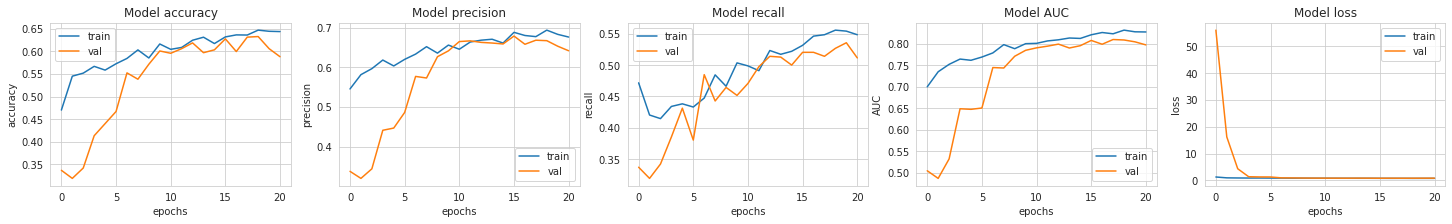

time: 24.7 s (started: 2023-03-25 02:05:47 +00:00)


In [55]:
# Evaluate the model results and put into a dict
results = model2.evaluate(X_test, y_test)
results = dict(zip(model2.metrics_names,results))

print(results)
plottingScores(H)

In [56]:
y_pred = model2.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 0s 5ms/step
time: 600 ms (started: 2023-03-25 02:06:12 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72       603
           1       0.56      0.43      0.49       600
           2       0.73      0.70      0.72       480

    accuracy                           0.65      1683
   macro avg       0.65      0.65      0.64      1683
weighted avg       0.64      0.65      0.64      1683

Confusion Matrix Chart:


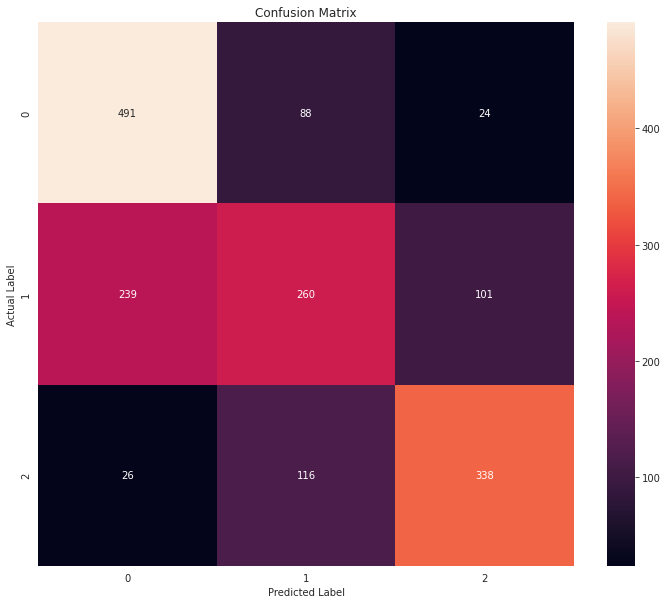

time: 301 ms (started: 2023-03-25 02:06:12 +00:00)


In [57]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [58]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model2.evaluate(X_train, y_train)
Test_Accuracy = model2.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-2: CNN-1', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 0s 9ms/step - loss: 0.7753 - accuracy: 0.6471 - precision: 0.6931 - recall: 0.5288 - AUC: 0.8272
time: 2.39 s (started: 2023-03-25 02:06:13 +00:00)


## Model-3: CNN-2

In [59]:
# Function to create a complex NN model
def cnn_model2():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(128, 128, 3)), #  convolutional layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)), # flatten output of conv
        
        tf.keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'), #  convolutional layer
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)), # flatten output of conv
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='valid'),
        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='valid'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.3),
        

        tf.keras.layers.Flatten(), # Flattening
        
        # Full Connection
        tf.keras.layers.Dense(64, activation='relu'), # hidden layer
        tf.keras.layers.Dropout(0.5), # Dropout
        tf.keras.layers.Dense(3, activation='softmax')]) #  output layer
    
    return model

time: 3.39 ms (started: 2023-03-25 02:06:15 +00:00)


In [60]:
# Build and compile the model
model3 = cnn_model2()
model3.summary()
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 25)      700       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 25)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 25)        5650      
                                                                 
 batch_normalization_3 (Batc  (None, 61, 61, 25)       100       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 25)       0         
 2D)                                                             
                                                      

In [61]:
# Fit the model
H = model3.fit(X_train, y_train,  
                      epochs=30, 
                      validation_split = 0.20, 
                      batch_size=128,
                      # class_weight=classWeight,
                      callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
                      verbose=1)

Epoch 1/30
25/25 [==============================] - 7s 97ms/step - loss: 5.1520 - accuracy: 0.3914 - precision: 0.5694 - recall: 0.3239 - AUC: 0.6598 - val_loss: 127.9711 - val_accuracy: 0.3791 - val_precision: 0.3796 - val_recall: 0.3791 - val_AUC: 0.5348 - lr: 0.0100
Epoch 2/30
25/25 [==============================] - 1s 58ms/step - loss: 1.1065 - accuracy: 0.4248 - precision: 0.6238 - recall: 0.1003 - AUC: 0.6039 - val_loss: 37.8964 - val_accuracy: 0.3944 - val_precision: 0.3946 - val_recall: 0.3931 - val_AUC: 0.5464 - lr: 0.0089
Epoch 3/30
25/25 [==============================] - 2s 61ms/step - loss: 1.0431 - accuracy: 0.4427 - precision: 0.6477 - recall: 0.1271 - AUC: 0.6360 - val_loss: 15.2578 - val_accuracy: 0.3690 - val_precision: 0.3702 - val_recall: 0.3664 - val_AUC: 0.5441 - lr: 0.0079
Epoch 4/30
25/25 [==============================] - 1s 58ms/step - loss: 1.0234 - accuracy: 0.4529 - precision: 0.6574 - recall: 0.1576 - AUC: 0.6534 - val_loss: 3.3653 - val_accuracy: 0.3333 

53/53 [==============================] - 1s 8ms/step - loss: 0.8387 - accuracy: 0.6126 - precision: 0.7167 - recall: 0.3832 - AUC: 0.8001
{'loss': 0.8386739492416382, 'accuracy': 0.6125965714454651, 'precision': 0.7166666388511658, 'recall': 0.38324421644210815, 'AUC': 0.8001126050949097}


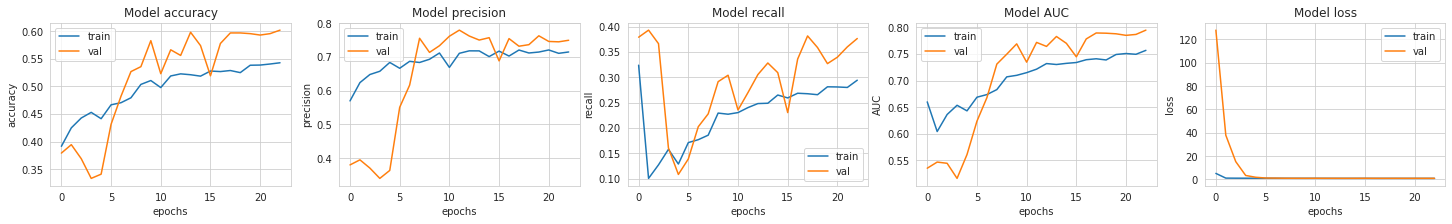

time: 4.57 s (started: 2023-03-25 02:06:57 +00:00)


In [62]:
# Evaluate the model results and put into a dict
results = model3.evaluate(X_test, y_test)
results = dict(zip(model3.metrics_names,results))

print(results)
plottingScores(H)

In [63]:
y_pred = model3.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 0s 5ms/step
time: 695 ms (started: 2023-03-25 02:07:01 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       603
           1       0.50      0.48      0.49       600
           2       0.68      0.59      0.63       480

    accuracy                           0.61      1683
   macro avg       0.62      0.61      0.61      1683
weighted avg       0.61      0.61      0.61      1683

Confusion Matrix Chart:


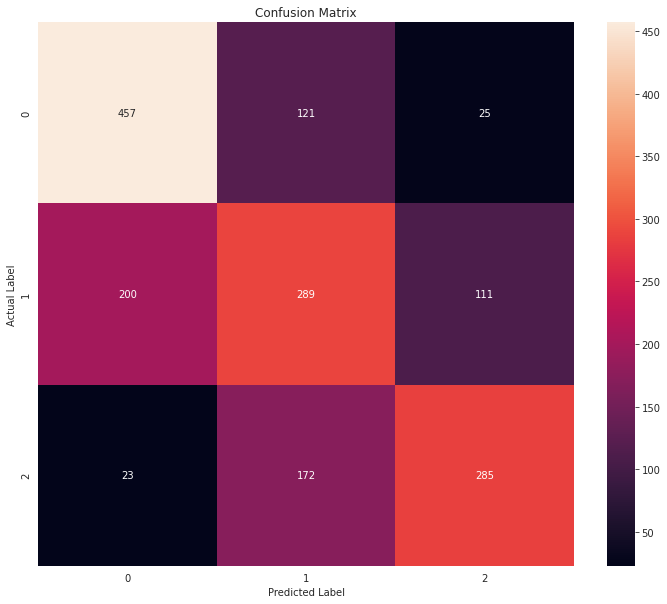

time: 496 ms (started: 2023-03-25 02:07:02 +00:00)


In [64]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [65]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model3.evaluate(X_train, y_train)
Test_Accuracy = model3.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-3: CNN-2', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 0s 8ms/step - loss: 0.8387 - accuracy: 0.6126 - precision: 0.7167 - recall: 0.3832 - AUC: 0.8001
time: 2.47 s (started: 2023-03-25 02:07:02 +00:00)


# Milestone-2

## Model-4: MobileNetV2

In [66]:
# # Pre-process the data for VGG16 model
# X_train = preprocess_input(X_train) 
# X_test = preprocess_input(X_test)

time: 399 µs (started: 2023-03-25 02:07:05 +00:00)


In [67]:
# Function to create NN with transfer learning
def mn_model():
    model = tf.keras.Sequential([
        tf.keras.applications.MobileNetV2(include_top = False, weights="imagenet", input_shape=(128, 128, 3)),
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(3, activation = 'softmax')])
    
    model.layers[0].trainable = False
    
    return model

time: 1.26 ms (started: 2023-03-25 02:07:05 +00:00)


In [68]:
# Build and compile the mobile net model
model4 = mn_model()
model4.summary()
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_7 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
time: 1.96 s (started: 2023-03-25 02:07:05 +00:00)


In [69]:
H = model4.fit(X_train, y_train,  
                          epochs = 30, 
                          validation_split = 0.20, 
                          # class_weight = classWeight,
                          batch_size = 64,
                          callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler])

Epoch 1/30
50/50 [==============================] - 7s 70ms/step - loss: 1.3988 - accuracy: 0.4691 - precision: 0.5363 - recall: 0.4074 - AUC: 0.6906 - val_loss: 0.9356 - val_accuracy: 0.5674 - val_precision: 0.6103 - val_recall: 0.4504 - val_AUC: 0.7550 - lr: 0.0100
Epoch 2/30
50/50 [==============================] - 2s 45ms/step - loss: 0.9025 - accuracy: 0.5564 - precision: 0.6055 - recall: 0.4424 - AUC: 0.7598 - val_loss: 0.9130 - val_accuracy: 0.5687 - val_precision: 0.6153 - val_recall: 0.4618 - val_AUC: 0.7614 - lr: 0.0089
Epoch 3/30
50/50 [==============================] - 2s 43ms/step - loss: 0.8513 - accuracy: 0.5901 - precision: 0.6340 - recall: 0.4898 - AUC: 0.7878 - val_loss: 0.9313 - val_accuracy: 0.5216 - val_precision: 0.5468 - val_recall: 0.4682 - val_AUC: 0.7466 - lr: 0.0079
Epoch 4/30
50/50 [==============================] - 2s 41ms/step - loss: 0.7954 - accuracy: 0.6210 - precision: 0.6813 - recall: 0.5140 - AUC: 0.8170 - val_loss: 0.9714 - val_accuracy: 0.5598 - va

53/53 [==============================] - 2s 24ms/step - loss: 0.7901 - accuracy: 0.6381 - precision: 0.6954 - recall: 0.5520 - AUC: 0.8265
{'loss': 0.7901402711868286, 'accuracy': 0.638146162033081, 'precision': 0.6953592896461487, 'recall': 0.5519905090332031, 'AUC': 0.8264728784561157}


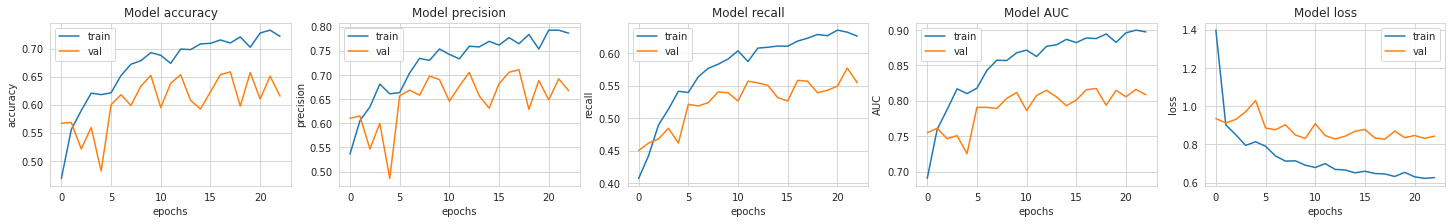

time: 3.55 s (started: 2023-03-25 02:07:57 +00:00)


In [70]:
# Show results and print graphs
results = model4.evaluate(X_test, y_test)
results = dict(zip(model4.metrics_names,results))

print(results)
plottingScores(H)

In [71]:
y_pred = model4.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 1s 14ms/step
time: 1.64 s (started: 2023-03-25 02:08:01 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.81      0.71       603
           1       0.59      0.41      0.49       600
           2       0.67      0.71      0.69       480

    accuracy                           0.64      1683
   macro avg       0.64      0.64      0.63      1683
weighted avg       0.63      0.64      0.63      1683

Confusion Matrix Chart:


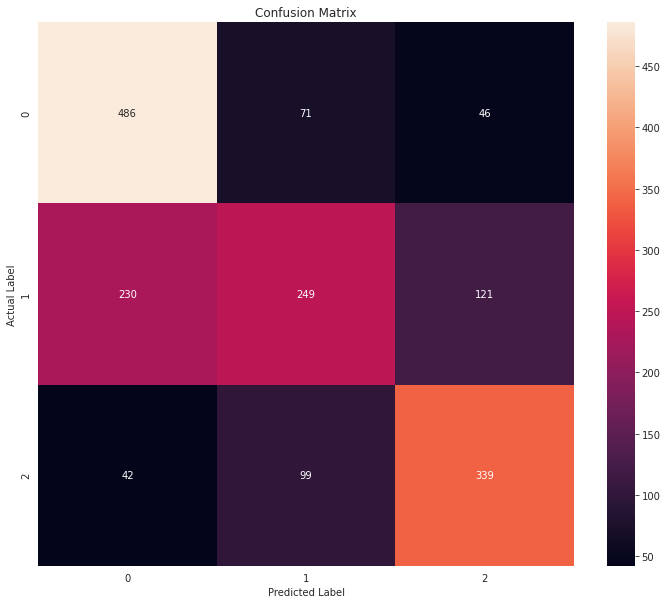

time: 584 ms (started: 2023-03-25 02:08:02 +00:00)


In [72]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [73]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model4.evaluate(X_train, y_train)
Test_Accuracy = model4.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-4: MobileNetV2', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 1s 16ms/step - loss: 0.7901 - accuracy: 0.6381 - precision: 0.6954 - recall: 0.5520 - AUC: 0.8265
time: 4.07 s (started: 2023-03-25 02:08:03 +00:00)


## Model-5: VGG16

In [74]:
# Function to create NN with transfer learning
def vgg16_model():
    model = tf.keras.Sequential([
        tf.keras.applications.VGG16(include_top = False, weights="imagenet", input_shape=(128, 128, 3)),
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(3, activation = 'softmax')])
    
    model.layers[0].trainable = False
    
    return model

time: 1.19 ms (started: 2023-03-25 02:08:07 +00:00)


In [75]:
# Build and compile the model
model5 = vgg16_model()
model5.summary()
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________
time: 4.19 s (started: 2023-03-25 02:08:07 +00:00)


In [76]:
H = model5.fit(X_train, y_train,  
                          epochs = 10, 
                          validation_split = 0.20, 
                          # class_weight = classWeight,
                          batch_size = 64,
                          callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler])
# t = 80min

Epoch 1/10
50/50 [==============================] - 12s 156ms/step - loss: 3.4869 - accuracy: 0.5436 - precision: 0.5900 - recall: 0.5459 - AUC: 0.7216 - val_loss: 1.8338 - val_accuracy: 0.6349 - val_precision: 0.6352 - val_recall: 0.6247 - val_AUC: 0.8009 - lr: 0.0100
Epoch 2/10
50/50 [==============================] - 5s 107ms/step - loss: 1.5981 - accuracy: 0.6274 - precision: 0.6292 - recall: 0.6210 - AUC: 0.7977 - val_loss: 1.4161 - val_accuracy: 0.6565 - val_precision: 0.6584 - val_recall: 0.6450 - val_AUC: 0.8161 - lr: 0.0089
Epoch 3/10
50/50 [==============================] - 5s 100ms/step - loss: 1.1366 - accuracy: 0.6535 - precision: 0.6597 - recall: 0.6471 - AUC: 0.8365 - val_loss: 2.1875 - val_accuracy: 0.5102 - val_precision: 0.5155 - val_recall: 0.5076 - val_AUC: 0.7167 - lr: 0.0079
Epoch 4/10
50/50 [==============================] - 5s 107ms/step - loss: 1.1974 - accuracy: 0.6535 - precision: 0.6579 - recall: 0.6481 - AUC: 0.8350 - val_loss: 1.4233 - val_accuracy: 0.6120

53/53 [==============================] - 5s 61ms/step - loss: 1.0582 - accuracy: 0.6447 - precision: 0.6538 - recall: 0.6352 - AUC: 0.8298
{'loss': 1.0582020282745361, 'accuracy': 0.6446821093559265, 'precision': 0.6538226008415222, 'recall': 0.6351752877235413, 'AUC': 0.8298393487930298}


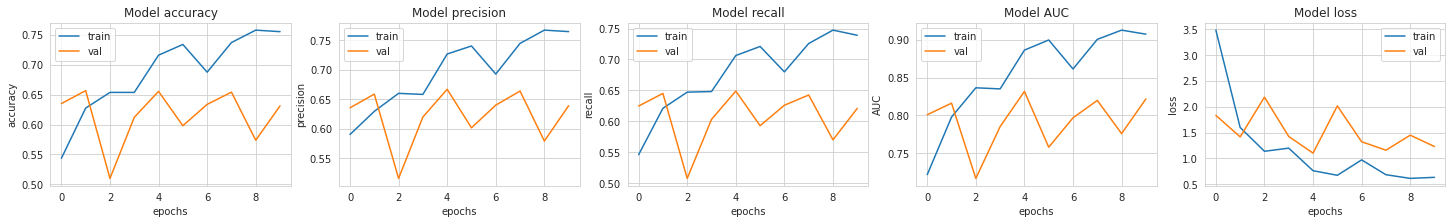

time: 31.5 s (started: 2023-03-25 02:09:10 +00:00)


In [77]:
# Show results and print graphs
results = model5.evaluate(X_test, y_test)
results = dict(zip(model5.metrics_names,results))

print(results)
plottingScores(H)

In [78]:
y_pred = model5.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 2s 40ms/step
time: 2.84 s (started: 2023-03-25 02:09:42 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68       603
           1       0.56      0.47      0.51       600
           2       0.69      0.80      0.74       480

    accuracy                           0.64      1683
   macro avg       0.64      0.65      0.64      1683
weighted avg       0.64      0.64      0.64      1683

Confusion Matrix Chart:


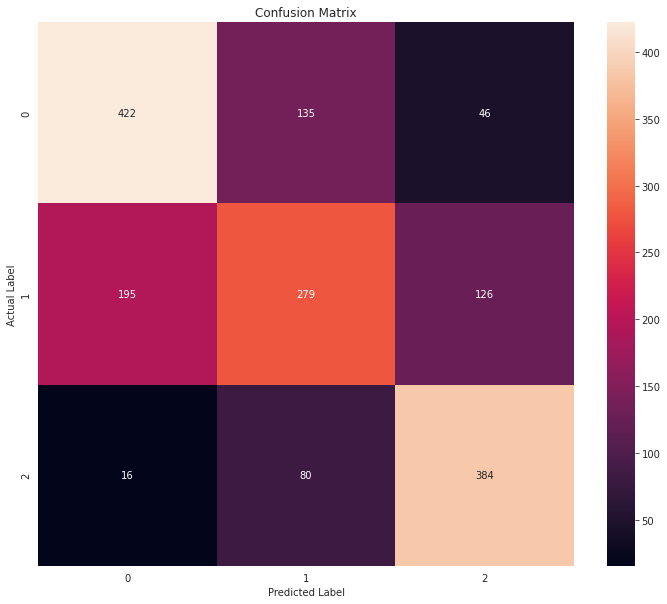

time: 461 ms (started: 2023-03-25 02:09:44 +00:00)


In [79]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [80]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model5.evaluate(X_train, y_train)
Test_Accuracy = model5.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-5: VGG16', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 2s 41ms/step - loss: 1.0582 - accuracy: 0.6447 - precision: 0.6538 - recall: 0.6352 - AUC: 0.8298
time: 9.12 s (started: 2023-03-25 02:09:45 +00:00)


## Model-6: ResNet50

In [81]:
# Function to create NN with transfer learning
def resnet50_model():
    model = tf.keras.Sequential([
        tf.keras.applications.ResNet50(include_top = False, weights="imagenet", input_shape=(128, 128, 3)),
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(3, activation = 'softmax')])
    
    model.layers[0].trainable = False
    
    return model

time: 984 µs (started: 2023-03-25 02:09:54 +00:00)


In [82]:
# Build and compile the model
model6 = resnet50_model()
model6.summary()
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________
time: 6.72 s (started: 2023-03-25 02:09:54 +00:00)


In [83]:
H = model6.fit(X_train, y_train,  
                          epochs = 10, 
                          validation_split = 0.20, 
                          # class_weight = classWeight,
                          batch_size = 64,
                          callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler])

Epoch 1/10
50/50 [==============================] - 10s 127ms/step - loss: 2.6552 - accuracy: 0.5354 - precision: 0.5784 - recall: 0.5660 - AUC: 0.7512 - val_loss: 1.0427 - val_accuracy: 0.6361 - val_precision: 0.6419 - val_recall: 0.6158 - val_AUC: 0.8194 - lr: 0.0100
Epoch 2/10
50/50 [==============================] - 4s 82ms/step - loss: 0.8501 - accuracy: 0.6809 - precision: 0.6911 - recall: 0.6640 - AUC: 0.8532 - val_loss: 1.1066 - val_accuracy: 0.6412 - val_precision: 0.6551 - val_recall: 0.6260 - val_AUC: 0.8166 - lr: 0.0089
Epoch 3/10
50/50 [==============================] - 5s 93ms/step - loss: 0.8175 - accuracy: 0.6748 - precision: 0.6856 - recall: 0.6624 - AUC: 0.8605 - val_loss: 0.8326 - val_accuracy: 0.7010 - val_precision: 0.7120 - val_recall: 0.6794 - val_AUC: 0.8631 - lr: 0.0079
Epoch 4/10
50/50 [==============================] - 7s 140ms/step - loss: 0.5803 - accuracy: 0.7646 - precision: 0.7810 - recall: 0.7462 - AUC: 0.9130 - val_loss: 0.7398 - val_accuracy: 0.7226 -

53/53 [==============================] - 3s 43ms/step - loss: 0.6947 - accuracy: 0.6952 - precision: 0.7083 - recall: 0.6768 - AUC: 0.8793
{'loss': 0.6946563720703125, 'accuracy': 0.6951871514320374, 'precision': 0.7083333134651184, 'recall': 0.6767676472663879, 'AUC': 0.8792810440063477}


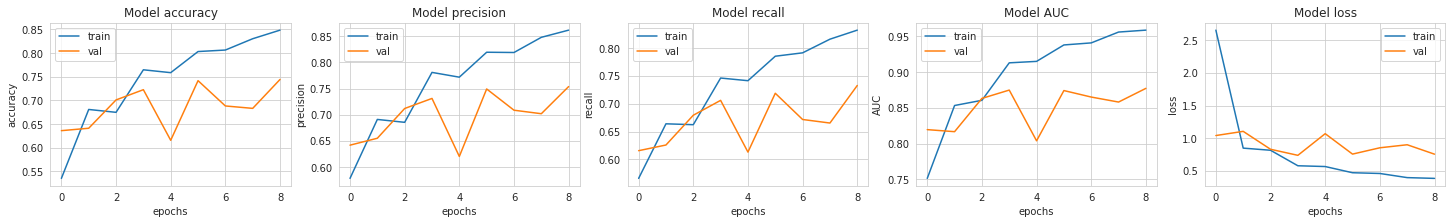

time: 5.44 s (started: 2023-03-25 02:10:49 +00:00)


In [84]:
# Show results and print graphs
results = model6.evaluate(X_test, y_test)
results = dict(zip(model6.metrics_names,results))

print(results)
plottingScores(H)

In [85]:
y_pred = model6.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 3s 32ms/step
time: 3.25 s (started: 2023-03-25 02:10:54 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       603
           1       0.59      0.64      0.62       600
           2       0.75      0.69      0.72       480

    accuracy                           0.70      1683
   macro avg       0.70      0.69      0.70      1683
weighted avg       0.70      0.70      0.70      1683

Confusion Matrix Chart:


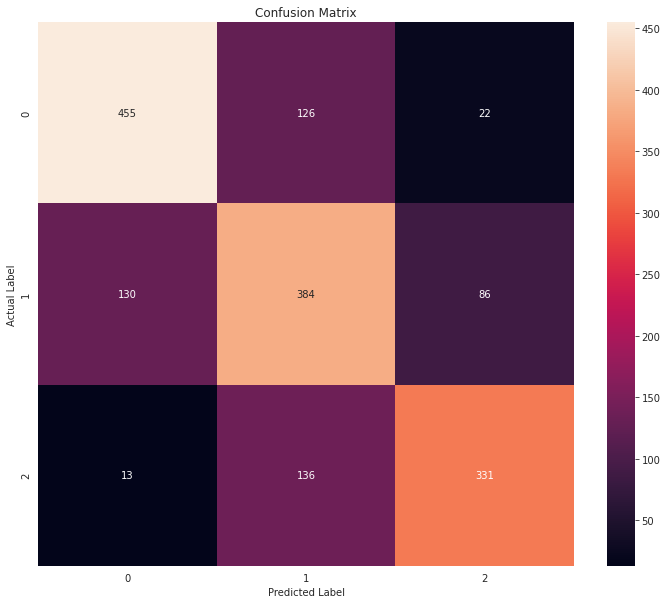

time: 331 ms (started: 2023-03-25 02:10:57 +00:00)


In [86]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [87]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model6.evaluate(X_train, y_train)
Test_Accuracy = model6.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-6: ResNet50', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 2s 35ms/step - loss: 0.6947 - accuracy: 0.6952 - precision: 0.7083 - recall: 0.6768 - AUC: 0.8793
time: 7.85 s (started: 2023-03-25 02:10:58 +00:00)


## Model-7: EfficientNetV2B3

In [88]:
# Function to create NN with transfer learning
def enetv2b3_model():
    model = tf.keras.Sequential([
        tf.keras.applications.EfficientNetV2B3(include_top = False, weights="imagenet", input_shape=(128, 128, 3)),
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(3, activation = 'softmax')])
    
    model.layers[0].trainable = False
    
    return model

time: 1.1 ms (started: 2023-03-25 02:11:06 +00:00)


In [89]:
# Build and compile the model
model7 = enetv2b3_model()
model7.summary()
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

52606240/52606240 [==============================] - 3s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b3 (Function  (None, 4, 4, 1536)       12930622  
 al)                                                             
                                                                 
 global_average_pooling2d_3   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 3)                 4611      
                                                                 
Total params: 12,935,233
Trainable params: 4,611
Non-trainable params: 12,930,622
_________________________________________________________________
time: 8.83 s (started: 2023-03-25 02:11:06 +00:00)


In [90]:
H = model7.fit(X_train, y_train,  
                          epochs = 10, 
                          validation_split = 0.20, 
                          # class_weight = classWeight,
                          batch_size = 64,
                          callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler])

Epoch 1/10
50/50 [==============================] - 21s 175ms/step - loss: 0.9627 - accuracy: 0.5761 - precision: 0.6403 - recall: 0.5847 - AUC: 0.8156 - val_loss: 0.8842 - val_accuracy: 0.6374 - val_precision: 0.6662 - val_recall: 0.5941 - val_AUC: 0.8146 - lr: 0.0100
Epoch 2/10
50/50 [==============================] - 6s 125ms/step - loss: 0.8006 - accuracy: 0.6401 - precision: 0.6625 - recall: 0.6057 - AUC: 0.8293 - val_loss: 0.7372 - val_accuracy: 0.6807 - val_precision: 0.7093 - val_recall: 0.6425 - val_AUC: 0.8570 - lr: 0.0089
Epoch 3/10
50/50 [==============================] - 4s 87ms/step - loss: 0.7405 - accuracy: 0.6736 - precision: 0.6988 - recall: 0.6369 - AUC: 0.8500 - val_loss: 0.8033 - val_accuracy: 0.6807 - val_precision: 0.6990 - val_recall: 0.6501 - val_AUC: 0.8494 - lr: 0.0079
Epoch 4/10
50/50 [==============================] - 4s 77ms/step - loss: 0.7226 - accuracy: 0.6748 - precision: 0.7007 - recall: 0.6398 - AUC: 0.8576 - val_loss: 0.7808 - val_accuracy: 0.6578 -

53/53 [==============================] - 3s 43ms/step - loss: 0.6793 - accuracy: 0.6934 - precision: 0.7138 - recall: 0.6684 - AUC: 0.8696
{'loss': 0.6793166995048523, 'accuracy': 0.6934046149253845, 'precision': 0.7138324975967407, 'recall': 0.6684492230415344, 'AUC': 0.8695988655090332}


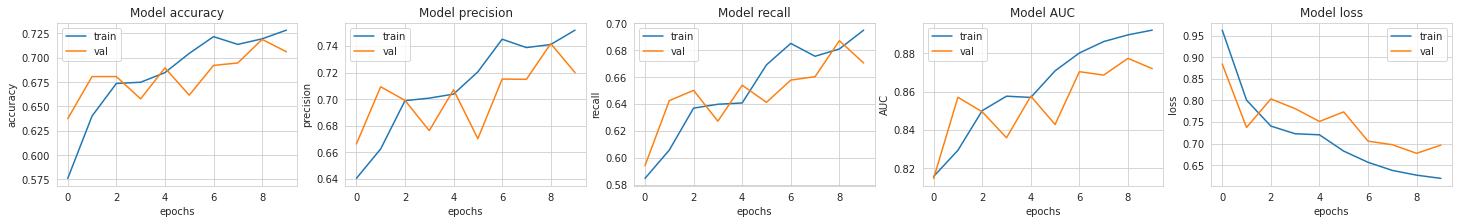

time: 6.88 s (started: 2023-03-25 02:12:20 +00:00)


In [91]:
# Show results and print graphs
results = model7.evaluate(X_test, y_test)
results = dict(zip(model7.metrics_names,results))

print(results)
plottingScores(H)

In [92]:
y_pred = model7.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 4s 35ms/step
time: 5.07 s (started: 2023-03-25 02:12:27 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       603
           1       0.61      0.58      0.60       600
           2       0.71      0.82      0.76       480

    accuracy                           0.69      1683
   macro avg       0.69      0.70      0.70      1683
weighted avg       0.69      0.69      0.69      1683

Confusion Matrix Chart:


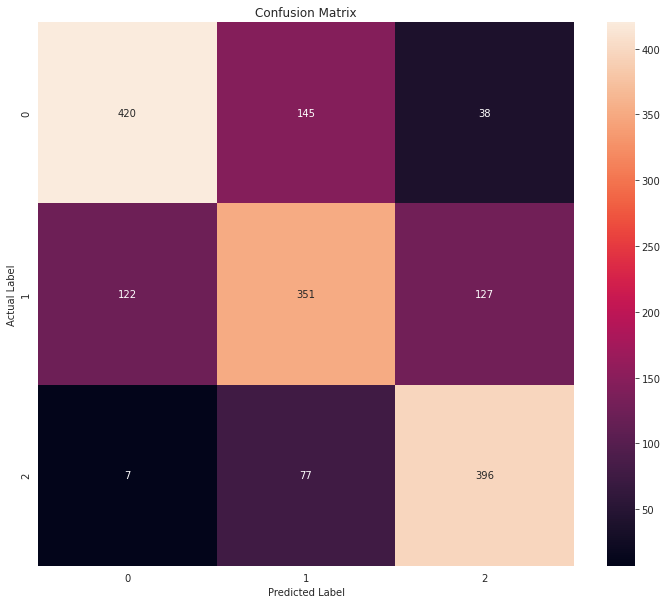

time: 500 ms (started: 2023-03-25 02:12:32 +00:00)


In [93]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [94]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model7.evaluate(X_train, y_train)
Test_Accuracy = model7.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-7: EfficientNetV2B3', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 2s 35ms/step - loss: 0.6793 - accuracy: 0.6934 - precision: 0.7138 - recall: 0.6684 - AUC: 0.8696
time: 8.29 s (started: 2023-03-25 02:12:32 +00:00)


## Model-8: CNN-1 (Tuned)
Hyperparameter tuning for Model-2: CNN-1

In [95]:
# # Function to create and compile model, required for KerasClassifier
def cnn_model(lr, batch_size):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding = 'valid', activation = 'relu', input_shape=(128, 128, 3)), # convolutional layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2)), # flatten output of conv
        
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding = 'valid', activation = 'relu'), # convolutional layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2)), # flatten output of conv
    tf.keras.layers.Dropout(0.3),
        
    tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'valid'),
    tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(), # flatten output of conv
    tf.keras.layers.Dense(512, activation = "relu"), # hidden layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation = "relu"), #  output layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = "softmax")])
    # compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=METRICS)  
    return model

time: 2.97 ms (started: 2023-03-25 02:12:41 +00:00)


In [96]:
# Create the model
model = KerasClassifier(build_fn = cnn_model, verbose=1)

# Grid search for batch size and learning rate
params = {'batch_size':[32, 64, 128],
          'lr':[0.01,0.1,0.001]}
          
# Grid search for batch size, learning rate, optimizers, activation, epochs, layers, neurons, etc.
# params = {'batch_size':[32, 64, 128],
#           'optimizers':['rmsprop', 'adam', 'SGD'],
#           'activation':['relu', 'sigmoid', 'tanh'],
#           'epochs':[50, 100, 150],
#           'lr':[0.01, 0.1, 0.001]}

gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, verbose=10, random_state=0) # For local machine n_jobs=2
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=32, lr=0.01......................................
25/25 [==============================] - 1s 7ms/step - loss: 5.3441 - accuracy: 0.3295 - precision: 0.3277 - recall: 0.3193 - AUC: 0.5259
[CV 1/5; 1/9] END .......batch_size=32, lr=0.01;, score=0.330 total time=   9.0s
[CV 2/5; 1/9] START batch_size=32, lr=0.01......................................
25/25 [==============================] - 1s 13ms/step - loss: 4.0210 - accuracy: 0.2981 - precision: 0.2978 - recall: 0.2955 - AUC: 0.5210
[CV 2/5; 1/9] END .......batch_size=32, lr=0.01;, score=0.298 total time=   8.0s
[CV 3/5; 1/9] START batch_size=32, lr=0.01......................................
25/25 [==============================] - 1s 8ms/step - loss: 2.5138 - accuracy: 0.4166 - precision: 0.4223 - recall: 0.3809 - AUC: 0.6022
[CV 3/5; 1/9] END .......batch_size=32, lr=0.01;, score=0.417 total time=   7.9s
[CV 4/5; 1/9] START batch_size=32, lr=0

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f93ac686790>,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'lr': [0.01, 0.1, 0.001]},
                   random_state=0, verbose=10)

time: 6min 24s (started: 2023-03-25 02:12:41 +00:00)


In [97]:
# Summarize the results in a dataframe
pd.DataFrame({'param': gs.cv_results_["params"], 
              'score mean': gs.cv_results_["mean_test_score"], 
              'score s.d.': gs.cv_results_["std_test_score"],
              'rank': gs.cv_results_["rank_test_score"]})

param  score mean  score s.d.  rank
0    {'lr': 0.01, 'batch_size': 32}    0.345649    0.044398     7
1     {'lr': 0.1, 'batch_size': 32}    0.392778    0.080756     2
2   {'lr': 0.001, 'batch_size': 32}    0.413139    0.053356     1
3    {'lr': 0.01, 'batch_size': 64}    0.348193    0.045510     6
4     {'lr': 0.1, 'batch_size': 64}    0.348696    0.045456     5
5   {'lr': 0.001, 'batch_size': 64}    0.384896    0.061763     3
6   {'lr': 0.01, 'batch_size': 128}    0.306402    0.039810     9
7    {'lr': 0.1, 'batch_size': 128}    0.315597    0.036713     8
8  {'lr': 0.001, 'batch_size': 128}    0.364221    0.075290     4

time: 20.9 ms (started: 2023-03-25 02:19:05 +00:00)


In [98]:
# Select the best parameters
print('Best Parameters:', gs.best_params_, 'mean score: ', gs.best_score_, sep='\n')

Best Parameters:
{'lr': 0.001, 'batch_size': 32}
mean score: 
0.4131394922733307
time: 4.24 ms (started: 2023-03-25 02:19:05 +00:00)


In [99]:
# Build and compile the model with best params
model8 = cnn_model(lr = gs.best_params_['lr'], batch_size = gs.best_params_['batch_size']) #Change this with best params
model8.summary()

opt = tf.keras.optimizers.Adam(gs.best_params_['lr'])
model8.compile(optimizer=opt, loss="categorical_crossentropy", metrics=METRICS)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_193 (Conv2D)         (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 30, 30, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_191 (Dropout)       (None, 30, 30, 32)        0         
                                                                 
 conv2d_194 (Conv2D)         (None, 28, 28, 64)      

In [100]:
# Fit the model
H = model8.fit(X_train, y_train,  
                      epochs=30, 
                      validation_split = 0.20, 
                      batch_size=gs.best_params_['batch_size'], # Change this with best params
                      # class_weight=classWeight,
                      callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
                      verbose=1)

Epoch 1/30
99/99 [==============================] - 9s 33ms/step - loss: 1.1766 - accuracy: 0.4854 - precision: 0.4868 - recall: 0.4173 - AUC: 0.6489 - val_loss: 7.7043 - val_accuracy: 0.3422 - val_precision: 0.3422 - val_recall: 0.3422 - val_AUC: 0.5109 - lr: 0.0100
Epoch 2/30
99/99 [==============================] - 3s 26ms/step - loss: 0.9738 - accuracy: 0.5366 - precision: 0.5631 - recall: 0.4166 - AUC: 0.7270 - val_loss: 1.3918 - val_accuracy: 0.4275 - val_precision: 0.4489 - val_recall: 0.3524 - val_AUC: 0.6388 - lr: 0.0089
Epoch 3/30
99/99 [==============================] - 3s 26ms/step - loss: 0.9381 - accuracy: 0.5398 - precision: 0.5725 - recall: 0.4197 - AUC: 0.7418 - val_loss: 0.9466 - val_accuracy: 0.5445 - val_precision: 0.5963 - val_recall: 0.4453 - val_AUC: 0.7465 - lr: 0.0079
Epoch 4/30
99/99 [==============================] - 3s 27ms/step - loss: 0.9113 - accuracy: 0.5519 - precision: 0.5899 - recall: 0.4261 - AUC: 0.7530 - val_loss: 0.9764 - val_accuracy: 0.5407 - va

53/53 [==============================] - 0s 7ms/step - loss: 0.7808 - accuracy: 0.6423 - precision: 0.6856 - recall: 0.5235 - AUC: 0.8277
{'loss': 0.780842661857605, 'accuracy': 0.6423054337501526, 'precision': 0.685603141784668, 'recall': 0.5234699845314026, 'AUC': 0.8276516795158386}


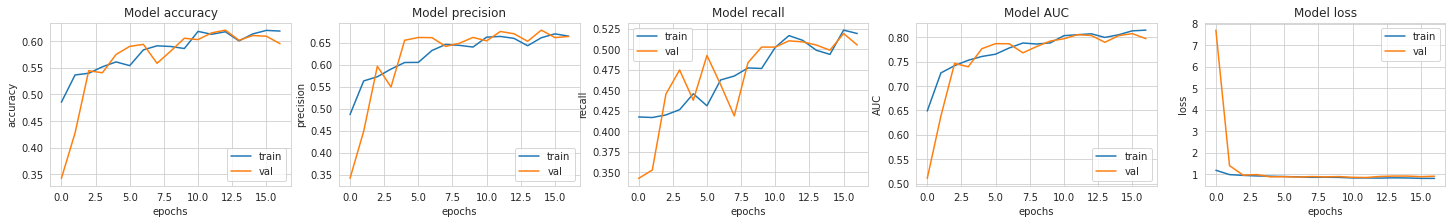

time: 3.04 s (started: 2023-03-25 02:20:03 +00:00)


In [101]:
# Evaluate the model results and put into a dict
results = model8.evaluate(X_test, y_test)
results = dict(zip(model8.metrics_names,results))

print(results)
plottingScores(H)

In [102]:
y_pred = model8.predict(X_test)
# y_pred = np.array([0 if proba < 0.5 else 1 for proba in y_pred_proba])

53/53 [==============================] - 1s 6ms/step
time: 1.07 s (started: 2023-03-25 02:20:06 +00:00)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       603
           1       0.53      0.50      0.52       600
           2       0.73      0.66      0.69       480

    accuracy                           0.64      1683
   macro avg       0.65      0.64      0.64      1683
weighted avg       0.64      0.64      0.64      1683

Confusion Matrix Chart:


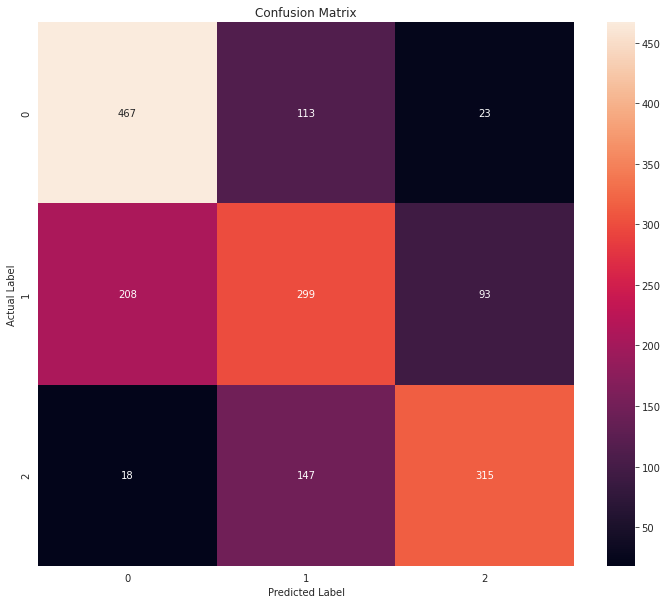

time: 497 ms (started: 2023-03-25 02:20:07 +00:00)


In [103]:
# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1', '2']],  
                         columns = [i for i in ['0', '1', '2']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [104]:
# Model comparison
precision = precision_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
recall = recall_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
f1 = f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1), average='macro')
AUC = results['AUC']

Train_Accuracy = model8.evaluate(X_train, y_train)
Test_Accuracy = model8.evaluate(X_test, y_test)

# base_1 = []
base_1.append(['Model-8: CNN-1 (Tuned)', Train_Accuracy[1], Test_Accuracy[1], precision, recall, f1, AUC])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

53/53 [==============================] - 0s 7ms/step - loss: 0.7808 - accuracy: 0.6423 - precision: 0.6856 - recall: 0.5235 - AUC: 0.8277
time: 2.05 s (started: 2023-03-25 02:20:08 +00:00)


## Model Comparison - Classification

In [105]:
# Sumarize the results of modeling in a dataframe; Datapoints used = 3000; Epochs = 10/20; ADJUSTED_IMAGE_SIZE = 128
model_comparison

Model  Train Accuracy  Test Accuracy  Precision  \
6  Model-7: EfficientNetV2B3        0.772542       0.693405   0.694492   
5          Model-6: ResNet50        0.799032       0.695187   0.703094   
4             Model-5: VGG16        0.739175       0.644682   0.640697   
1             Model-2: CNN-1        0.653846       0.647059   0.646612   
7     Model-8: CNN-1 (Tuned)        0.649007       0.642305   0.646541   
3       Model-4: MobileNetV2        0.709628       0.638146   0.635131   
0        Model-1: Base Model        0.726439       0.632799   0.653712   
2             Model-3: CNN-2        0.609272       0.612597   0.615194   

     Recall  F1 Score       AUC  
6  0.702172  0.696146  0.869599  
5  0.694715  0.698141  0.879281  
4  0.654945  0.644738  0.829839  
1  0.650587  0.642724  0.827212  
7  0.643015  0.642730  0.827652  
3  0.642407  0.630174  0.826473  
0  0.623473  0.628346  0.745432  
2  0.611098  0.611342  0.800113

time: 9.12 ms (started: 2023-03-25 02:20:10 +00:00)


Evaluation metrics allow us to estimate errors to determine how well our models are performing:
- Accuracy: ratio of correct predictions over total predictions.
- Precision: how often the classifier is correct when it predicts positive.
- Recall: how often the classifier is correct for all positive instances.
- F-Score: single measurement to combine precision and recall.

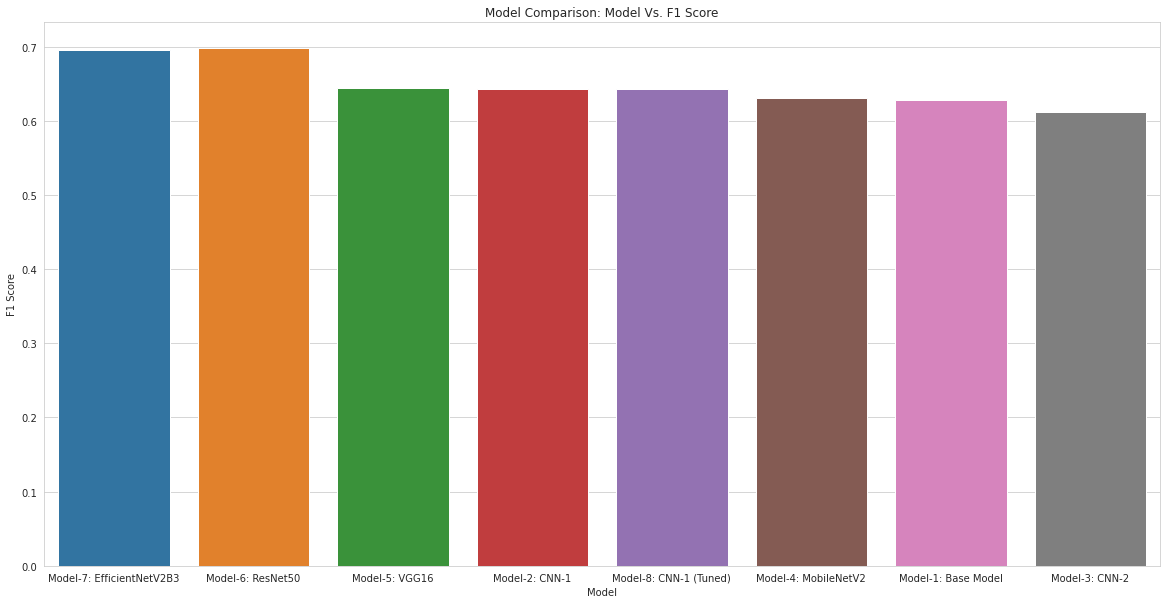

time: 316 ms (started: 2023-03-25 02:20:10 +00:00)


In [106]:
# Bar graph for Model Vs. F1 Score
plt.figure(figsize=(20,10))
sns.barplot(data=model_comparison, x="Model", y="F1 Score")
plt.title("Model Comparison: Model Vs. F1 Score")
plt.show()

Text(0, 0.5, 'Metrics')

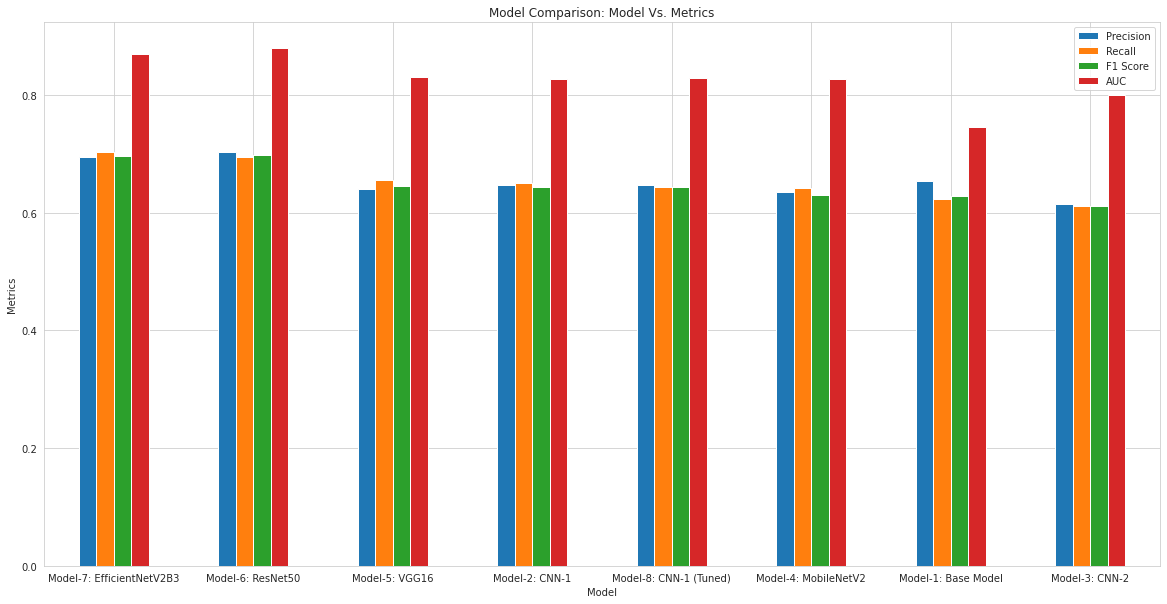

time: 461 ms (started: 2023-03-25 02:20:10 +00:00)


In [107]:
# Bar graph for Model Vs. Metrics
model_comparison[['Model', 'Precision', 'Recall', 'F1 Score', 'AUC']].plot(kind='bar', x = 'Model', rot = 0, sort_columns = 'Model', figsize=(20,10))
plt.title("Model Comparison: Model Vs. Metrics")
plt.xlabel("Model")
plt.ylabel("Metrics")

## MODELING: OBJECT DETECTION
Model selection was a challenge as both localization and classification was needed into one model. We did some experimentation with Faster R-CNN architecture. After spending sometime on that we realized that for semantic segmentation (binary classification) U-Net is  better and simpler than Faster R-CNN. We found that U-Net is also widely used in medical applications and AI models. Hence we switched to the U-Net. Facing errors while importing the Matterplot/Mask_RCNN package.

Due to lack of time, we could not try RCNN, Yolo and CheXNet. But for our learning purpose, we would like to try them after completing this project.

https://paperswithcode.com/method/chexnet

## 1. Prepare the data.

In [133]:
# File paths from the G Drive
trainImagesPath = "stage_2_train_images"
testImagesPath = "stage_2_test_images"

labelsPath = "stage_2_train_labels.csv"
classInfoPath = "stage_2_detailed_class_info.csv"

# Read the labels and classinfo
labels = pd.read_csv(labelsPath)
details = pd.read_csv(classInfoPath)

time: 75.4 ms (started: 2023-03-25 02:37:26 +00:00)


In [134]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
time: 31.2 ms (started: 2023-03-25 02:37:27 +00:00)


In [135]:
labels.sample(10)

patientId      x      y  width  height  \
15386  966db49a-1aa9-4d43-bedd-f2f58e08ceee    NaN    NaN    NaN     NaN   
26908  ef7c58ec-8b59-4406-952e-9d54c34e6276  693.0  585.0  209.0   156.0   
4780   415419bd-51a7-4708-8cb9-1adcba6921b1  571.0  599.0  185.0   214.0   
18346  ad4d16e5-a851-4327-b9fe-5977da445669  189.0  513.0  190.0   286.0   
8033   5c0e0efc-38f9-4335-8283-77502ffd5738  285.0  484.0  125.0   254.0   
23462  d346540b-05a3-43f3-9d55-858aaa915c22    NaN    NaN    NaN     NaN   
20236  b9f8516d-e115-4f48-a43f-79d4ba74840e    NaN    NaN    NaN     NaN   
13893  8aaaa6ce-64d0-4a03-a01e-0db5007ad818    NaN    NaN    NaN     NaN   
4386   3e9e02d2-673c-4a8d-bdfe-35515693ce1f    NaN    NaN    NaN     NaN   
24404  db5399f8-e0cb-4208-8694-a7136f9ac574  378.0  310.0  111.0   130.0   

       Target  
15386       0  
26908       1  
4780        1  
18346       1  
8033        1  
23462       0  
20236       0  
13893       0  
4386        0  
24404       1

time: 23.7 ms (started: 2023-03-25 02:37:27 +00:00)


In [136]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB
time: 24.8 ms (started: 2023-03-25 02:37:27 +00:00)


In [137]:
details.sample(10)

patientId                         class
14261  8d7363fb-fb76-4052-855c-913cc592b5b1  No Lung Opacity / Not Normal
17240  a51d69b5-64a1-4fbb-a7f1-7f8a4e1fc953  No Lung Opacity / Not Normal
14871  92307af5-1f76-473f-beb1-45d94fe66a7c  No Lung Opacity / Not Normal
1157   0e0cfa1a-c097-47bb-bf4b-6b9362940705                  Lung Opacity
589    08d8e57a-4835-445b-8c79-8dd31ab17819                  Lung Opacity
26170  e9d01262-68be-48c0-b278-3ada6fae8933  No Lung Opacity / Not Normal
24103  d8ba6755-6d47-4c47-875a-a6aa0c55e3bf  No Lung Opacity / Not Normal
27029  f06b985f-1424-44e3-9c57-530a93012786  No Lung Opacity / Not Normal
18488  ae505ed5-51b5-44f7-8145-6cfe7785b756  No Lung Opacity / Not Normal
6810   51e7f8d7-2904-4651-a3e3-be6e8d351cfc  No Lung Opacity / Not Normal

time: 8.2 ms (started: 2023-03-25 02:37:27 +00:00)


In [138]:
# Concatenate the two datasets - 'labels' and 'details':
train_data = pd.concat([labels, details['class']], axis = 1)

train_data.head()

patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity

time: 17.4 ms (started: 2023-03-25 02:37:27 +00:00)


In [139]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB
time: 20.3 ms (started: 2023-03-25 02:37:28 +00:00)


In [140]:
# Use the 2000 datapoints for training and 2000 for testing
# Use full datasets later
traind = train_data[0:2000]
testd = train_data[2000:4000]

traind.fillna(0, inplace=True)
testd.fillna(0, inplace=True)

time: 4.7 ms (started: 2023-03-25 02:37:28 +00:00)


In [141]:
# Check the distribution of the Target variable
traind.Target.value_counts()

0    1143
1     857
Name: Target, dtype: int64

time: 3.84 ms (started: 2023-03-25 02:37:28 +00:00)


In [142]:
# Check the distribution of the Target variable
testd.Target.value_counts()

1    1065
0     935
Name: Target, dtype: int64

time: 5.05 ms (started: 2023-03-25 02:37:28 +00:00)


Define Generator class: This class handles large dataset. By creating batches, the resource usage is minimised. This generator class returns both souce image and masked image. Masked images are generated using the bounderies present in the label file.

In [143]:
# Keras data generator class; Refer the below articles for details:
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
# https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

# Manage the memory by reducing the batch size; 8, 10, 16, 32, 64
BATCH_SIZE = 6
# Image size to be scaled; 128 × 128, 224 x 224, 256 × 256, and 512 × 512
IMAGE_SIZE = 224

# Actual Image size 
IMG_WIDTH = 1024
IMG_HEIGHT = 1024

class TrainGenerator(Sequence):

    def __init__(self,  _labels):       
        self.pids = _labels["patientId"].to_numpy()
        self.coords = _labels[["x", "y", "width", "height"]].to_numpy()
        self.coords = self.coords * IMAGE_SIZE / IMG_WIDTH        

    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)

    """
    The contrast of an image is enhanced when various shades in the image becomes more distinct.
    We can do so by darkening the shades of the darker pixels and vice versa. 
    This is equivalent to widening the range of pixel intensities. To have a good contrast, 
    the following histogram characteristics are desirable:

    1) the pixel intensities are uniformly distributed across the full range of values (each intensity value is equally probable), and
    2) the cumulative histogram is increasing linearly across the full intensity range.

    Histogram equalization modifies the distribution of pixel intensities to achieve these characteristics.
    """
    def __doHistogramEqualization(self,img):
        # Pre processing Histogram equalization
        histogram_array = np.bincount(img.flatten(), minlength=256)
        # Normalize
        num_pixels = np.sum(histogram_array)
        histogram_array = histogram_array/num_pixels
        # Normalized cumulative histogram
        chistogram_array = np.cumsum(histogram_array)
        """
        STEP 2: Pixel mapping lookup table
        """
        transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
        """
        STEP 3: Transformation
        """
        img_list = list(img.flatten())

        # Transform pixel values to equalize
        eq_img_list = [transform_map[p] for p in img_list]

        # Reshape and write back into img_array
        img = np.reshape(np.asarray(eq_img_list), img.shape)

        return img

    def __getitem__(self, idx): # Get a batch
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image coords
        batch_pids = self.pids[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image pids    
        batch_images = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        batch_masks = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE))
        for _indx, _pid in enumerate(batch_pids):
            _path = 'stage_2_train_images/'+'{}.dcm'.format(_pid)
            _imgData = dcm.read_file(_path)

            img = _imgData.pixel_array 
            # img = np.stack((img,)*3, axis=-1) # Expand grayscale image to contain 3 channels

            # Resize image
            resized_img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE), interpolation = cv2.INTER_AREA)
            
            resized_img = self.__doHistogramEqualization(resized_img)
        
            batch_images[_indx][:,:,0] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32)) 
            batch_images[_indx][:,:,1] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32)) 
            batch_images[_indx][:,:,2] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32)) 
            x = int(batch_coords[_indx, 0])
            y = int(batch_coords[_indx, 1])
            width = int(batch_coords[_indx, 2])
            height = int(batch_coords[_indx, 3])
            
            batch_masks[_indx][y:y+height, x:x+width] = 1

        return batch_images, batch_masks

time: 5.74 ms (started: 2023-03-25 02:37:28 +00:00)


In [144]:
traind = TrainGenerator(traind)
testd = TrainGenerator(testd)

time: 4.66 ms (started: 2023-03-25 02:37:28 +00:00)


In [145]:
# Function to show the images with mask
def showMaskedImage(_imageSet, _maskSet, _index) :
    maskImage = _imageSet[_index]

    maskImage[:,:,0] = _maskSet[_index] * _imageSet[_index][:,:,0]
    maskImage[:,:,1] = _maskSet[_index] * _imageSet[_index][:,:,1]
    maskImage[:,:,2] = _maskSet[_index] * _imageSet[_index][:,:,2]

    plt.imshow(maskImage[:,:,0])

time: 1.61 ms (started: 2023-03-25 02:37:28 +00:00)


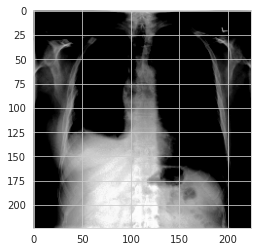

time: 500 ms (started: 2023-03-25 02:37:28 +00:00)


In [146]:
# Sample pre-processed image from the TrainGenerator class
imageSet0 = traind[1][0][1]
plt.imshow(imageSet0)

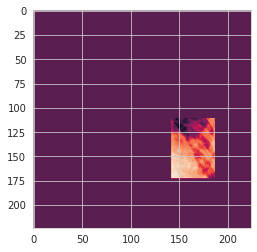

time: 558 ms (started: 2023-03-25 02:37:28 +00:00)


In [147]:
# Masks for the same
imageSet0 = traind[2][0]
maskSet0 = traind[2][1]    
showMaskedImage(imageSet0, maskSet0, 5)

## Performance Metrics

**Dice Coefficient (F1 Score) and IoU:**

Simply put, the Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images.

The Dice coefficient is very similar to the IoU. They are positively correlated, meaning if one says model A is better than model B at segmenting an image, then the other will say the same. Like the IoU, they both range from 0 to 1, with 1 signifying the greatest similarity between predicted and truth.

Intersection-Over-Union (IoU, Jaccard Index): The Intersection-Over-Union (IoU), also known as the Jaccard Index, is one of the most commonly used metrics in semantic segmentation. The IoU is a very straightforward metric that’s extremely effective.

In conclusion, the most commonly used metrics for semantic segmentation are the IoU and the Dice Coefficient.

In [148]:
# Function to calculate the Dice Coef.
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + tf.keras.backend.epsilon()) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + tf.keras.backend.epsilon())

# Dice Loss
def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

# # IoU Coef; Use the Keras metrics for MeanIoU
# def iou_coef(y_true, y_pred, smooth=1):
#   intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
#   union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
#   iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
#   return iou

# F1 Score: Taken from old keras source code
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

time: 1.82 ms (started: 2023-03-25 02:37:29 +00:00)


In [149]:
# Function to plot the various metrics across the epochs
"""
@Description: This function plots our metrics for our models across epochs
@Inputs: The history of the fitted model
@Output: Plots for accuracy, precision, recall, AUC, and loss
"""
def plottingScores(hist):
    fig, ax = plt.subplots(1, 8, figsize=(30, 4))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'precision', 'recall', 'f1_score', 'AUC', 'loss', 'dice_coef', 'mean_iou']):
        ax[i].plot(hist.history[met])
        ax[i].plot(hist.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

time: 1.26 ms (started: 2023-03-25 02:37:29 +00:00)


In [150]:
# Metrics to evaluate the model
METRICS = ['accuracy', 
           tf.keras.metrics.Precision(name='precision'), 
           tf.keras.metrics.Recall(name='recall'), 
           f1_score,
           tf.keras.metrics.AUC(name='AUC'),
           dice_coef,
           tf.keras.metrics.MeanIoU(num_classes=2, name='mean_iou')]

time: 18.6 ms (started: 2023-03-25 02:37:29 +00:00)


In [151]:
# Define the callback, checkpoint and early_stopping
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("unet_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

time: 1.13 ms (started: 2023-03-25 02:37:29 +00:00)


## Model-9: UNet (MobileNet)

In [152]:
LR = 1e-4
ALPHA = 1.0

# Define the UNet with MobileNet
def create_unet_mobilenet(trainable=True):
    """Function to create UNet architecture with MobileNet.
        
    Arguments:
        trainable -- Flag to make layers trainable. Default value is 'True'.
    """
    # Get all layers with 'imagenet' weights
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA, weights="imagenet") 
    # Top layer is last layer of the model
    
    # Make all layers trainable
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    convLayer_112by112 = model.get_layer("conv_pw_1_relu").output
    convLayer_56by56 = model.get_layer("conv_pw_3_relu").output
    convLayer_28by28 = model.get_layer("conv_pw_5_relu").output
    convLayer_14by14 = model.get_layer("conv_pw_11_relu").output
    convLayer_7by7 = model.get_layer("conv_pw_13_relu").output
    # The last layer of mobilenet model is of dimensions (7x7x1024)

    # Start upsampling from 7x7 to 14x14 ...up to 224x224 to form UNET
    # concatinate with the original image layer of the same size from MobileNet
    x = Concatenate()([UpSampling2D()(convLayer_7by7), convLayer_14by14])
    x = Concatenate()([UpSampling2D()(x), convLayer_28by28])
    x = Concatenate()([UpSampling2D()(x), convLayer_56by56])
    x = Concatenate()([UpSampling2D()(x), convLayer_112by112])
    x = UpSampling2D(name="unet_last")(x) # upsample to 224x224

    # Add classification layer
    x = Conv2D(1, kernel_size=1, activation="sigmoid", name="masks")(x)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x) 
    
    return Model(inputs=model.input, outputs=x)

time: 2.02 ms (started: 2023-03-25 02:37:29 +00:00)


In [153]:
# Build the model 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
model9 = create_unet_mobilenet(input_shape)
model9.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [154]:
model9.compile(optimizer="adam", loss = dice_loss, metrics=METRICS)

time: 38.3 ms (started: 2023-03-25 02:37:30 +00:00)


In [155]:
# Fit the model
train_steps = len(traind)//BATCH_SIZE
valid_steps = len(testd)//BATCH_SIZE

if len(traind) % BATCH_SIZE != 0:
    train_steps += 1
if len(testd) % BATCH_SIZE != 0:
    valid_steps += 1


H = model9.fit(traind, epochs=20,
                        steps_per_epoch=train_steps,
                        validation_data=testd,
                        callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler],
                        use_multiprocessing=True,
                        workers=4,
                        validation_steps=valid_steps,                      
                        shuffle=True)
                        # class_weight = classWeight; Not supported for 3+ Dimensions

Epoch 1/20
56/56 [==============================] - 57s 683ms/step - loss: 0.8732 - accuracy: 0.0109 - precision: 0.0840 - recall: 0.3957 - f1_score: 0.1269 - AUC: 0.6380 - dice_coef: 0.1268 - mean_iou: 0.4824 - val_loss: 0.8929 - val_accuracy: 0.8940 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_AUC: 0.5000 - val_dice_coef: 0.1071 - val_mean_iou: 0.4902 - lr: 0.0100
Epoch 2/20
56/56 [==============================] - 36s 623ms/step - loss: 0.8298 - accuracy: 0.0022 - precision: 0.1244 - recall: 0.3371 - f1_score: 0.1701 - AUC: 0.6217 - dice_coef: 0.1702 - mean_iou: 0.4966 - val_loss: 0.9792 - val_accuracy: 0.6927 - val_precision: 0.0187 - val_recall: 0.0069 - val_f1_score: 0.0029 - val_AUC: 0.4988 - val_dice_coef: 0.0208 - val_mean_iou: 0.4911 - lr: 0.0089
Epoch 3/20
56/56 [==============================] - 37s 653ms/step - loss: 0.8739 - accuracy: 0.0051 - precision: 0.1156 - recall: 0.2182 - f1_score: 0.1260 - AUC: 0.5828 - dice_coef: 0.1261 -

334/334 [==============================] - 745s 2s/step - loss: 0.7171 - accuracy: 0.0242 - precision: 0.2189 - recall: 0.6026 - f1_score: 0.2832 - AUC: 0.7675 - dice_coef: 0.2832 - mean_iou: 0.5569
{'loss': 0.7170584797859192, 'accuracy': 0.02421874925494194, 'precision': 0.21888083219528198, 'recall': 0.6025741100311279, 'f1_score': 0.2832229733467102, 'AUC': 0.7675365209579468, 'dice_coef': 0.2832002341747284, 'mean_iou': 0.5568951964378357}


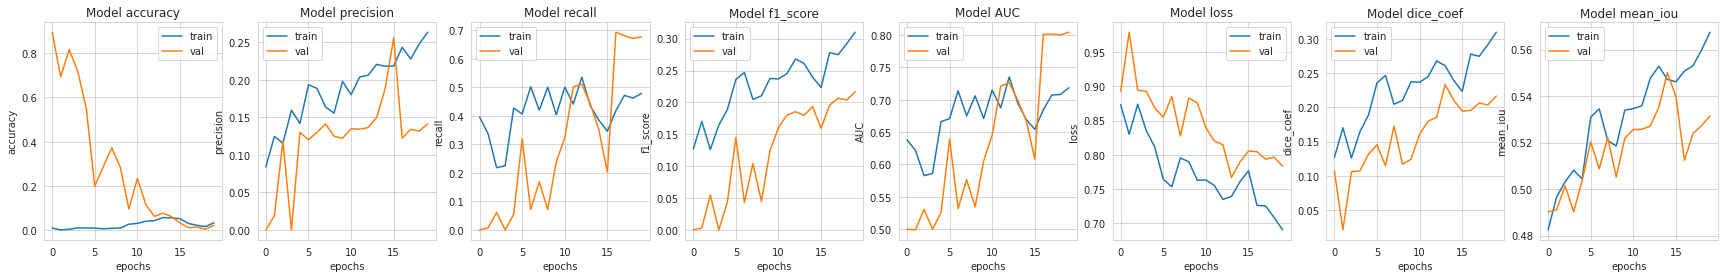

time: 13min 24s (started: 2023-03-25 02:51:07 +00:00)


In [156]:
# Evaluate and display results
results = model9.evaluate(testd) # Evaluate the model on test data
results = dict(zip(model9.metrics_names, results))

print(results)
plottingScores(H)

In [157]:
# Prepare the test data: Use random 20 images
testd1 = train_data[15000:15020]
testd1.fillna(0, inplace=True)

time: 2.58 ms (started: 2023-03-25 03:04:31 +00:00)


In [158]:
# Check target distrubution in test dataset (Equal distribution)
testd1.Target.value_counts()

0    10
1    10
Name: Target, dtype: int64

time: 6.57 ms (started: 2023-03-25 03:04:31 +00:00)


In [159]:
# Set the TrainGenerator for test data
testd1_datagen = TrainGenerator(testd1)

time: 3.58 ms (started: 2023-03-25 03:04:31 +00:00)


In [160]:
# Evaluate the model
test_steps = (len(testd1_datagen)//BATCH_SIZE)
if len(testd1_datagen) % BATCH_SIZE != 0:
    test_steps += 1

model9.evaluate(testd1_datagen)

4/4 [==============================] - 8s 3s/step - loss: 0.5486 - accuracy: 0.0263 - precision: 0.3695 - recall: 0.6399 - f1_score: 0.4095 - AUC: 0.7912 - dice_coef: 0.4097 - mean_iou: 0.6077


[0.5485594868659973,
 0.02633928507566452,
 0.36953845620155334,
 0.6398786306381226,
 0.4095156788825989,
 0.7912121415138245,
 0.40973907709121704,
 0.6076915264129639]

time: 13.3 s (started: 2023-03-25 03:04:31 +00:00)


In [161]:
# Prdict the test data that we have
pred_mask = model9.predict(testd1_datagen)

testd1 = testd1.reset_index()

4/4 [==============================] - 1s 161ms/step
time: 1.37 s (started: 2023-03-25 03:04:45 +00:00)


In [162]:
# Calculate the y_test, y_pred, tmpImages, tmpMask, originalMask

y_pred = []
y_test = []
imageList = []
predMaskTemp = []
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

def getPredictions(testd1):
    masks = np.zeros((int(testd1.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

    for index, row in testd1.iterrows():
        patientId = row.patientId
        # print(patientId)

        classlabel = row["Target"]
        dcm_file = 'stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = dcm.read_file(dcm_file)
        img = dcm_data.pixel_array
        resized_img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH), interpolation = cv2.INTER_LINEAR)
        predMaskTemp.append(pred_mask[index])
        iou = (pred_mask[index] > 0.5) * 1.0
        y_pred.append((1 in iou) * 1)
        imageList.append(resized_img)
        y_test.append(classlabel)
        x_scale = IMAGE_HEIGHT / 1024
        y_scale = IMAGE_WIDTH / 1024

        if(classlabel == 1):
            x = int(np.round(row['x'] * x_scale))
            y = int(np.round(row['y'] * y_scale))
            w = int(np.round(row['width'] * x_scale))
            h = int(np.round(row['height'] * y_scale))
            masks[index][y:y+h, x:x+w] = 1
    tmpImages = np.array(imageList)
    tmpMask = np.array(predMaskTemp)
    originalMask = np.array(masks)
    return (y_test, y_pred, tmpImages, tmpMask, originalMask)

time: 3.89 ms (started: 2023-03-25 03:04:46 +00:00)


In [163]:
# Create predictions map
y_test, y_pred, imagelist, maskList, originalMask = getPredictions(testd1)

time: 275 ms (started: 2023-03-25 03:04:46 +00:00)


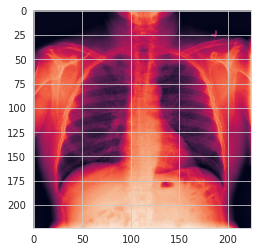

time: 347 ms (started: 2023-03-25 03:04:46 +00:00)


In [164]:
# Pick a random image
dcm_file = 'stage_2_train_images/'+'{}.dcm'.format('9358d1c5-ba61-4150-a233-41138208a3f9')
dcm_data = dcm.read_file(dcm_file)
img = dcm_data.pixel_array
plt.imshow(imagelist[12])

Text(0.5, 0, 'Pneumonia 1:')

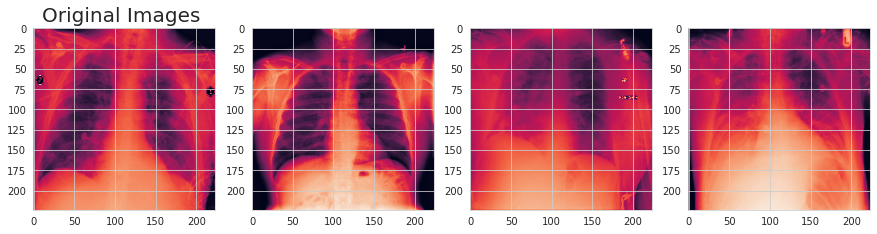

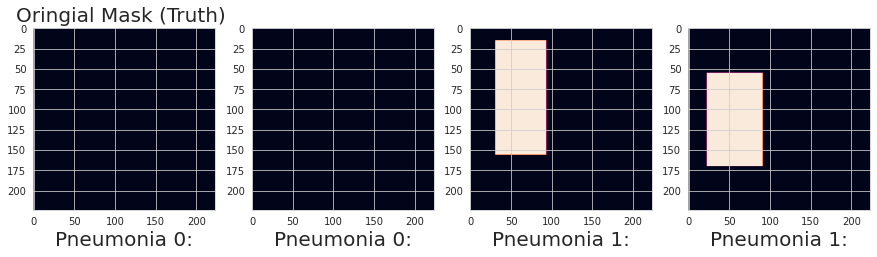

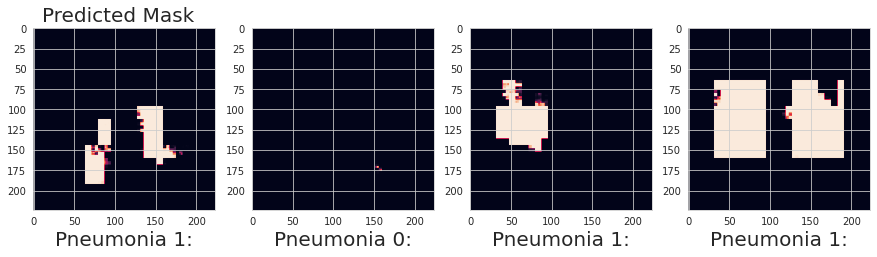

time: 3.93 s (started: 2023-03-25 03:04:47 +00:00)


In [165]:
# Visualize the train and output data 

fig = plt.figure(figsize=(15, 15))

a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(imagelist[1])
a.set_title('Original Images ',fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(imagelist[12])

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(imagelist[13])

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(imagelist[15])

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)

imgplot = plt.imshow(originalMask[1])
a.set_title('Oringial Mask (Truth) ',fontsize=20)
a.set_xlabel('Pneumonia {}:'.format(y_test[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(originalMask[12])
a.set_xlabel('Pneumonia {}:'.format(y_test[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(originalMask[13])
a.set_xlabel('Pneumonia {}:'.format(y_test[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(originalMask[15])
a.set_xlabel('Pneumonia {}:'.format(y_test[15]), fontsize=20)

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
a.set_title('Predicted Mask  ',fontsize=20)
imgplot = plt.imshow(maskList[1])
a.set_xlabel('Pneumonia {}:'.format(y_pred[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(maskList[12])
a.set_xlabel('Pneumonia {}:'.format(y_pred[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(maskList[13])
a.set_xlabel('Pneumonia {}:'.format(y_pred[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(maskList[15])
a.set_xlabel('Pneumonia {}:'.format(y_pred[15]), fontsize=20)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.71      1.00      0.83        10

    accuracy                           0.80        20
   macro avg       0.86      0.80      0.79        20
weighted avg       0.86      0.80      0.79        20

Confusion Matrix Chart:


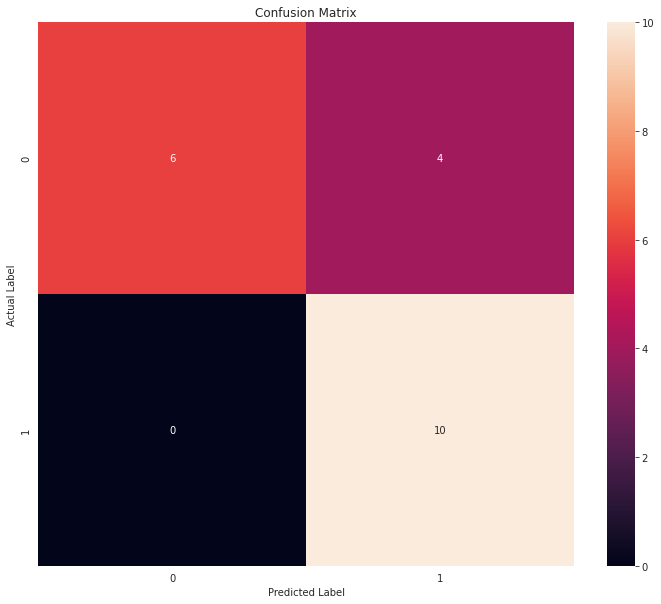

time: 423 ms (started: 2023-03-25 03:04:51 +00:00)


In [166]:
# Classification Report for test sample
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix for test sample
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [167]:
# Training history dataframe
hist = pd.DataFrame(H.history)

# Model comparison
Train_Accuracy = hist['accuracy'].mean()
# Test_Accuracy = model.evaluate(testd)

precision = results['precision']
recall = results['recall']
f1 = results['f1_score']
AUC = results['AUC']
Dice_Coef = results['dice_coef']
MeanIoU = results['mean_iou']

base_1 = []
base_1.append(['Model-9: UNet (MobileNet)', Train_Accuracy, results['accuracy'], precision, recall, f1, AUC, Dice_Coef, MeanIoU])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC', 'Dice Coef', 'MeanIoU'])
model_comparison.sort_values(by=['Recall','F1 Score'], inplace=True, ascending=False)

time: 9.82 ms (started: 2023-03-25 03:04:51 +00:00)


In [168]:
# Understand the various Metrics with epochs
hist

loss  accuracy  precision    recall  f1_score       AUC  dice_coef  \
0   0.873197  0.010868   0.084013  0.395739  0.126867  0.637974   0.126803   
1   0.829828  0.002179   0.124392  0.337062  0.170121  0.621653   0.170172   
2   0.873937  0.005102   0.115633  0.218151  0.126011  0.582772   0.126063   
3   0.835370  0.011373   0.159364  0.224731  0.164614  0.585988   0.164630   
4   0.811297  0.010563   0.141711  0.427022  0.188742  0.666250   0.188703   
5   0.764091  0.010510   0.193321  0.406328  0.235984  0.670801   0.235909   
6   0.753094  0.007334   0.188393  0.501742  0.246796  0.713851   0.246906   
7   0.795259  0.009540   0.163634  0.419871  0.204765  0.674962   0.204741   
8   0.789715  0.010895   0.155484  0.500142  0.210257  0.705946   0.210285   
9   0.762398  0.027756   0.197805  0.403541  0.237549  0.671072   0.237602   
10  0.763177  0.031755   0.180056  0.500206  0.236771  0.714963   0.236823   
11  0.754861  0.041215   0.203452  0.441273  0.245227  0.687548   0.245140   
12  0.734501  0.043769   0.205917  0.535268  0.268105  0.735236   0.268064   
13  0.738922  0.057996   0.220372  0.434928  0.261163  0.694687   0.261078   
14  0.760386  0.056295   0.217953  0.384498  0.239599  0.669458   0.239615   
15  0.776548  0.052854   0.218330  0.345808  0.223488  0.654247   0.223453   
16  0.725869  0.031035   0.243225  0.417976  0.278011  0.684445   0.278007   
17  0.725130  0.022906   0.227526  0.471703  0.274869  0.707313   0.274870   
18  0.708254  0.017020   0.247726  0.461963  0.291858  0.708131   0.291746   
19  0.689957  0.034425   0.263171  0.478436  0.310033  0.718542   0.310042   

    mean_iou  val_loss  val_accuracy  val_precision  val_recall  val_f1_score  \
0   0.482411  0.892857      0.894000       0.000000    0.000000      0.000000   
1   0.496595  0.979243      0.692655       0.018706    0.006851      0.002934   
2   0.503115  0.894266      0.816101       0.118607    0.061240      0.054695   
3   0.508094  0.892857      0.717793       0.000000    0.000000      0.000000   
4   0.504360  0.868512      0.551313       0.129959    0.054350      0.043559   
5   0.530927  0.854778      0.199139       0.120063    0.318881      0.145190   
6   0.534509  0.885350      0.287893       0.129915    0.071641      0.043124   
7   0.520922  0.827328      0.372662       0.141103    0.168588      0.104185   
8   0.518489  0.883102      0.284160       0.124636    0.071120      0.044852   
9   0.533927  0.875840      0.096381       0.122065    0.238705      0.124068   
10  0.534610  0.839299      0.234588       0.134643    0.322750      0.160736   
11  0.535787  0.819982      0.115460       0.134022    0.501566      0.180082   
12  0.547741  0.814592      0.063536       0.136261    0.511095      0.185381   
13  0.552818  0.766575      0.077633       0.149668    0.440803      0.179802   
14  0.547160  0.789460      0.062473       0.188104    0.351076      0.193318   
15  0.546185  0.805354      0.034014       0.255561    0.201765      0.159254   
16  0.550738  0.804369      0.012131       0.122187    0.692896      0.195694   
17  0.552992  0.793428      0.014908       0.133938    0.680553      0.206498   
18  0.559742  0.796403      0.005434       0.131567    0.671502      0.203647   
19  0.567457  0.783389      0.022972       0.141231    0.676550      0.216583   

     val_AUC  val_dice_coef  val_mean_iou        lr  
0   0.500000       0.107143      0.490212  0.010000  
1   0.498830       0.020757      0.491088  0.008913  
2   0.530534       0.105734      0.501404  0.007943  
3   0.499933       0.107143      0.490199  0.007079  
4   0.525841       0.131488      0.503556  0.006310  
5   0.638923       0.145222      0.520345  0.005623  
6   0.531898       0.114650      0.508696  0.005012  
7   0.576443       0.172672      0.522158  0.004467  
8   0.534395       0.116898      0.505144  0.003981  
9   0.605483       0.124160      0.521805  0.003548  
10  0.645600       0.160701      0.525620  0.003162  
11  0.720821       

time: 34.5 ms (started: 2023-03-25 03:04:51 +00:00)


In [169]:
hist.describe()

loss   accuracy  precision     recall   f1_score        AUC  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    0.773290   0.024769   0.187574   0.415319   0.227041   0.675292   
std     0.050792   0.018028   0.047099   0.084145   0.051106   0.042040   
min     0.689957   0.002179   0.084013   0.218151   0.126011   0.582772   
25%     0.737817   0.010550   0.158394   0.392929   0.200760   0.663250   
50%     0.762788   0.019963   0.195563   0.423446   0.237160   0.679704   
75%     0.799269   0.036123   0.218841   0.473386   0.262898   0.707518   
max     0.873937   0.057996   0.263171   0.535268   0.310033   0.735236   

       dice_coef   mean_iou   val_loss  val_accuracy  val_precision  \
count  20.000000  20.000000  20.000000     20.000000      20.000000   
mean    0.227033   0.531429   0.843349      0.277762       0.121612   
std     0.051095   0.023106   0.052728      0.295317       0.058505   
min     0.126063   0.482411   0.766575      0.005434       0.000000   
25%     0.200731   0.515890   0.802378      0.055358       0.121565   
50%     0.237212   0.534559   0.833314      0.157300       0.130763   
75%     0.262824   0.548490   0.883664      0.417324       0.137471   
max     0.310042   0.567457   0.979243      0.894000       0.255561   

       val_recall  val_f1_score    val_AUC  val_dice_coef  val_mean_iou  \
count   20.000000     20.000000  20.000000      20.000000     20.000000   
mean     0.302097      0.122180   0.635830       0.156651      0.517649   
std      0.251929      0.077646   0.111400       0.052728      0.016816   
min      0.000000      0.000000   0.498830       0.020757      0.490199   
25%      0.068650      0.044529   0.531557       0.116336      0.504747   
50%      0.278793      0.152222   0.623480       0.166686      0.521982   
75%      0.503949      0.187365   0.722238       0.197622      0.527164   
max      0.692896      0.216583   0.804297       0.233425      0.550061   

              lr  
count  20.000000  
mean    0.004138  
std     0.002704  
min     0.001122  
25%     0.001941  
50%     0.003355  
75%     0.005795  
max     0.010000

time: 80 ms (started: 2023-03-25 03:04:51 +00:00)


## Model-10: UNet (ResNet50)

In [170]:
# Function to create part of UNet architecture with ResNet50
def conv_block_simple(prevlayer, filters, prefix, strides=(1, 1)):
    """
    Adds convolutional layer followed by Batch Normalization and Activation layers.
        
    Arguments:
        prevlayer -- previous layer of the convolution block        
        filters -- number of filters for convolution
        prefix -- prefix for the layer name
        strides -- convolution stride. Default is 1x1.
    """
    conv = Conv2D(filters, (3, 3), padding="same", kernel_initializer="he_normal", strides=strides, name=prefix + "_conv")(prevlayer)
    conv = BatchNormalization(name=prefix + "_bn")(conv)
    conv = Activation('relu', name=prefix + "_activation")(conv)
    
    # Returns the built layers of the block.
    return conv

time: 3.86 ms (started: 2023-03-25 03:04:51 +00:00)


In [171]:
# Define the UNet with ResNet50
def create_unet_resnet50(trainable=True):
    """Function to create UNet architecture with ResNet50.
        
    Arguments:
        trainable -- Flag to make layers trainable. Default value is 'True'.
    """
    resnetLayers = ResNet50(weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False) # Load pre-trained Resnet
    # Top layer is last layer of the model

    for layer in resnetLayers.layers:
        layer.trainable = trainable

    # Add all the UNet layers here
    convLayer_112by112 = resnetLayers.get_layer("conv1_relu").output
    convLayer_56by56 = resnetLayers.get_layer("conv2_block3_out").output # conv2_block3_2_relu
    convLayer_28by28 = resnetLayers.get_layer("conv3_block4_out").output # conv3_block4_2_relu
    convLayer_14by14 = resnetLayers.get_layer("conv4_block6_out").output # conv4_block6_2_relu
    convLayer_7by7 = resnetLayers.get_layer("conv5_block3_out").output # conv5_block3_2_relu
    # The last layer of resnet model(conv5_block3_out) is of dimensions (7x7x2048)
    # Start upsampling from 7x7 to 14x14 ...up to 224x224 to form UNet
    # concatinate with the original image layer of the same size from ResNet50
    up14by14 = Concatenate()([UpSampling2D()(convLayer_7by7), convLayer_14by14])
    upConvLayer_14by14 = conv_block_simple(up14by14, 256, "upConvLayer_14by14_1")
    upConvLayer_14by14 = conv_block_simple(upConvLayer_14by14, 256, "upConvLayer_14by14_2")
    
    up28by28 = Concatenate()([UpSampling2D()(upConvLayer_14by14), convLayer_28by28])
    upConvLayer_28by28 = conv_block_simple(up28by28, 256, "upConvLayer_28by28_1")
    upConvLayer_28by28 = conv_block_simple(upConvLayer_28by28, 256, "upConvLayer_28by28_2")
     
    up56by56 = Concatenate()([UpSampling2D()(upConvLayer_28by28), convLayer_56by56])
    upConvLayer_56by56 = conv_block_simple(up56by56, 256, "upConvLayer_56by56_1")
    upConvLayer_56by56 = conv_block_simple(upConvLayer_56by56, 256, "upConvLayer_56by56_2")    
    
    up112by112 = Concatenate()([UpSampling2D()(upConvLayer_56by56), convLayer_112by112])
    upConvLayer_112by112 = conv_block_simple(up112by112, 256, "upConvLayer_112by112_1")
    upConvLayer_112by112 = conv_block_simple(upConvLayer_112by112, 256, "upConvLayer_112by112_2")   
    
    up224by224 = UpSampling2D(name="unet_last")(upConvLayer_112by112) # upsample to 224x224
    upConvLayer_224by224 = conv_block_simple(up224by224, 256, "upConvLayer_224by224_1")
    upConvLayer_224by224 = conv_block_simple(upConvLayer_224by224, 256, "upConvLayer_224by224_2")
    # Add classification layer
    upConvLayer_224by224 = Conv2D(1, kernel_size=1, activation="sigmoid", name="masks")(upConvLayer_224by224)
    upConvLayer_224by224 = Reshape((IMAGE_SIZE, IMAGE_SIZE))(upConvLayer_224by224) 

    return Model(inputs=resnetLayers.input, outputs=upConvLayer_224by224)

time: 7.58 ms (started: 2023-03-25 03:04:51 +00:00)


In [172]:
# Build the model 
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
model10 = create_unet_resnet50(input_shape)
model10.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [173]:
# Compile the model
model10.compile(optimizer="adam", loss = dice_loss, metrics=METRICS)

time: 23.6 ms (started: 2023-03-25 03:04:55 +00:00)


In [174]:
# Fit the model
train_steps = len(traind)//BATCH_SIZE
valid_steps = len(testd)//BATCH_SIZE

if len(traind) % BATCH_SIZE != 0:
    train_steps += 1
if len(testd) % BATCH_SIZE != 0:
    valid_steps += 1

H = model10.fit(traind, epochs=20,
                        steps_per_epoch=train_steps,
                        validation_data=testd,
                        callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler],
                        use_multiprocessing=True,
                        workers=4,
                        validation_steps=valid_steps,                      
                        shuffle=True)
                        # class_weight = classWeight; Not supported for 3+ Dimensions

Epoch 1/20
56/56 [==============================] - 114s 1s/step - loss: 0.8742 - accuracy: 0.0252 - precision: 0.0780 - recall: 0.5227 - f1_score: 0.1261 - AUC: 0.6416 - dice_coef: 0.1258 - mean_iou: 0.5079 - val_loss: 1.0000 - val_accuracy: 0.8940 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_AUC: 0.4999 - val_dice_coef: 3.7877e-10 - val_mean_iou: 0.4902 - lr: 0.0100
Epoch 2/20
56/56 [==============================] - 59s 1s/step - loss: 0.8054 - accuracy: 0.0053 - precision: 0.1374 - recall: 0.3655 - f1_score: 0.1948 - AUC: 0.6484 - dice_coef: 0.1946 - mean_iou: 0.5197 - val_loss: 0.9599 - val_accuracy: 0.8940 - val_precision: 0.0207 - val_recall: 0.9981 - val_f1_score: 0.0401 - val_AUC: 0.5279 - val_dice_coef: 0.0401 - val_mean_iou: 0.0392 - lr: 0.0089
Epoch 3/20
56/56 [==============================] - 64s 1s/step - loss: 0.7742 - accuracy: 0.0042 - precision: 0.2204 - recall: 0.3119 - f1_score: 0.2295 - AUC: 0.6468 - dice_coef: 0.2294 - mea

334/334 [==============================] - 83s 247ms/step - loss: 0.7608 - accuracy: 0.0028 - precision: 0.1735 - recall: 0.6327 - f1_score: 0.2394 - AUC: 0.7686 - dice_coef: 0.2394 - mean_iou: 0.5336
{'loss': 0.7608000636100769, 'accuracy': 0.0028013393748551607, 'precision': 0.17347915470600128, 'recall': 0.6326538324356079, 'f1_score': 0.23942965269088745, 'AUC': 0.7686296105384827, 'dice_coef': 0.23938621580600739, 'mean_iou': 0.533566415309906}


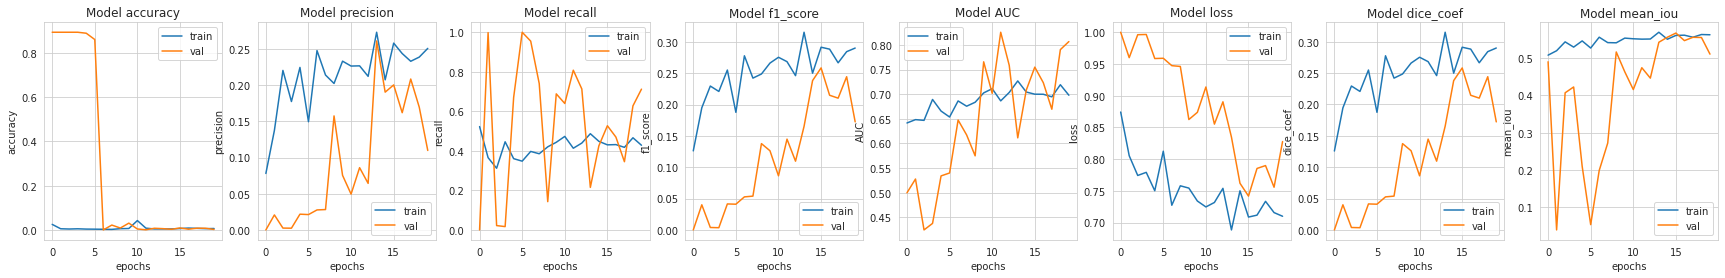

time: 1min 26s (started: 2023-03-25 03:31:21 +00:00)


In [175]:
# Evaluate and display results
results = model10.evaluate(testd) # Evaluate the model on test data
results = dict(zip(model10.metrics_names, results))

print(results)
plottingScores(H)

In [176]:
# Prepare the test data: Use random 20 images
testd1 = train_data[15000:15020]
testd1.fillna(0, inplace=True)

time: 26.4 ms (started: 2023-03-25 03:32:47 +00:00)


In [177]:
# Check target distrubution in test dataset (Equal distribution)
testd1.Target.value_counts()

0    10
1    10
Name: Target, dtype: int64

time: 24.3 ms (started: 2023-03-25 03:32:47 +00:00)


In [178]:
# Set the TrainGenerator for test data
testd1_datagen = TrainGenerator(testd1)

time: 19.1 ms (started: 2023-03-25 03:32:47 +00:00)


In [179]:
# Evaluate the model
test_steps = (len(testd1_datagen)//BATCH_SIZE)
if len(testd1_datagen) % BATCH_SIZE != 0:
    test_steps += 1

model10.evaluate(testd1_datagen)

4/4 [==============================] - 1s 185ms/step - loss: 0.5885 - accuracy: 0.0000e+00 - precision: 0.3285 - recall: 0.6594 - f1_score: 0.3430 - AUC: 0.7972 - dice_coef: 0.3429 - mean_iou: 0.5942


[0.5884883403778076,
 0.0,
 0.3285060524940491,
 0.6593831777572632,
 0.3429979681968689,
 0.7972458004951477,
 0.34292837977409363,
 0.5941668748855591]

time: 1.27 s (started: 2023-03-25 03:32:47 +00:00)


In [180]:
# Predict the test data that we have
pred_mask = model10.predict(testd1_datagen)

testd1 = testd1.reset_index()

4/4 [==============================] - 2s 215ms/step
time: 2.32 s (started: 2023-03-25 03:32:48 +00:00)


In [181]:
# Calculate the y_test, y_pred, tmpImages, tmpMask, originalMask

y_pred = []
y_test = []
imageList = []
predMaskTemp = []
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

def getPredictions(testd1):
    masks = np.zeros((int(testd1.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

    for index, row in testd1.iterrows():
        patientId = row.patientId
        # print(patientId)

        classlabel = row["Target"]
        dcm_file = 'stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = dcm.read_file(dcm_file)
        img = dcm_data.pixel_array
        resized_img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH), interpolation = cv2.INTER_LINEAR)
        predMaskTemp.append(pred_mask[index])
        iou = (pred_mask[index] > 0.5) * 1.0
        y_pred.append((1 in iou) * 1)
        imageList.append(resized_img)
        y_test.append(classlabel)
        x_scale = IMAGE_HEIGHT / 1024
        y_scale = IMAGE_WIDTH / 1024

        if(classlabel == 1):
            x = int(np.round(row['x'] * x_scale))
            y = int(np.round(row['y'] * y_scale))
            w = int(np.round(row['width'] * x_scale))
            h = int(np.round(row['height'] * y_scale))
            masks[index][y:y+h, x:x+w] = 1
    tmpImages = np.array(imageList)
    tmpMask = np.array(predMaskTemp)
    originalMask = np.array(masks)
    return (y_test, y_pred, tmpImages, tmpMask, originalMask)

time: 4.21 ms (started: 2023-03-25 03:32:50 +00:00)


In [182]:
# Create the predictions map
y_test, y_pred, imagelist, maskList, originalMask = getPredictions(testd1)

time: 215 ms (started: 2023-03-25 03:32:50 +00:00)


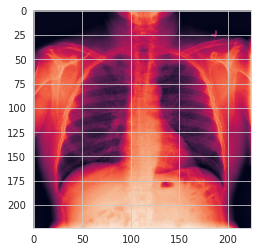

time: 359 ms (started: 2023-03-25 03:32:51 +00:00)


In [183]:
# Pick a random image
dcm_file = 'stage_2_train_images/'+'{}.dcm'.format('9358d1c5-ba61-4150-a233-41138208a3f9')
dcm_data = dcm.read_file(dcm_file)
img = dcm_data.pixel_array
plt.imshow(imagelist[12])

Text(0.5, 0, 'Pneumonia 1:')

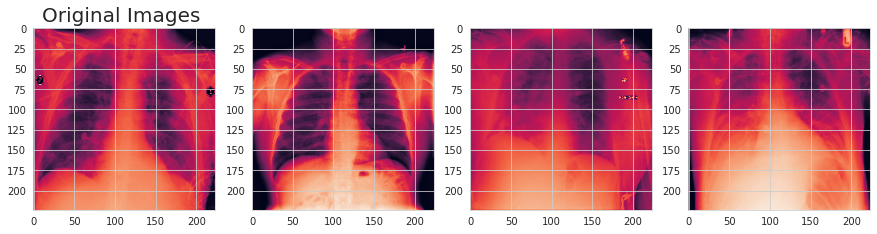

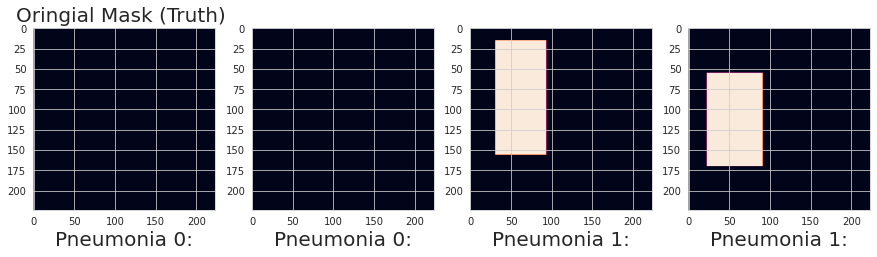

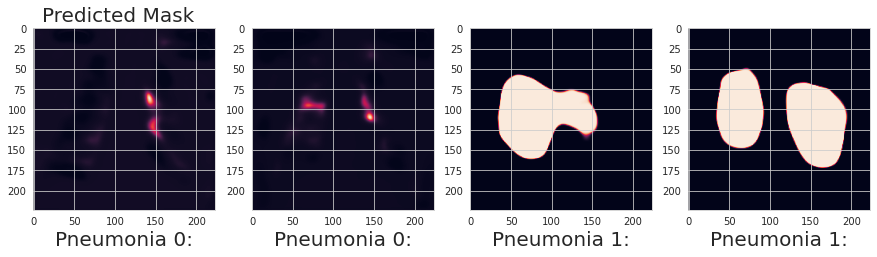

time: 3.31 s (started: 2023-03-25 03:32:51 +00:00)


In [184]:
# Visualize the train and output data 

fig = plt.figure(figsize=(15, 15))

a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(imagelist[1])
a.set_title('Original Images ',fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(imagelist[12])

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(imagelist[13])

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(imagelist[15])

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)

imgplot = plt.imshow(originalMask[1])
a.set_title('Oringial Mask (Truth) ',fontsize=20)
a.set_xlabel('Pneumonia {}:'.format(y_test[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(originalMask[12])
a.set_xlabel('Pneumonia {}:'.format(y_test[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(originalMask[13])
a.set_xlabel('Pneumonia {}:'.format(y_test[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(originalMask[15])
a.set_xlabel('Pneumonia {}:'.format(y_test[15]), fontsize=20)

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
a.set_title('Predicted Mask  ',fontsize=20)
imgplot = plt.imshow(maskList[1])
a.set_xlabel('Pneumonia {}:'.format(y_pred[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(maskList[12])
a.set_xlabel('Pneumonia {}:'.format(y_pred[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(maskList[13])
a.set_xlabel('Pneumonia {}:'.format(y_pred[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(maskList[15])
a.set_xlabel('Pneumonia {}:'.format(y_pred[15]), fontsize=20)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20

Confusion Matrix Chart:


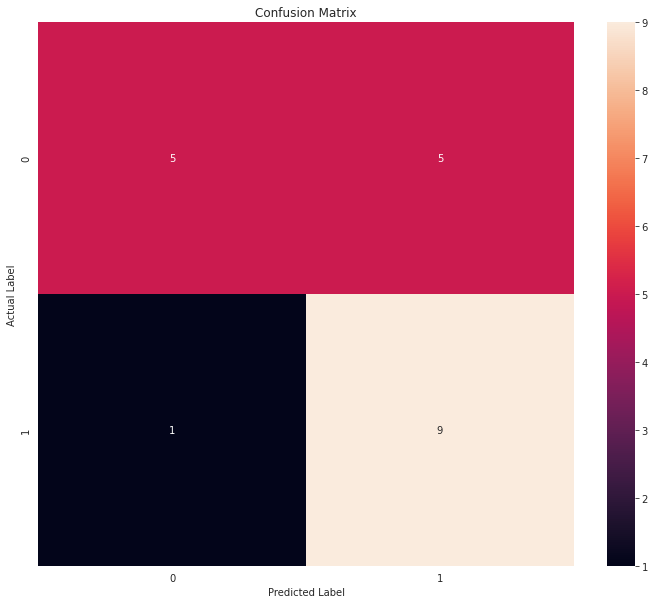

time: 288 ms (started: 2023-03-25 03:32:54 +00:00)


In [185]:
# Classification Report for test sample
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix for test sample
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],  
                         columns = [i for i in ['0', '1']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [186]:
# Training history dataframe
hist = pd.DataFrame(H.history)

# Model comparison
Train_Accuracy = hist['accuracy'].mean()
# Test_Accuracy = model.evaluate(testd)

precision = results['precision']
recall = results['recall']
f1 = results['f1_score']
AUC = results['AUC']
Dice_Coef = results['dice_coef']
MeanIoU = results['mean_iou']

# base_1 = []
base_1.append(['Model-10: UNet (ResNet50)', Train_Accuracy, results['accuracy'], precision, recall, f1, AUC, Dice_Coef, MeanIoU])
model_comparison = pd.DataFrame(base_1,columns=['Model','Train Accuracy','Test Accuracy','Precision','Recall','F1 Score', 'AUC', 'Dice Coef', 'MeanIoU'])
model_comparison.sort_values(by=['Dice Coef','MeanIoU'], inplace=True, ascending=False)

time: 17.1 ms (started: 2023-03-25 03:32:55 +00:00)


## Model Comparison - Object Detection

In [187]:
# Sumarize the results of modeling in a dataframe; Datapoints used = 4000; Epochs = 10/20; ADJUSTED_IMAGE_SIZE = 224
model_comparison

Model  Train Accuracy  Test Accuracy  Precision  \
0  Model-9: UNet (MobileNet)        0.024769       0.024219   0.218881   
1  Model-10: UNet (ResNet50)        0.008163       0.002801   0.173479   

     Recall  F1 Score       AUC  Dice Coef   MeanIoU  
0  0.602574  0.283223  0.767537   0.283200  0.556895  
1  0.632654  0.239430  0.768630   0.239386  0.533566

time: 13 ms (started: 2023-03-25 03:32:55 +00:00)


Dice Coefficient (F1 Score) and IoU:

Simply put, the Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images.

The Dice coefficient is very similar to the IoU. They are positively correlated, meaning if one says model A is better than model B at segmenting an image, then the other will say the same. Like the IoU, they both range from 0 to 1, with 1 signifying the greatest similarity between predicted and truth.

Intersection-Over-Union (IoU, Jaccard Index): The Intersection-Over-Union (IoU), also known as the Jaccard Index, is one of the most commonly used metrics in semantic segmentation. The IoU is a very straightforward metric that’s extremely effective.

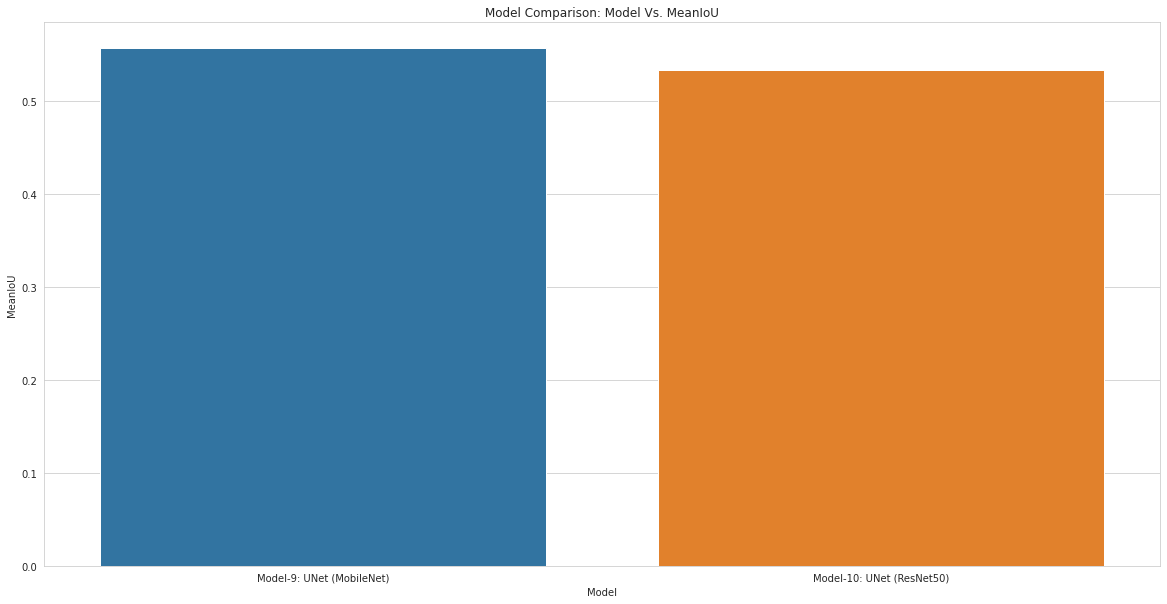

time: 329 ms (started: 2023-03-25 03:32:55 +00:00)


In [188]:
# Bar graph for Model Vs. F1 Score
plt.figure(figsize=(20,10))
sns.barplot(data=model_comparison, x="Model", y="MeanIoU")
plt.title("Model Comparison: Model Vs. MeanIoU")
plt.show()

Text(0, 0.5, 'Metrics')

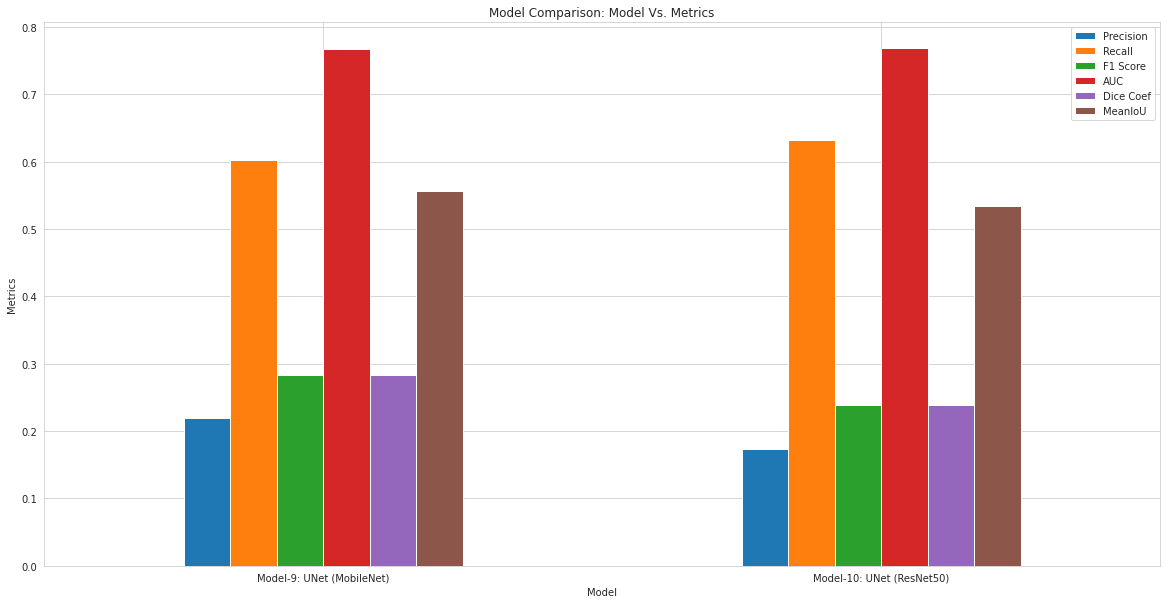

time: 573 ms (started: 2023-03-25 03:32:55 +00:00)


In [189]:
# Bar graph for Model Vs. Metrics
model_comparison[['Model', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Dice Coef', 'MeanIoU']].plot(kind='bar', x = 'Model', rot = 0, sort_columns = 'Model', figsize=(20,10))
plt.title("Model Comparison: Model Vs. Metrics")
plt.xlabel("Model")
plt.ylabel("Metrics")

## Pickle the model

In [190]:
# Save the Classification model to a file in the current working directory
Pkl_Filename = "Pickle_Classification_EfficientNetV2B3_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model7, file)

# # Load the DL Model back from the file
# with open(Pkl_Filename, 'rb') as file:  
#     Pickle_Classification_EfficientNetV2B3_Model = pickle.load(file)
    
# Pickle_Classification_EfficientNetV2B3_Model

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............activation_10
...............vars
............activation_11
...............vars
............activation_12
...............vars
............activation_13
...............vars
............activation_14
...............vars
............activation_15
...............vars
............activation_16
...............vars
............activation_17
...............vars
............activation_18
...............vars
............activation_19
...............vars
............activation_2
...............vars
............activation_20
...............vars
............activation_21
...............vars
............activation_22
...............vars
............activation_23
...............vars
............activation_24
...............vars
............ac

In [191]:
# Save the Object Detection model to a file in the current working directory
Pkl_Filename = "Pickle_ObjectDetection_UNetMobileNet_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model9, file)

# # Load the DL Model back from the file
# with open(Pkl_Filename, 'rb') as file:  
#     Pickle_ObjectDetection_UNetMobileNet_Model = pickle.load(file)
    
# Pickle_ObjectDetection_UNetMobileNet_Model

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_10
.........vars
............0
............1
............2
............3
......batch_normalization_11
.........vars
............0
............1
............2
............3
......batch_normalization_12
.........vars
............0
............1
............2
............3
......batch_normalization_13
.........vars
............0
............1
............2
............3
......batch_normalization_14
.........vars
............0
............1
............2
............3
......batch_normalization_15
.........vars
............0
............1
............2
............3
......batch_normalization_16
.........vars
............0
............1
............2
............3
......batch_normalization_17
........

# Project Summary:
1. We understood the value of CRISP-DM project management framework in the realm of data science domain.
2. We have completed the EDA, and analysed the important and relevant attributes of our dataset in greater details.
3. We have done the pre-processing of the DICOM images, and collected additional information from the images. In the process, we learned to access, analyse and process the images for data modelling.
4. We have built the various CNN models for classification with and without transfer learning. In the process, we learned to use various state-of-the art pre trained models with ImageNet weights.
5. We have built UNET models for semantic segmentation of images.
6. We learned to differentiate and make use of various evaluation metrics to understand the quality of our models.
7. Given the time and computing resources, we can also experiment with Mask RCNN, Yolo, CheXNet and other more advanced models.
8. We can improve the Dice Coef. and MeanIoU by image augmentation, increasing the sample size, image size and hyperparameter tuning.
9. We would have done some up sampling of the 'Lung Opacity' class using augmentations. This would have helped us improving Recall value for 'Lung Opacity' class.
10. Classification error to understand the level of confidence of our various metrics is also a great factor to consider while quoting the performance metrics of various models.
11. Understanding Kappa, MCC and mAP are also great factors to consider for model evaluation measures.
12. We can also implement the Bayesian optimization techniques for hyperparameter tuning.
13. Overall, it was a great experience working on this project and we learned a lot in the journey.



# System Resources Used
https://colab.research.google.com/drive/151805XTDg--dgHb3-AXJCpnWaqRhop_2#scrollTo=gsqXZwauphVV

In [192]:
!lscpu |grep 'Model name'

Model name:                      Intel(R) Xeon(R) CPU @ 2.00GHz
time: 340 ms (started: 2023-03-25 03:33:00 +00:00)


In [193]:
# Memory that we can use
# max memory used = 8GB
!free -h --si | awk  '/Mem:/{print $2}'

12G
time: 323 ms (started: 2023-03-25 03:33:00 +00:00)


In [194]:
# if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency 
# this means it always operates at shown frequency
!lscpu | grep "MHz"

CPU MHz:                         2000.146
time: 327 ms (started: 2023-03-25 03:33:01 +00:00)


In [195]:
# hard disk space that we can use
!df -h / | awk '{print $4}'

Avail
51G
time: 324 ms (started: 2023-03-25 03:33:01 +00:00)


In [196]:
# no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:              1
time: 347 ms (started: 2023-03-25 03:33:01 +00:00)


In [197]:
# no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

Thread(s) per core:              2
time: 322 ms (started: 2023-03-25 03:33:02 +00:00)


In [198]:
# no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

Socket(s):                       1
time: 331 ms (started: 2023-03-25 03:33:02 +00:00)


In [199]:
!lscpu | grep "L3 cache" 

L3 cache:                        38.5 MiB
time: 317 ms (started: 2023-03-25 03:33:02 +00:00)


In [200]:
# use this command to see GPU activity while doing Deep Learning tasks, 
# for this command 'nvidia-smi' and for above one to work, go to 
# 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

Sat Mar 25 03:33:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |  14553MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [201]:
# GPU count and name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1db530b7-d509-2cd0-bd55-24d2dd4e3db7)
time: 335 ms (started: 2023-03-25 03:33:03 +00:00)


In [202]:
# Timestamp
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Bangkok /etc/localtime
!date

Sat 25 Mar 2023 10:33:04 AM +07
time: 980 ms (started: 2023-03-25 03:33:03 +00:00)


In [208]:
# NB end time
b = time.time()
# Total NB Runtime
# print(f"Total NB Run Time (min.): {(b-a)/60}")

time: 559 µs (started: 2023-03-25 03:42:37 +00:00)


# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)
17. [PapersWithCode](https://paperswithcode.com/)